## First webscrape to get all the neighborhoods of hyderabad

In [1]:
# Importing Libraries for Web Scrapping
import pandas as pd
import requests
# import csv
from bs4 import BeautifulSoup

In [2]:
# Send a GET request to the website
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Hyderabad"
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the container with the neighbourhood data
container = soup.find("div", class_="mw-parser-output")

# Extract the neighbourhood names from the list items
neighbourhoods = []
for li in container.find_all("li"):
    neighbourhoods.append(li.text.strip())

# Create a dataframe using the extracted data
df = pd.DataFrame(neighbourhoods, columns=["places"])

# Print the dataframe
print(df)

                          places
0                       Ameerpet
1                       Begumpet
2                       SR Nagar
3                  Prakash Nagar
4                     Punjagutta
..                           ...
653  Neighbourhoods of Hyderabad
654      List of cities in India
655       List of largest cities
656   List of technology centers
657             Hyderabad portal

[658 rows x 1 columns]


In [3]:
df.head(250)

places
0                                         Ameerpet
1                                         Begumpet
2                                         SR Nagar
3                                    Prakash Nagar
4                                       Punjagutta
..                                             ...
245                                     Puppalguda
246                                     Shamshabad
247             Rajiv Gandhi International Airport
248                                      Umdanagar
249  ^ "Hyderabad's software hub shines brightly".

[250 rows x 1 columns]

In [4]:
df.drop(df.index[249:], inplace=True)

In [5]:
df.tail()

places
244                            Narsingi
245                          Puppalguda
246                          Shamshabad
247  Rajiv Gandhi International Airport
248                           Umdanagar

In [6]:
value = df.loc[152, "places"]
print(value)

Yakutpura


In [7]:
value = df.loc[112, "places"]
print(value)

Afzal Gunj


In [8]:
df.drop(df.index[112:153], inplace=True)

In [9]:
df.shape

(208, 1)

In [10]:
df.head(150)

places
0          Ameerpet
1          Begumpet
2          SR Nagar
3     Prakash Nagar
4        Punjagutta
..              ...
186  ECIL 'X' Roads
187    Kamala Nagar
188      Kushaiguda
189     Cherlapally
190         Keesara

[150 rows x 1 columns]

In [11]:
value = df.loc[153, "places"]
value

'Balanagar'

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.tail(150)

places
58                           Parsigutta
59                                Patny
60                            Rani Gunj
61                              RP Road
62                        Sindhi Colony
..                                  ...
203                            Narsingi
204                          Puppalguda
205                          Shamshabad
206  Rajiv Gandhi International Airport
207                           Umdanagar

[150 rows x 1 columns]

In [16]:
df.shape

(208, 1)

In [17]:
df.rename(columns={'places': 'Area'}, inplace=True)
df

Area
0                              Ameerpet
1                              Begumpet
2                              SR Nagar
3                         Prakash Nagar
4                            Punjagutta
..                                  ...
203                            Narsingi
204                          Puppalguda
205                          Shamshabad
206  Rajiv Gandhi International Airport
207                           Umdanagar

[208 rows x 1 columns]

In [18]:
df.to_csv("hyderabad_areas_from_wiki.csv")

## Next extract the geocode locations of the areas

In [19]:
# Importing Files to extract Geocodes of area using arcgis API
import pandas as pd
import numpy as np
import geocoder #for extracting lat lng of AREA
import requests
from geopy.geocoders import Nominatim# for hyderabad Lat lng

In [20]:
hyd_df = pd.read_csv("hyderabad_areas_from_wiki.csv",index_col=0)

In [21]:
lt=[]
ln=[]
for address in hyd_df["Area"]:
    ads = f"{address},Hyderabad"
    g = geocoder.arcgis(ads,timeout=1000.0)
    lt.append(g.latlng[0])
    ln.append(g.latlng[1])

In [22]:
print(len(lt),",",len(ln)) #length of the lat and long we extracted
lat_lng=pd.DataFrame(list(zip(lt,ln)),columns=["Latitude","Longitude"])
hyd_df=hyd_df.join(lat_lng)

208 , 208


In [23]:
hyd_df.head(20)

Area   Latitude  Longitude
0          Ameerpet  17.438300  78.446800
1          Begumpet  17.443720  78.470740
2          SR Nagar  17.441660  78.441320
3     Prakash Nagar  17.438507  78.474877
4        Punjagutta  17.426160  78.452100
5         Balkampet  17.444060  78.451660
6       Sanathnagar  17.456240  78.442970
7      Bharat Nagar  17.391680  78.382980
8         Erragadda  17.464208  78.430385
9         Borabanda  17.452700  78.412560
10       Moti Nagar  17.456580  78.424780
11       Khairtabad  17.422930  78.465280
12       Somajiguda  17.423450  78.458360
13  Raj Bhavan Road  17.416989  78.461238
14      Lakdikapool  17.401560  78.467130
15         Saifabad  17.405010  78.466100
16      A.C. Guards  17.392123  78.455623
17       Masab Tank  17.402810  78.451970
18    Chintal Basti  17.449190  78.540010
19      Musheerabad  17.414710  78.501320

In [25]:
hyd_df.to_csv("hyderabad_df_with_latlng.csv")

## Visualise the areas using folium

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import geocoder
import folium
import json
from pandas.io.json import json_normalize
import requests
from geopy.geocoders import Nominatim
import matplotlib.colors as colors
import matplotlib.cm as cm

In [27]:
hyderabad_df = pd.read_csv("hyderabad_df_with_latlng.csv",index_col=0)
hyderabad_df.head()

Area   Latitude  Longitude
0       Ameerpet  17.438300  78.446800
1       Begumpet  17.443720  78.470740
2       SR Nagar  17.441660  78.441320
3  Prakash Nagar  17.438507  78.474877
4     Punjagutta  17.426160  78.452100

In [28]:
print(f"{hyderabad_df.shape}")

(208, 3)


In [29]:
geolocator = Nominatim(user_agent="a",timeout=10)
location = geolocator.geocode("India,Hyderabad")
hyd_lat= location.latitude
hyd_lng=location.longitude
print(f"Hyderabad lat is {hyd_lat} and lng {hyd_lng}")

Hyderabad lat is 17.360589 and lng 78.4740613


In [30]:
#creating folium map

map_hyderabad = folium.Map(location=[hyd_lat,hyd_lng],zoom_start=12)

# map_mumbai

for lat,lng,area in zip(hyderabad_df["Latitude"],
                       hyderabad_df["Longitude"],
                       hyderabad_df["Area"]):
    label = f"{area}"
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(location=[lat,lng],radius=5,color="red",popup=label,fill=True,fill_color="Blue",fill_opacity=0.8,parse_html=False).add_to(map_hyderabad)
    
map_hyderabad

## FourSquare API to Extract Venues

In [50]:
for area,lat,lng in zip(hyderabad_df["Area"],hyderabad_df["Latitude"],hyderabad_df["Longitude"]):
    print(area,lat,lng)

Ameerpet 17.438300000000027 78.44680000000005
Begumpet 17.44372000000004 78.47074000000003
SR Nagar 17.44166000000007 78.44132000000008
Prakash Nagar 17.438507465797212 78.47487686245921
Punjagutta 17.42616000000004 78.45210000000003
Balkampet 17.444060000000036 78.45166000000006
Sanathnagar 17.456240000000037 78.44297000000006
Bharat Nagar 17.391680000000065 78.38298000000003
Erragadda 17.46420783010524 78.43038462461553
Borabanda 17.45270000000005 78.41256000000004
Moti Nagar 17.45658000000003 78.42478000000006
Khairtabad 17.422930000000065 78.46528000000006
Somajiguda 17.42345000000006 78.45836000000008
Raj Bhavan Road 17.416988817115254 78.46123849194437
Lakdikapool 17.401560000000075 78.46713000000005
Saifabad 17.40501000000006 78.46610000000004
A.C. Guards 17.39212257763705 78.45562257363957
Masab Tank 17.402810000000045 78.45197000000007
Chintal Basti 17.449190000000044 78.54001000000005
Musheerabad 17.41471000000007 78.50132000000008
Chikkadpally 17.402240000000063 78.495280000

In [53]:
def get_venues(areas,latitude,longitude,radius=8000):
    
    venues_list = []
    for area,lat,lng in zip(areas,latitude,longitude):
        print(area)
        LIMIT = 50
        
        url = "https://api.foursquare.com/v3/places/search"

        params = {
            'll': "{},{}".format(lat,lng),
            'radius': 8000,  # Example: 8000 (8km radius)
            'limit': 50,  # Example: 150 (limit of results)
        }

        headers = {
            "Accept": "application/json",
            "Authorization": "fsq3JLx2WznuJg2En7Usjf411+qzo7pr8TqLVloC8YRJLnk="
        }
        
        try:
            response = requests.request("GET", url, params=params,headers=headers)
            r=response.json()
            venues = r["results"]
            print(venues)
        
        except KeyError:
            print("wth")
            
        venues_list.append([(area,lat,lng,
                            v["name"],
                            v['geocodes']['main']['latitude'],
                            v['geocodes']['main']['longitude'],
                            v["categories"][0]["name"]) for v in venues if v['categories']])
        
        nearby_df=pd.DataFrame([venue for items in venues_list for venue in items])
        nearby_df.columns = ["Area","Area Latitude","Area Longitude","Venue","Venue Latitude","Venue Longitude","Venue Category"]
        
    return (nearby_df)

In [54]:
hyderabad_nearby_df = get_venues(hyderabad_df["Area"],hyderabad_df["Latitude"],hyderabad_df["Longitude"])

Ameerpet
[{'fsq_id': '5050c114e4b0694f643d178e', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}], 'chains': [], 'distance': 805, 'geocodes': {'main': {'latitude': 17.437256, 'longitude': 78.454375}, 'roof': {'latitude': 17.437256, 'longitude': 78.454375}}, 'link': '/v3/places/5050c114e4b0694f643d178e', 'location': {'address': 'Marigold Hotel, Lobby Level, Greenlands', 'country': 'IN', 'cross_street': 'Begumpet', 'formatted_address': 'Marigold Hotel, Lobby Level, Greenlands (Begumpet), Hyderabad 500016, Telangana', 'locality': 'Hyderabad', 'postcode': '500016', 'region': 'Telangana'}, 'name': 'Mekong', 'related_places': {'parent': {'fsq_id': '4e7c2febb803b97a5cca6961', 'name': 'Marigold by Greenpark'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c20d4ac8082d13aae41f82a', 'categories': [{'id': 13049, 'name': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_

[{'fsq_id': '4ce690beb9975481a0faf044', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 975, 'geocodes': {'main': {'latitude': 17.443246, 'longitude': 78.47999}, 'roof': {'latitude': 17.443246, 'longitude': 78.47999}}, 'link': '/v3/places/4ce690beb9975481a0faf044', 'location': {'address': '1-8-303/ 48/ 3, Main Road, Sp Road', 'country': 'IN', 'cross_street': 'Adjacent to FedEx Centre', 'formatted_address': '1-8-303/ 48/ 3, Main Road, Sp Road (Adjacent to FedEx Centre), Secunderabad 500003, Telangana', 'locality': 'Secunderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Chutneys Hotel Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4da2b173d686b60ceffbbd28', 'categories': [{'id': 13072, 'name': 'Asian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13099, 'na

[{'fsq_id': '4c20d4ac8082d13aae41f82a', 'categories': [{'id': 13049, 'name': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_', 'suffix': '.png'}}], 'chains': [], 'distance': 1099, 'geocodes': {'main': {'latitude': 17.433326, 'longitude': 78.447102}, 'roof': {'latitude': 17.433326, 'longitude': 78.447102}}, 'link': '/v3/places/4c20d4ac8082d13aae41f82a', 'location': {'address': 'Ameerpet', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Ameerpet, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Kakatiya Deluxe Mess', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5050c114e4b0694f643d178e', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1464, 'geocodes': {'main': {'latitude': 17.437256, 'longitude': 78.454375}, 'roof': {'latitude': 17.437256, 'longitude': 78.454375}}, '

[{'fsq_id': '4ce690beb9975481a0faf044', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 762, 'geocodes': {'main': {'latitude': 17.443246, 'longitude': 78.47999}, 'roof': {'latitude': 17.443246, 'longitude': 78.47999}}, 'link': '/v3/places/4ce690beb9975481a0faf044', 'location': {'address': '1-8-303/ 48/ 3, Main Road, Sp Road', 'country': 'IN', 'cross_street': 'Adjacent to FedEx Centre', 'formatted_address': '1-8-303/ 48/ 3, Main Road, Sp Road (Adjacent to FedEx Centre), Secunderabad 500003, Telangana', 'locality': 'Secunderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Chutneys Hotel Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance':

[{'fsq_id': '4dc55ca945dd2645526dce1b', 'categories': [{'id': 17018, 'name': 'Bookstore', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_', 'suffix': '.png'}}], 'chains': [], 'distance': 96, 'geocodes': {'drop_off': {'latitude': 17.426429, 'longitude': 78.45107}, 'main': {'latitude': 17.426234, 'longitude': 78.451146}, 'roof': {'latitude': 17.426234, 'longitude': 78.451146}}, 'link': '/v3/places/4dc55ca945dd2645526dce1b', 'location': {'address': 'Punjagutta', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Punjagutta, Andhra Pradesh', 'region': 'Andhra Pradesh'}, 'name': 'Himalayas', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fad45d5e4b08e3811616235', 'categories': [{'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 132, 'geocodes': {'main': {'latitude': 17.427272, 'longitude': 78.452362}, 'roof': {'latitude': 

[{'fsq_id': '5050c114e4b0694f643d178e', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}], 'chains': [], 'distance': 817, 'geocodes': {'main': {'latitude': 17.437256, 'longitude': 78.454375}, 'roof': {'latitude': 17.437256, 'longitude': 78.454375}}, 'link': '/v3/places/5050c114e4b0694f643d178e', 'location': {'address': 'Marigold Hotel, Lobby Level, Greenlands', 'country': 'IN', 'cross_street': 'Begumpet', 'formatted_address': 'Marigold Hotel, Lobby Level, Greenlands (Begumpet), Hyderabad 500016, Telangana', 'locality': 'Hyderabad', 'postcode': '500016', 'region': 'Telangana'}, 'name': 'Mekong', 'related_places': {'parent': {'fsq_id': '4e7c2febb803b97a5cca6961', 'name': 'Marigold by Greenpark'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bac7d4df964a5205df73ae3', 'categories': [{'id': 13018, 'name': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suff

[{'fsq_id': '5050c114e4b0694f643d178e', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}], 'chains': [], 'distance': 2437, 'geocodes': {'main': {'latitude': 17.437256, 'longitude': 78.454375}, 'roof': {'latitude': 17.437256, 'longitude': 78.454375}}, 'link': '/v3/places/5050c114e4b0694f643d178e', 'location': {'address': 'Marigold Hotel, Lobby Level, Greenlands', 'country': 'IN', 'cross_street': 'Begumpet', 'formatted_address': 'Marigold Hotel, Lobby Level, Greenlands (Begumpet), Hyderabad 500016, Telangana', 'locality': 'Hyderabad', 'postcode': '500016', 'region': 'Telangana'}, 'name': 'Mekong', 'related_places': {'parent': {'fsq_id': '4e7c2febb803b97a5cca6961', 'name': 'Marigold by Greenpark'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bac7d4df964a5205df73ae3', 'categories': [{'id': 13018, 'name': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suf

[{'fsq_id': '4d4925a1b480a143ed2120ec', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 2258, 'geocodes': {'main': {'latitude': 17.393585, 'longitude': 78.404367}, 'roof': {'latitude': 17.393585, 'longitude': 78.404367}}, 'link': '/v3/places/4d4925a1b480a143ed2120ec', 'location': {'address': '9-4-187/Golf, 7Tombs Road, Golconda Fort', 'country': 'IN', 'cross_street': '', 'formatted_address': '9-4-187/Golf, 7Tombs Road, Golconda Fort, Hyderabad 500031, Telangana', 'locality': 'Hyderabad', 'postcode': '500031', 'region': 'Telangana'}, 'name': 'Hyderabad Golf Club', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c42eee8d7fad13ab4d009da', 'categories': [{'id': 16020, 'name': 'Historic and Protected Site', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/historicsite_', 'suffix': '.png'}}], 'chains': []

[{'fsq_id': '50c8a797e4b092bb3021e032', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 2473, 'geocodes': {'main': {'latitude': 17.481867, 'longitude': 78.416107}, 'roof': {'latitude': 17.481867, 'longitude': 78.416107}}, 'link': '/v3/places/50c8a797e4b092bb3021e032', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '931735', 'postcode': '931735'}, 'name': 'Siddique Kabab Center', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d41962dc5eaa1cda14cac50', 'categories': [{'id': 13028, 'name': 'Breakfast Spot', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}}], 'chains': [], 'distance': 3468, 'geocodes': {'main': {'latitude': 17.433122, 'longitude': 78.426064}, 'roof': {'latitude': 17.433122, 'longitude': 78.426064}}, 'link': '/v3/places/4d41962dc5eaa1cda14cac50', 'location': {'address

[{'fsq_id': '51c999cf498e482957023177', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1683, 'geocodes': {'main': {'latitude': 17.440891, 'longitude': 78.402287}, 'roof': {'latitude': 17.440891, 'longitude': 78.402287}}, 'link': '/v3/places/51c999cf498e482957023177', 'location': {'address': 'Road 35, Aditya Enclave, Venkatagiri, Jubilee Hills', 'country': 'IN', 'cross_street': 'Jubilee Hills', 'formatted_address': 'Road 35, Aditya Enclave, Venkatagiri, Jubilee Hills (Jubilee Hills), Hyderabad 500033, Telangana', 'locality': 'Hyderabad', 'postcode': '500033', 'region': 'Telangana'}, 'name': 'Tabula Rasa', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '549c1eaf498e5892fb58624f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'dist

[{'fsq_id': '549c1eaf498e5892fb58624f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 2745, 'geocodes': {'main': {'latitude': 17.434525, 'longitude': 78.413207}, 'roof': {'latitude': 17.434525, 'longitude': 78.413207}}, 'link': '/v3/places/549c1eaf498e5892fb58624f', 'location': {'address': 'Jubilee Hills, Road 10', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Jubilee Hills, Road 10, Hyderabad 500045, Telangana', 'locality': 'Hyderabad', 'postcode': '500045', 'region': 'Telangana'}, 'name': 'Sayala Drive In', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d41962dc5eaa1cda14cac50', 'categories': [{'id': 13028, 'name': 'Breakfast Spot', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}}], 'chains': [], 'distance': 2596, 'geocodes': {'main': {'latitude': 17.433122, 'longitude': 78.426

[{'fsq_id': '4d20b3d7d7b0b1f771f0169f', 'categories': [{'id': 13013, 'name': 'Hotel Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_', 'suffix': '.png'}}], 'chains': [], 'distance': 300, 'geocodes': {'main': {'latitude': 17.42372, 'longitude': 78.462426}, 'roof': {'latitude': 17.42372, 'longitude': 78.462426}}, 'link': '/v3/places/4d20b3d7d7b0b1f771f0169f', 'location': {'address': 'The Park', 'country': 'IN', 'cross_street': '', 'formatted_address': 'The Park, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Aqua', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ee0f3cde300d68c192ae5d0', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 126, 'geocodes': {'main': {'latitude': 17.421822, 'longitude': 78.465355}, 'roof': {'latitude': 17.421822, 'longitude': 78.465355}}, 'link': '/v

[{'fsq_id': '4d20b3d7d7b0b1f771f0169f', 'categories': [{'id': 13013, 'name': 'Hotel Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_', 'suffix': '.png'}}], 'chains': [], 'distance': 443, 'geocodes': {'main': {'latitude': 17.42372, 'longitude': 78.462426}, 'roof': {'latitude': 17.42372, 'longitude': 78.462426}}, 'link': '/v3/places/4d20b3d7d7b0b1f771f0169f', 'location': {'address': 'The Park', 'country': 'IN', 'cross_street': '', 'formatted_address': 'The Park, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Aqua', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4dbaf3471e72b351ca8c9554', 'categories': [{'id': 10032, 'name': 'Night Club', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}}], 'chains': [], 'distance': 449, 'geocodes': {'main': {'latitude': 17.423374, 'longitude': 78.462469}, 'roof': {'latitude': 17.423374, 'longitude': 78.462469}}, 'link': '/

[{'fsq_id': '501647afe4b0be9af6342377', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 638, 'geocodes': {'main': {'latitude': 17.413109, 'longitude': 78.465719}, 'roof': {'latitude': 17.413109, 'longitude': 78.465719}}, 'link': '/v3/places/501647afe4b0be9af6342377', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'IMAX Screen', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d20b3d7d7b0b1f771f0169f', 'categories': [{'id': 13013, 'name': 'Hotel Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_', 'suffix': '.png'}}], 'chains': [], 'distance': 748, 'geocodes': {'main': {'latitude': 17.42372, 'longitude': 78.462426}, 'roof': {'latitude': 17.42372, 'longitude': 78.462426}}, 'link': '/v3/places/4d20b3d7d7b0b1f771f0169f', 'location': {'address': 'The Park', 'count

[{'fsq_id': '4c08f54f6071a5934901dd32', 'categories': [{'id': 13016, 'name': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 250, 'geocodes': {'main': {'latitude': 17.364208, 'longitude': 78.526788}, 'roof': {'latitude': 17.364208, 'longitude': 78.526788}}, 'link': '/v3/places/4c08f54f6071a5934901dd32', 'location': {'address': '5-9-5 .And 6, Saifabad Road, Saifabad', 'address_extended': 'Opposite Assembly', 'country': 'IN', 'cross_street': 'Opp public garden', 'formatted_address': '5-9-5 .And 6, Saifabad Road, Saifabad (Opp public garden), Hyderabad 500004, Telangana', 'locality': 'Hyderabad', 'postcode': '500004', 'region': 'Telangana'}, 'name': 'Nizam Club', 'related_places': {'children': []}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'catego

[{'fsq_id': '4be4c4478a8cb7139351c4a0', 'categories': [{'id': 12098, 'name': 'Spiritual Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_', 'suffix': '.png'}}], 'chains': [], 'distance': 341, 'geocodes': {'drop_off': {'latitude': 17.404795, 'longitude': 78.469364}, 'main': {'latitude': 17.405339, 'longitude': 78.469385}}, 'link': '/v3/places/4be4c4478a8cb7139351c4a0', 'location': {'address': 'Adarsh', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Adarsh, Hyderabad 503111, Telangana', 'locality': 'Hyderabad', 'postcode': '503111', 'region': 'Telangana'}, 'name': 'Birla Mandir', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c08f54f6071a5934901dd32', 'categories': [{'id': 13016, 'name': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 964, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 1142, 'geocodes': {'drop_off': {'latitude': 17.399855, 'longitude': 78.462831}, 'main': {'latitude': 17.399844, 'longitude': 78.462948}, 'roof': {'latitude': 17.399844, 'longitude': 78.462948}}, 'lin

[{'fsq_id': '4bbc7e2ced7776b010aa3f51', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 273, 'geocodes': {'main': {'latitude': 17.405175, 'longitude': 78.451802}, 'roof': {'latitude': 17.405175, 'longitude': 78.451802}}, 'link': '/v3/places/4bbc7e2ced7776b010aa3f51', 'location': {'address': 'One Downing Street, Masab Tank', 'country': 'IN', 'cross_street': '', 'formatted_address': 'One Downing Street, Masab Tank, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'DineHill', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4e83292d7ee6f1c63cb303a7', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 515, 'geocodes': {'main': {'latitude': 17.402404, 'longitude': 78.456825}

[{'fsq_id': '55e9d8dc498e8a5c51f30331', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 960, 'geocodes': {'main': {'latitude': 17.457086, 'longitude': 78.536796}, 'roof': {'latitude': 17.457086, 'longitude': 78.536796}}, 'link': '/v3/places/55e9d8dc498e8a5c51f30331', 'location': {'address': 'Malkajgiri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Malkajgiri, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Cinepolis CCPL', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d313ccf2e56236a49e210b4', 'categories': [{'id': 10026, 'name': 'Indie Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 513, 'geocodes': {'main': {'latitude': 17.451398, 'longitu

[{'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}}, {'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1004, 'geocodes': {'main': {'latitude': 17.406196, 'longitude': 78.497652}, 'roof': {'latitude': 17.406196, 'longitude': 78.497652}}, 'link': '/v3/places/4bc894f22f94d13a1ee1137f', 'location': {'address': '66 Rtc X Road', 'address_extended': 'Opposite To Sandhya Theatre, Chikkadapalli', 'country': 'IN', 'cross_street': 'RTC X-Rds', 'formatted_address': '66 Rtc X Road (RTC X-Rds), Hyderabad 500020, Telangana', 'locality': 'Hyderabad', 'postcode': '500020', 'region': 'Telangana'}, 'name': 'Bawarchi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c9485c90341370495d872ef', 'categories': [{'id': 10024, 'name': 'Movie

[{'fsq_id': '4df9c65c62e1e9a24367f9e5', 'categories': [{'id': 17000, 'name': 'Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 731, 'geocodes': {'main': {'latitude': 17.400505, 'longitude': 78.488479}, 'roof': {'latitude': 17.400505, 'longitude': 78.488479}}, 'link': '/v3/places/4df9c65c62e1e9a24367f9e5', 'location': {'address': 'Himayat Nagar Main Road', 'address_extended': 'Near Sony Center, Himayath', 'country': 'IN', 'cross_street': 'Narayanguda-himayat Nagar X Roads', 'formatted_address': 'Himayat Nagar Main Road (Narayanguda-himayat Nagar X Roads), Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'King and Cardinal', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suf

[{'fsq_id': '4f66024de4b0777dfdc91dde', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}, {'id': 13046, 'name': 'Ice Cream Parlor', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}}], 'chains': [], 'distance': 69, 'geocodes': {'drop_off': {'latitude': 17.404335, 'longitude': 78.48135}, 'main': {'latitude': 17.404501, 'longitude': 78.481492}, 'roof': {'latitude': 17.404501, 'longitude': 78.481492}}, 'link': '/v3/places/4f66024de4b0777dfdc91dde', 'location': {'address': 'Himayat Nagar Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Himayat Nagar Main Road, Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Cream Stone', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bdebd29be5120a17e98fe70', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'pr

[{'fsq_id': '4e3574e362e17d290833ba27', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 1681, 'geocodes': {'main': {'latitude': 17.494996, 'longitude': 78.30355}, 'roof': {'latitude': 17.494996, 'longitude': 78.30355}}, 'link': '/v3/places/4e3574e362e17d290833ba27', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 296017, Telangana', 'locality': 'Hyderabad', 'postcode': '296017', 'region': 'Telangana'}, 'name': 'Bhel Township', 'related_places': {'children': [{'fsq_id': '5a4247132632ec11419256b6', 'name': 'Sri Venkateshwara Swami Temple Bhel'}, {'fsq_id': '60ef19c8a7ddae497308d1b2', 'name': 'Avani Prachin Jeevan'}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50782047e4b04688635c7782', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix'

[{'fsq_id': '4f66024de4b0777dfdc91dde', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}, {'id': 13046, 'name': 'Ice Cream Parlor', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}}], 'chains': [], 'distance': 522, 'geocodes': {'drop_off': {'latitude': 17.404335, 'longitude': 78.48135}, 'main': {'latitude': 17.404501, 'longitude': 78.481492}, 'roof': {'latitude': 17.404501, 'longitude': 78.481492}}, 'link': '/v3/places/4f66024de4b0777dfdc91dde', 'location': {'address': 'Himayat Nagar Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Himayat Nagar Main Road, Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Cream Stone', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4df9c65c62e1e9a24367f9e5', 'categories': [{'id': 17000, 'name': 'Retail', 'icon': {'prefix': 'ht

[{'fsq_id': '4d5413f2dcb1a14399a3babf', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 285, 'geocodes': {'main': {'latitude': 17.366607, 'longitude': 78.42744}, 'roof': {'latitude': 17.366607, 'longitude': 78.42744}}, 'link': '/v3/places/4d5413f2dcb1a14399a3babf', 'location': {'address': 'Hyderguda', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderguda, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Eeshwar Multiplex', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50792dd6e4b0109f3532cf0e', 'categories': [{'id': 17114, 'name': 'Shopping Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}}], 'chains': [], 'distance': 636, 'geocodes': {'main': {'latitude': 17.369836, 'longitude': 78.429063}}, 'link': '/

[{'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}}, {'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1466, 'geocodes': {'main': {'latitude': 17.406196, 'longitude': 78.497652}, 'roof': {'latitude': 17.406196, 'longitude': 78.497652}}, 'link': '/v3/places/4bc894f22f94d13a1ee1137f', 'location': {'address': '66 Rtc X Road', 'address_extended': 'Opposite To Sandhya Theatre, Chikkadapalli', 'country': 'IN', 'cross_street': 'RTC X-Rds', 'formatted_address': '66 Rtc X Road (RTC X-Rds), Hyderabad 500020, Telangana', 'locality': 'Hyderabad', 'postcode': '500020', 'region': 'Telangana'}, 'name': 'Bawarchi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51f3c3e0498e37a1baab8fb8', 'categories': [{'id': 13039, 'name': 'Deli'

[{'fsq_id': '4bb31a4a35f0c9b65afbbb83', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1915, 'geocodes': {'main': {'latitude': 25.387768, 'longitude': 68.362623}}, 'link': '/v3/places/4bb31a4a35f0c9b65afbbb83', 'location': {'address': 'Bakery Rd', 'country': 'PK', 'formatted_address': 'Bakery Rd, Hyderabad', 'locality': 'Hyderabad', 'region': 'Sindh'}, 'name': 'Bombay Bakery', 'related_places': {}, 'timezone': 'Asia/Karachi'}, {'fsq_id': '4d44d459bf61a1cda55e0dac', 'categories': [{'id': 18018, 'name': 'Golf Course', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/golfcourse_', 'suffix': '.png'}}], 'chains': [], 'distance': 2122, 'geocodes': {'main': {'latitude': 25.384585, 'longitude': 68.360376}}, 'link': '/v3/places/4d44d459bf61a1cda55e0dac', 'location': {'address': 'Thandi Sarak, saddar', 'country': 'PK', 'cross_street': '', 'formatted_ad

[{'fsq_id': '51f3c3e0498e37a1baab8fb8', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 368, 'geocodes': {'main': {'latitude': 17.404451, 'longitude': 78.515306}, 'roof': {'latitude': 17.404451, 'longitude': 78.515306}}, 'link': '/v3/places/51f3c3e0498e37a1baab8fb8', 'location': {'address': 'Indraprasth Colony, Dd Colony', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Indraprasth Colony, Dd Colony, Hyderabad 500007, Telangana', 'locality': 'Hyderabad', 'postcode': '500007', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restauran

[{'fsq_id': '4e735a87ae6050af79d6a44f', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1030, 'geocodes': {'drop_off': {'latitude': 17.397913, 'longitude': 78.492865}, 'main': {'latitude': 17.39783, 'longitude': 78.492941}, 'roof': {'latitude': 17.39783, 'longitude': 78.492941}}, 'link': '/v3/places/4e735a87ae6050af79d6a44f', 'location': {'address': 'Narayana Guda Main Road', 'country': 'IN', 'cross_street': 'Narayanguda', 'formatted_address': 'Narayana Guda Main Road (Narayanguda), Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Sri Gokul Chat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}}, {'id': 13223, 'nam

[{'fsq_id': '4f91ad8ee4b07256eeaec7a8', 'categories': [{'id': 13059, 'name': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_', 'suffix': '.png'}}], 'chains': [], 'distance': 349, 'geocodes': {'main': {'latitude': 17.435949, 'longitude': 78.488672}, 'roof': {'latitude': 17.435949, 'longitude': 78.488672}}, 'link': '/v3/places/4f91ad8ee4b07256eeaec7a8', 'location': {'address': 'Ramgopalpet', 'country': 'IN', 'cross_street': 'M G Road', 'formatted_address': 'Ramgopalpet (M G Road), Secunderabad 500003, Telangana', 'locality': 'Secunderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Nice Juice', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 989, 'geocodes': {'main': {'latitude': 17.440114, 'longitude': 78.484178}, 'roof': {'latit

[{'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}}, {'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1262, 'geocodes': {'main': {'latitude': 17.406196, 'longitude': 78.497652}, 'roof': {'latitude': 17.406196, 'longitude': 78.497652}}, 'link': '/v3/places/4bc894f22f94d13a1ee1137f', 'location': {'address': '66 Rtc X Road', 'address_extended': 'Opposite To Sandhya Theatre, Chikkadapalli', 'country': 'IN', 'cross_street': 'RTC X-Rds', 'formatted_address': '66 Rtc X Road (RTC X-Rds), Hyderabad 500020, Telangana', 'locality': 'Hyderabad', 'postcode': '500020', 'region': 'Telangana'}, 'name': 'Bawarchi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51f3c3e0498e37a1baab8fb8', 'categories': [{'id': 13039, 'name': 'Deli'

[{'fsq_id': '53c796b6498eae8c7267c31a', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1670, 'geocodes': {'main': {'latitude': 17.488507, 'longitude': 78.448872}, 'roof': {'latitude': 17.488507, 'longitude': 78.448872}}, 'link': '/v3/places/53c796b6498eae8c7267c31a', 'location': {'address': 'Shop No.1-2, Sy. No.145', 'country': 'IN', 'cross_street': 'Quthibubulla Village', 'formatted_address': 'Shop No.1-2, Sy. No.145 (Quthibubulla Village), Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50c8a797e4b092bb3021e032', '

[{'fsq_id': '4dc4a65e18506de4adc5d5e5', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1227, 'geocodes': {'main': {'latitude': 17.388202, 'longitude': 78.481173}, 'roof': {'latitude': 17.388202, 'longitude': 78.481173}}, 'link': '/v3/places/4dc4a65e18506de4adc5d5e5', 'location': {'address': 'Kandaswamy Lane, Sultan Bazaar, Koti', 'country': 'IN', 'formatted_address': 'Kandaswamy Lane, Sultan Bazaar, Koti, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Pragati', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d401a6dde17a093daedf46b', 'categories': [{'id': 13203, 'name': 'Chaat Place', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1086, 'geocodes': {'main': {'latitude': 17.384688, 'longitude': 78.48329}, 'roof': {'latitude': 1

[{'fsq_id': '51f3c3e0498e37a1baab8fb8', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 377, 'geocodes': {'main': {'latitude': 17.404451, 'longitude': 78.515306}, 'roof': {'latitude': 17.404451, 'longitude': 78.515306}}, 'link': '/v3/places/51f3c3e0498e37a1baab8fb8', 'location': {'address': 'Indraprasth Colony, Dd Colony', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Indraprasth Colony, Dd Colony, Hyderabad 500007, Telangana', 'locality': 'Hyderabad', 'postcode': '500007', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restauran

[{'fsq_id': '512cadf5e4b0a8adf52993b6', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1876, 'geocodes': {'drop_off': {'latitude': 17.369379, 'longitude': 78.516664}, 'main': {'latitude': 17.369109, 'longitude': 78.516596}, 'roof': {'latitude': 17.369109, 'longitude': 78.516596}}, 'link': '/v3/places/512cadf5e4b0a8adf52993b6', 'location': {'address': 'Tirumala Hills Gaddi Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tirumala Hills Gaddi Road, Hyderabad 500036, Telangana', 'locality': 'Hyderabad', 'postcode': '500036', 'region': 'Telangana'}, 'name': 'Moon Beam Cafe', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5cceaa45326fb10038f2dd26', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'dista

[{'fsq_id': '4e735a87ae6050af79d6a44f', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1700, 'geocodes': {'drop_off': {'latitude': 17.397913, 'longitude': 78.492865}, 'main': {'latitude': 17.39783, 'longitude': 78.492941}, 'roof': {'latitude': 17.39783, 'longitude': 78.492941}}, 'link': '/v3/places/4e735a87ae6050af79d6a44f', 'location': {'address': 'Narayana Guda Main Road', 'country': 'IN', 'cross_street': 'Narayanguda', 'formatted_address': 'Narayana Guda Main Road (Narayanguda), Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Sri Gokul Chat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}}, {'id': 13223, 'nam

[{'fsq_id': '4e735a87ae6050af79d6a44f', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1639, 'geocodes': {'drop_off': {'latitude': 17.397913, 'longitude': 78.492865}, 'main': {'latitude': 17.39783, 'longitude': 78.492941}, 'roof': {'latitude': 17.39783, 'longitude': 78.492941}}, 'link': '/v3/places/4e735a87ae6050af79d6a44f', 'location': {'address': 'Narayana Guda Main Road', 'country': 'IN', 'cross_street': 'Narayanguda', 'formatted_address': 'Narayana Guda Main Road (Narayanguda), Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Sri Gokul Chat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4df9c65c62e1e9a24367f9e5', 'categories': [{'id': 17000, 'name': 'Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 

[{'fsq_id': '4e735a87ae6050af79d6a44f', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 697, 'geocodes': {'drop_off': {'latitude': 17.397913, 'longitude': 78.492865}, 'main': {'latitude': 17.39783, 'longitude': 78.492941}, 'roof': {'latitude': 17.39783, 'longitude': 78.492941}}, 'link': '/v3/places/4e735a87ae6050af79d6a44f', 'location': {'address': 'Narayana Guda Main Road', 'country': 'IN', 'cross_street': 'Narayanguda', 'formatted_address': 'Narayana Guda Main Road (Narayanguda), Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Sri Gokul Chat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4df9c65c62e1e9a24367f9e5', 'categories': [{'id': 17000, 'name': 'Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1

[{'fsq_id': '51f3c3e0498e37a1baab8fb8', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 929, 'geocodes': {'main': {'latitude': 17.404451, 'longitude': 78.515306}, 'roof': {'latitude': 17.404451, 'longitude': 78.515306}}, 'link': '/v3/places/51f3c3e0498e37a1baab8fb8', 'location': {'address': 'Indraprasth Colony, Dd Colony', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Indraprasth Colony, Dd Colony, Hyderabad 500007, Telangana', 'locality': 'Hyderabad', 'postcode': '500007', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restauran

[{'fsq_id': '51f3c3e0498e37a1baab8fb8', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 433, 'geocodes': {'main': {'latitude': 17.404451, 'longitude': 78.515306}, 'roof': {'latitude': 17.404451, 'longitude': 78.515306}}, 'link': '/v3/places/51f3c3e0498e37a1baab8fb8', 'location': {'address': 'Indraprasth Colony, Dd Colony', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Indraprasth Colony, Dd Colony, Hyderabad 500007, Telangana', 'locality': 'Hyderabad', 'postcode': '500007', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restauran

[{'fsq_id': '4e735a87ae6050af79d6a44f', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1256, 'geocodes': {'drop_off': {'latitude': 17.397913, 'longitude': 78.492865}, 'main': {'latitude': 17.39783, 'longitude': 78.492941}, 'roof': {'latitude': 17.39783, 'longitude': 78.492941}}, 'link': '/v3/places/4e735a87ae6050af79d6a44f', 'location': {'address': 'Narayana Guda Main Road', 'country': 'IN', 'cross_street': 'Narayanguda', 'formatted_address': 'Narayana Guda Main Road (Narayanguda), Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Sri Gokul Chat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4dc4a65e18506de4adc5d5e5', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': 

[{'fsq_id': '4dc4a65e18506de4adc5d5e5', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 812, 'geocodes': {'main': {'latitude': 17.388202, 'longitude': 78.481173}, 'roof': {'latitude': 17.388202, 'longitude': 78.481173}}, 'link': '/v3/places/4dc4a65e18506de4adc5d5e5', 'location': {'address': 'Kandaswamy Lane, Sultan Bazaar, Koti', 'country': 'IN', 'formatted_address': 'Kandaswamy Lane, Sultan Bazaar, Koti, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Pragati', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d401a6dde17a093daedf46b', 'categories': [{'id': 13203, 'name': 'Chaat Place', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 748, 'geocodes': {'main': {'latitude': 17.384688, 'longitude': 78.48329}, 'roof': {'latitude': 17.

[{'fsq_id': '4da53ba4fa8cf9bcc87a5c2c', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 139, 'geocodes': {'main': {'latitude': 17.378768, 'longitude': 78.464067}, 'roof': {'latitude': 17.378768, 'longitude': 78.464067}}, 'link': '/v3/places/4da53ba4fa8cf9bcc87a5c2c', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500012, Telangana', 'locality': 'Hyderabad', 'postcode': '500012', 'region': 'Telangana'}, 'name': 'Laxman ki Bandi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ea4a1b0490102dac389e3dd', 'categories': [{'id': 13054, 'name': 'Food Truck', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 979, 'geocodes': {'main': {'latitude': 17.379514, 'longitude': 78.475224}, 'roof': {'latitude': 17.379514, 'longitude': 78.47522

[{'fsq_id': '4d3d4eca14aa8cfaa6d6b15e', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 840, 'geocodes': {'main': {'latitude': 17.388607, 'longitude': 78.479446}, 'roof': {'latitude': 17.388607, 'longitude': 78.479446}}, 'link': '/v3/places/4d3d4eca14aa8cfaa6d6b15e', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'Santosh Dhaba', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bdebd29be5120a17e98fe70', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 901, 'geocodes': {'main': {'latitude': 17.399844, 'longitude': 78.478567}, 'roof': {'latitude': 17.399844, 'longitude': 78.478567}}, 'link': '/v3/places/4bdebd29be5120a17e98fe70', 'location': {'address':

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 547, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4da53ba4fa8cf9bcc87a5c2c', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 987, 'geocodes': {'main': {'latitude': 17.378768, 'longitude': 78.464067}, 'roof': {'latitude': 17.378768, 'longitude': 78.464067}}, 'link': '/v3/places/4da53ba4fa8cf9bcc87a5c2c

[{'fsq_id': '4d401a6dde17a093daedf46b', 'categories': [{'id': 13203, 'name': 'Chaat Place', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 130, 'geocodes': {'main': {'latitude': 17.384688, 'longitude': 78.48329}, 'roof': {'latitude': 17.384688, 'longitude': 78.48329}}, 'link': '/v3/places/4d401a6dde17a093daedf46b', 'location': {'address': "4-5-158/4, Women's College Road, Koti", 'country': 'IN', 'cross_street': "Women's College Road", 'formatted_address': "4-5-158/4, Women's College Road, Koti (Women's College Road), Hyderabad 500001, Telangana", 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Gokul Chaat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4dc4a65e18506de4adc5d5e5', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 49

[{'fsq_id': '4d401a6dde17a093daedf46b', 'categories': [{'id': 13203, 'name': 'Chaat Place', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 300, 'geocodes': {'main': {'latitude': 17.384688, 'longitude': 78.48329}, 'roof': {'latitude': 17.384688, 'longitude': 78.48329}}, 'link': '/v3/places/4d401a6dde17a093daedf46b', 'location': {'address': "4-5-158/4, Women's College Road, Koti", 'country': 'IN', 'cross_street': "Women's College Road", 'formatted_address': "4-5-158/4, Women's College Road, Koti (Women's College Road), Hyderabad 500001, Telangana", 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Gokul Chaat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4dc4a65e18506de4adc5d5e5', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 61

[{'fsq_id': '4d3d4eca14aa8cfaa6d6b15e', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 306, 'geocodes': {'main': {'latitude': 17.388607, 'longitude': 78.479446}, 'roof': {'latitude': 17.388607, 'longitude': 78.479446}}, 'link': '/v3/places/4d3d4eca14aa8cfaa6d6b15e', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'Santosh Dhaba', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4dc4a65e18506de4adc5d5e5', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 436, 'geocodes': {'main': {'latitude': 17.388202, 'longitude': 78.481173}, 'roof': {'latitude': 17.388202, 'longitude': 78.481173}}, 'link': '/v3/places/4dc4a65e18506de4adc5d5e5', 'location': {'ad

[{'fsq_id': '5040a025e4b09ae79b10f221', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 296, 'geocodes': {'main': {'latitude': 17.441366, 'longitude': 78.499602}, 'roof': {'latitude': 17.441366, 'longitude': 78.499602}}, 'link': '/v3/places/5040a025e4b09ae79b10f221', 'location': {'address': '9-1-167/168, Sd Road', 'country': 'IN', 'cross_street': '', 'formatted_address': '9-1-167/168, Sd Road, Secunderabad 500003, Telangana', 'locality': 'Secunderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Mehfil', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

[{'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 1072, 'geocodes': {'main': {'latitude': 17.440828, 'longitude': 78.503643}, 'roof': {'latitude': 17.440828, 'longitude': 78.503643}}, 'link': '/v3/places/4c98d6d86ffe8cfa74880030', 'location': {'address': '9-1-94/A, Main Road, S D Road', 'country': 'IN', 'cross_street': 'Opp St Anns', 'formatted_address': '9-1-94/A, Main Road, S D Road (Opp St Anns), Hyderabad 500003, Telangana', 'locality': 'Hyderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Chin Ling Chinese Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c78170b83a7bfb733b476f8', 'categories': [{'id': 13036, 'name': 'Tea Room', 'icon'

[{'fsq_id': '513afb90e4b04d69fd7cc3c7', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 819, 'geocodes': {'main': {'latitude': 17.423763, 'longitude': 78.487066}, 'roof': {'latitude': 17.423763, 'longitude': 78.487066}}, 'link': '/v3/places/513afb90e4b04d69fd7cc3c7', 'location': {'address': 'Opposite Hussain Sagar Lake', 'country': 'IN', 'cross_street': 'Tank Bund Road', 'formatted_address': 'Opposite Hussain Sagar Lake (Tank Bund Road), Hyderabad 500080, Telangana', 'locality': 'Hyderabad', 'postcode': '500080', 'region': 'Telangana'}, 'name': 'Okra Restaurant', 'related_places': {'parent': {'fsq_id': '591ee0d2cab41034b4224a50', 'name': 'Hyderabad Marriott Hotel and Convention Centre'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '635bbcb0d7a56b52e03c6f8a', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories

[{'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 877, 'geocodes': {'main': {'latitude': 17.440114, 'longitude': 78.484178}, 'roof': {'latitude': 17.440114, 'longitude': 78.484178}}, 'link': '/v3/places/50ab6b0ae4b0ade3441de450', 'location': {'address': 'Sindhi Colony', 'country': 'IN', 'cross_street': 'sindhi colony road', 'formatted_address': 'Sindhi Colony (sindhi colony road), Hyderabad 500040, Telangana', 'locality': 'Hyderabad', 'postcode': '500040', 'region': 'Telangana'}, 'name': "Dimmy's Pan Palace", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f91ad8ee4b07256eeaec7a8', 'categories': [{'id': 13059, 'name': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_', 'suffix': '.png'}}], 'chains': [], 'distance': 385, 'geocodes': {'main': {'latitude': 17.435949, 'longitude': 7

[{'fsq_id': '4f66a15ce4b08383b39dde23', 'categories': [{'id': 13377, 'name': 'Vegan and Vegetarian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1410, 'geocodes': {'main': {'latitude': 17.344538, 'longitude': 78.508308}, 'roof': {'latitude': 17.344538, 'longitude': 78.508308}}, 'link': '/v3/places/4f66a15ce4b08383b39dde23', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '500020, Andhra Pradesh', 'postcode': '500020', 'region': 'Andhra Pradesh'}, 'name': 'Swagath Tiffins', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fe1c402e4b074c0cc534794', 'categories': [{'id': 17033, 'name': 'Department Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/departmentstore_', 'suffix': '.png'}}], 'chains': [], 'distance': 1654, 'geocodes': {'main': {'latitude': 17.37124, 'longitude': 78.50523}, 'roof': {'latitude': 17.37124, 'longitude': 78.50523}},

[{'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 402, 'geocodes': {'main': {'latitude': 17.440114, 'longitude': 78.484178}, 'roof': {'latitude': 17.440114, 'longitude': 78.484178}}, 'link': '/v3/places/50ab6b0ae4b0ade3441de450', 'location': {'address': 'Sindhi Colony', 'country': 'IN', 'cross_street': 'sindhi colony road', 'formatted_address': 'Sindhi Colony (sindhi colony road), Hyderabad 500040, Telangana', 'locality': 'Hyderabad', 'postcode': '500040', 'region': 'Telangana'}, 'name': "Dimmy's Pan Palace", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ce690beb9975481a0faf044', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 631, 'geocodes': {'main': {'latitude': 17.443246, 'longitude': 7

[{'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 1871, 'geocodes': {'main': {'latitude': 17.440828, 'longitude': 78.503643}, 'roof': {'latitude': 17.440828, 'longitude': 78.503643}}, 'link': '/v3/places/4c98d6d86ffe8cfa74880030', 'location': {'address': '9-1-94/A, Main Road, S D Road', 'country': 'IN', 'cross_street': 'Opp St Anns', 'formatted_address': '9-1-94/A, Main Road, S D Road (Opp St Anns), Hyderabad 500003, Telangana', 'locality': 'Hyderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Chin Ling Chinese Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c78170b83a7bfb733b476f8', 'categories': [{'id': 13036, 'name': 'Tea Room', 'icon'

[{'fsq_id': '4e68a2ffe4cda3907edecfb8', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 1171, 'geocodes': {'drop_off': {'latitude': 17.422928, 'longitude': 78.501706}, 'main': {'latitude': 17.422963, 'longitude': 78.501466}, 'roof': {'latitude': 17.422963, 'longitude': 78.501466}}, 'link': '/v3/places/4e68a2ffe4cda3907edecfb8', 'location': {'address': 'Boyiguda Road, Bholakpur, Boiguda', 'country': 'IN', 'formatted_address': 'Boyiguda Road, Bholakpur, Boiguda, Secunderabad, Telangana', 'locality': 'Secunderabad', 'region': 'Telangana'}, 'name': 'Cafe Coffee Day', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'pre

[{'fsq_id': '4e68a2ffe4cda3907edecfb8', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 666, 'geocodes': {'drop_off': {'latitude': 17.422928, 'longitude': 78.501706}, 'main': {'latitude': 17.422963, 'longitude': 78.501466}, 'roof': {'latitude': 17.422963, 'longitude': 78.501466}}, 'link': '/v3/places/4e68a2ffe4cda3907edecfb8', 'location': {'address': 'Boyiguda Road, Bholakpur, Boiguda', 'country': 'IN', 'formatted_address': 'Boyiguda Road, Bholakpur, Boiguda, Secunderabad, Telangana', 'locality': 'Secunderabad', 'region': 'Telangana'}, 'name': 'Cafe Coffee Day', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5040a025e4b09ae79b10f221', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1856, 'geocodes': {'main': {'lati

[{'fsq_id': '4f91ad8ee4b07256eeaec7a8', 'categories': [{'id': 13059, 'name': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_', 'suffix': '.png'}}], 'chains': [], 'distance': 150, 'geocodes': {'main': {'latitude': 17.435949, 'longitude': 78.488672}, 'roof': {'latitude': 17.435949, 'longitude': 78.488672}}, 'link': '/v3/places/4f91ad8ee4b07256eeaec7a8', 'location': {'address': 'Ramgopalpet', 'country': 'IN', 'cross_street': 'M G Road', 'formatted_address': 'Ramgopalpet (M G Road), Secunderabad 500003, Telangana', 'locality': 'Secunderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Nice Juice', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 792, 'geocodes': {'main': {'latitude': 17.440114, 'longitude': 78.484178}, 'roof': {'latit

[{'fsq_id': '513afb90e4b04d69fd7cc3c7', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 990, 'geocodes': {'main': {'latitude': 17.423763, 'longitude': 78.487066}, 'roof': {'latitude': 17.423763, 'longitude': 78.487066}}, 'link': '/v3/places/513afb90e4b04d69fd7cc3c7', 'location': {'address': 'Opposite Hussain Sagar Lake', 'country': 'IN', 'cross_street': 'Tank Bund Road', 'formatted_address': 'Opposite Hussain Sagar Lake (Tank Bund Road), Hyderabad 500080, Telangana', 'locality': 'Hyderabad', 'postcode': '500080', 'region': 'Telangana'}, 'name': 'Okra Restaurant', 'related_places': {'parent': {'fsq_id': '591ee0d2cab41034b4224a50', 'name': 'Hyderabad Marriott Hotel and Convention Centre'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/foo

[{'fsq_id': '4d25d4d0f50aa35d33b6379f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}, {'id': 13236, 'name': 'Italian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}}], 'chains': [], 'distance': 204, 'geocodes': {'main': {'latitude': 17.442305, 'longitude': 78.381428}, 'roof': {'latitude': 17.442305, 'longitude': 78.381428}}, 'link': '/v3/places/4d25d4d0f50aa35d33b6379f', 'location': {'address': 'Huda Techno Enclave, Raheja It Park, Hitech City, Madhapur', 'country': 'IN', 'cross_street': 'Hi Tech City', 'formatted_address': 'Huda Techno Enclave, Raheja It Park, Hitech City, Madhapur (Hi Tech City), Hyderabad 500081, Telangana', 'locality': 'Hyderabad', 'postcode': '500081', 'region': 'Telangana'}, 'name': 'Kangan', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '523ef1ee498e4da1274d2637', 'categories': [{'id':

[{'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1041, 'geocodes': {'main': {'latitude': 17.440114, 'longitude': 78.484178}, 'roof': {'latitude': 17.440114, 'longitude': 78.484178}}, 'link': '/v3/places/50ab6b0ae4b0ade3441de450', 'location': {'address': 'Sindhi Colony', 'country': 'IN', 'cross_street': 'sindhi colony road', 'formatted_address': 'Sindhi Colony (sindhi colony road), Hyderabad 500040, Telangana', 'locality': 'Hyderabad', 'postcode': '500040', 'region': 'Telangana'}, 'name': "Dimmy's Pan Palace", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f91ad8ee4b07256eeaec7a8', 'categories': [{'id': 13059, 'name': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_', 'suffix': '.png'}}], 'chains': [], 'distance': 408, 'geocodes': {'main': {'latitude': 17.435949, 'longitude': 

[{'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 661, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '/v3/places/51777e62498e1f75b5362d6f', 'location': {'address': 'Kukatpally Housing Board', 'country': 'IN', 'cross_street': 'Towards Ushamullapudi Hospital Road.', 'formatted_address': 'Kukatpally Housing Board (Towards Ushamullapudi Hospital Road.), 500027, Andhra Pradesh', 'postcode': '500027', 'region': 'Andhra Pradesh'}, 'name': 'Paradise Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '510ce827e4b0ab8899ed1fcc', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.

[{'fsq_id': '4ce690beb9975481a0faf044', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 156, 'geocodes': {'main': {'latitude': 17.443246, 'longitude': 78.47999}, 'roof': {'latitude': 17.443246, 'longitude': 78.47999}}, 'link': '/v3/places/4ce690beb9975481a0faf044', 'location': {'address': '1-8-303/ 48/ 3, Main Road, Sp Road', 'country': 'IN', 'cross_street': 'Adjacent to FedEx Centre', 'formatted_address': '1-8-303/ 48/ 3, Main Road, Sp Road (Adjacent to FedEx Centre), Secunderabad 500003, Telangana', 'locality': 'Secunderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Chutneys Hotel Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50ab6b0ae4b0ade3441de450', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance':

[{'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 2360, 'geocodes': {'main': {'latitude': 17.440828, 'longitude': 78.503643}, 'roof': {'latitude': 17.440828, 'longitude': 78.503643}}, 'link': '/v3/places/4c98d6d86ffe8cfa74880030', 'location': {'address': '9-1-94/A, Main Road, S D Road', 'country': 'IN', 'cross_street': 'Opp St Anns', 'formatted_address': '9-1-94/A, Main Road, S D Road (Opp St Anns), Hyderabad 500003, Telangana', 'locality': 'Hyderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Chin Ling Chinese Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c78170b83a7bfb733b476f8', 'categories': [{'id': 13036, 'name': 'Tea Room', 'icon'

[{'fsq_id': '50cb2642e4b04e1f35c82235', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 1575, 'geocodes': {'main': {'latitude': 17.416327, 'longitude': 78.544128}, 'roof': {'latitude': 17.416327, 'longitude': 78.544128}}, 'link': '/v3/places/50cb2642e4b04e1f35c82235', 'location': {'address': 'Street 4', 'address_extended': 'Opposite Icici Bank, Habsiguda', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Street 4, Hyderabad 500007, Telangana', 'locality': 'Hyderabad', 'postcode': '500007', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4cb709ba58b6ef3bf49d280c', 'categories': [{'id': 13199, 'name': 'Ind

[{'fsq_id': '4e68a2ffe4cda3907edecfb8', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 1464, 'geocodes': {'drop_off': {'latitude': 17.422928, 'longitude': 78.501706}, 'main': {'latitude': 17.422963, 'longitude': 78.501466}, 'roof': {'latitude': 17.422963, 'longitude': 78.501466}}, 'link': '/v3/places/4e68a2ffe4cda3907edecfb8', 'location': {'address': 'Boyiguda Road, Bholakpur, Boiguda', 'country': 'IN', 'formatted_address': 'Boyiguda Road, Bholakpur, Boiguda, Secunderabad, Telangana', 'locality': 'Secunderabad', 'region': 'Telangana'}, 'name': 'Cafe Coffee Day', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bc894f22f94d13a1ee1137f', 'categories': [{'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}}, {'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'

[{'fsq_id': '4fe493bbe4b06f68c3eda69a', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 807, 'geocodes': {'main': {'latitude': 17.456833, 'longitude': 78.508524}, 'roof': {'latitude': 17.456833, 'longitude': 78.508524}}, 'link': '/v3/places/4fe493bbe4b06f68c3eda69a', 'location': {'address': 'Near Aoc Gate, Marredpally, Bowenpally, Opposite Bowenpally Police Station', 'country': 'IN', 'cross_street': 'west marredpally', 'formatted_address': 'Near Aoc Gate, Marredpally, Bowenpally, Opposite Bowenpally Police Station (west marredpally), Secunderabad 500026, Telangana', 'locality': 'Secunderabad', 'postcode': '500026', 'region': 'Telangana'}, 'name': 'Friends Corner', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f6d6f8ee4b08610769979b5', 'categories': [{'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/

[{'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 2024, 'geocodes': {'main': {'latitude': 17.440828, 'longitude': 78.503643}, 'roof': {'latitude': 17.440828, 'longitude': 78.503643}}, 'link': '/v3/places/4c98d6d86ffe8cfa74880030', 'location': {'address': '9-1-94/A, Main Road, S D Road', 'country': 'IN', 'cross_street': 'Opp St Anns', 'formatted_address': '9-1-94/A, Main Road, S D Road (Opp St Anns), Hyderabad 500003, Telangana', 'locality': 'Hyderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Chin Ling Chinese Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5040a025e4b09ae79b10f221', 'categories': [{'id': 13199, 'name': 'Indian Restaurant

[{'fsq_id': '5040a025e4b09ae79b10f221', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 296, 'geocodes': {'main': {'latitude': 17.441366, 'longitude': 78.499602}, 'roof': {'latitude': 17.441366, 'longitude': 78.499602}}, 'link': '/v3/places/5040a025e4b09ae79b10f221', 'location': {'address': '9-1-167/168, Sd Road', 'country': 'IN', 'cross_street': '', 'formatted_address': '9-1-167/168, Sd Road, Secunderabad 500003, Telangana', 'locality': 'Secunderabad', 'postcode': '500003', 'region': 'Telangana'}, 'name': 'Mehfil', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

[{'fsq_id': '4f897568e4b0ab0c1b0793cd', 'categories': [{'id': 12111, 'name': 'Temple', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_temple_', 'suffix': '.png'}}], 'chains': [], 'distance': 1975, 'geocodes': {'main': {'latitude': 17.45771, 'longitude': 78.487291}, 'roof': {'latitude': 17.45771, 'longitude': 78.487291}}, 'link': '/v3/places/4f897568e4b0ab0c1b0793cd', 'location': {'address': 'Tadbund', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tadbund, 941735', 'postcode': '941735'}, 'name': 'Tadbund Hanuman Temple', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '516d6163e4b022109aa03cfd', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 1864, 'geocodes': {'main': {'latitude': 17.462068, 'longitude': 78.491733}, 'roof': {'latitude': 17.462068, 'longitude': 78.491733}}, 'link': '/v3/places/516d6163e4b0221

[{'fsq_id': '521b8ba3498eaada1f8b2ef9', 'categories': [{'id': 13046, 'name': 'Ice Cream Parlor', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 156, 'geocodes': {'main': {'latitude': 17.458991, 'longitude': 78.50044}, 'roof': {'latitude': 17.458991, 'longitude': 78.50044}}, 'link': '/v3/places/521b8ba3498eaada1f8b2ef9', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '500009, Uttar Pradesh', 'postcode': '500009', 'region': 'Uttar Pradesh'}, 'name': 'Oh So Stoned', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c68e4238d22c928e6f2b545', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 642, 'geocodes': {

[{'fsq_id': '4f6d6f8ee4b08610769979b5', 'categories': [{'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}], 'chains': [], 'distance': 119, 'geocodes': {'main': {'latitude': 17.446799, 'longitude': 78.507552}, 'roof': {'latitude': 17.446799, 'longitude': 78.507552}}, 'link': '/v3/places/4f6d6f8ee4b08610769979b5', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Secunderabad 500026, Telangana', 'locality': 'Secunderabad', 'postcode': '500026', 'region': 'Telangana'}, 'name': 'Temptations Gourmet Ice Creams', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c98d6d86ffe8cfa74880030', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}],

[{'fsq_id': '4f897568e4b0ab0c1b0793cd', 'categories': [{'id': 12111, 'name': 'Temple', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_temple_', 'suffix': '.png'}}], 'chains': [], 'distance': 8, 'geocodes': {'main': {'latitude': 17.45771, 'longitude': 78.487291}, 'roof': {'latitude': 17.45771, 'longitude': 78.487291}}, 'link': '/v3/places/4f897568e4b0ab0c1b0793cd', 'location': {'address': 'Tadbund', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tadbund, 941735', 'postcode': '941735'}, 'name': 'Tadbund Hanuman Temple', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c68e4238d22c928e6f2b545', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 1225, 'geocodes': {'main': {'latitude': 17.452561, 'longitude': 78.497604}}, 'link': '/v3/places/4c68e4238d22c928e6f2b545', 'location': {'address': '2

[{'fsq_id': '4c1f7229b306c928046b68b7', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 2491, 'geocodes': {'drop_off': {'latitude': 17.487738, 'longitude': 78.542739}, 'main': {'latitude': 17.487648, 'longitude': 78.542686}, 'roof': {'latitude': 17.487648, 'longitude': 78.542686}}, 'link': '/v3/places/4c1f7229b306c928046b68b7', 'location': {'address': 'Sainikpuri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Sainikpuri, 941735, Andhra Pradesh', 'postcode': '941735', 'region': 'Andhra Pradesh'}, 'name': 'Fifth Avenue Bakers', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fe493bbe4b06f68c3eda69a', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 2582, 'geocodes': {'main': {'latitude': 17.456833, 'longitude': 78.508524}, 

[{'fsq_id': '50cb2642e4b04e1f35c82235', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 437, 'geocodes': {'main': {'latitude': 17.416327, 'longitude': 78.544128}, 'roof': {'latitude': 17.416327, 'longitude': 78.544128}}, 'link': '/v3/places/50cb2642e4b04e1f35c82235', 'location': {'address': 'Street 4', 'address_extended': 'Opposite Icici Bank, Habsiguda', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Street 4, Hyderabad 500007, Telangana', 'locality': 'Hyderabad', 'postcode': '500007', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4da0339ba77d816e17011309', 'categories': [{'id': 10051, 'name': 'Stad

[{'fsq_id': '53e1e06a498e0be16f28aa00', 'categories': [{'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}], 'chains': [], 'distance': 199, 'geocodes': {'main': {'latitude': 17.433829, 'longitude': 78.36887}, 'roof': {'latitude': 17.433829, 'longitude': 78.36887}}, 'link': '/v3/places/53e1e06a498e0be16f28aa00', 'location': {'address': 'Plot No 104, Telecom Nagar, Gachibowli', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Plot No 104, Telecom Nagar, Gachibowli, Hyderabad 433817, Uttar Pradesh', 'locality': 'Hyderabad', 'postcode': '433817', 'region': 'Uttar Pradesh'}, 'name': 'Sweet Basket', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '52bedf3b498ea26f83d22912', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 558, 'geocodes': {'main': {'latitude': 17.4376

[{'fsq_id': '51f7e73d498e288064fff946', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1404, 'geocodes': {'main': {'latitude': 17.43089, 'longitude': 78.392849}, 'roof': {'latitude': 17.43089, 'longitude': 78.392849}}, 'link': '/v3/places/51f7e73d498e288064fff946', 'location': {'address': 'Road 46, Inside Durgam Cheruvu, Jubilee Hills', 'country': 'IN', 'cross_street': 'Rd No 46', 'formatted_address': 'Road 46, Inside Durgam Cheruvu, Jubilee Hills (Rd No 46), Hyderabad 500033, Telangana', 'locality': 'Hyderabad', 'postcode': '500033', 'region': 'Telangana'}, 'name': 'Olive Bistro', 'related_places': {'children': [{'fsq_id': '5924564da4b51b76c27161fb', 'name': 'The Hoppery'}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ba0debcf964a520768337e3', 'categories': [{'id': 17114, 'name': 'Shopping Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/m

[{'fsq_id': '53bc1f64498e135546f3b61a', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1149, 'geocodes': {'main': {'latitude': 17.426545, 'longitude': 78.376552}, 'roof': {'latitude': 17.426545, 'longitude': 78.376552}}, 'link': '/v3/places/53bc1f64498e135546f3b61a', 'location': {'address': 'Syed Ali Chabutra, Shah Ali Banda, Tolichowk, Mehdipatnam', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Syed Ali Chabutra, Shah Ali Banda, Tolichowk, Mehdipatnam, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Shah Ghouse', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '53e1e06a498e0be16f28aa00', 'categories': [{'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}], 'chains': [], 'distance': 1566, 'g

[{'fsq_id': '4d4925a1b480a143ed2120ec', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 1586, 'geocodes': {'main': {'latitude': 17.393585, 'longitude': 78.404367}, 'roof': {'latitude': 17.393585, 'longitude': 78.404367}}, 'link': '/v3/places/4d4925a1b480a143ed2120ec', 'location': {'address': '9-4-187/Golf, 7Tombs Road, Golconda Fort', 'country': 'IN', 'cross_street': '', 'formatted_address': '9-4-187/Golf, 7Tombs Road, Golconda Fort, Hyderabad 500031, Telangana', 'locality': 'Hyderabad', 'postcode': '500031', 'region': 'Telangana'}, 'name': 'Hyderabad Golf Club', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '56ec2983498ef70094065359', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1275, 'geocodes': {'main': 

[{'fsq_id': '52a2ca6511d2934254c43ef7', 'categories': [{'id': 13013, 'name': 'Hotel Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_', 'suffix': '.png'}}], 'chains': [], 'distance': 656, 'geocodes': {'main': {'latitude': 17.41866, 'longitude': 78.341862}}, 'link': '/v3/places/52a2ca6511d2934254c43ef7', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'Hyatt Lobby Bar', 'related_places': {'parent': {'fsq_id': '52cc6fa811d2abfb027c587b', 'name': 'Hyatt Hyderabad Gachibowli'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '57b60e51498e5f6a7af5dac7', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 1191, 'geocodes': {'main': {'latitude': 17.421907, 'longitude': 78.338347}, 'roof': {'latitude': 17.421907, 'longitude': 78.338347}}, 'link': '/v3/places/57b60e51498e5f6a7af5dac7', 'location': {'country': '

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 695, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 990, 'geocodes': {'drop_off': {'latitude': 17.399855, 'longitude': 78.462831}, 'main': {'latitude': 17.399844, 'longitude': 78.462948}, 'roof': {'latitude': 17.399844, 'longitude': 78.462948}}, 'link

[{'fsq_id': '56ec2983498ef70094065359', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 641, 'geocodes': {'main': {'latitude': 17.407168, 'longitude': 78.401824}, 'roof': {'latitude': 17.407168, 'longitude': 78.401824}}, 'link': '/v3/places/56ec2983498ef70094065359', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'Karachi Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d4925a1b480a143ed2120ec', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 1472, 'geocodes': {'main': {'latitude': 17.393585, 'longitude': 78.404367}, 'roof': {'latitude': 17.393585, 'longitude': 78.404367}}, 'link': '/v3/places/4d4925a1b480a143ed2120ec', 'location': {'addr

[{'fsq_id': '4ba0debcf964a520768337e3', 'categories': [{'id': 17114, 'name': 'Shopping Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}}], 'chains': [], 'distance': 251, 'geocodes': {'main': {'latitude': 17.433654, 'longitude': 78.386307}}, 'link': '/v3/places/4ba0debcf964a520768337e3', 'location': {'address': 'Near Durgam Cheruvu, Vittal Rao', 'country': 'IN', 'cross_street': 'Hitech City', 'formatted_address': 'Near Durgam Cheruvu, Vittal Rao (Hitech City), Hyderabad 500034, Telangana', 'locality': 'Hyderabad', 'postcode': '500034', 'region': 'Telangana'}, 'name': 'Inorbit Mall', 'related_places': {'children': [{'fsq_id': '62d915a0f26f2527c5102150', 'name': 'Crocs'}, {'fsq_id': '5e31b77fcf2d2e0008207904', 'name': 'California Burrito'}, {'fsq_id': '61727a296e3291010ef7202c', 'name': 'Gabru Di Chawp'}, {'fsq_id': '5b93c3e32b274a002ca969a5', 'name': 'Chic N Cone'}, {'fsq_id': '4f8eb351e4b084124ab94d17', 'name': 'Lacoste'}, {'fsq_id': '600

[{'fsq_id': '569e2630498e84a7eede2aa8', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 649, 'geocodes': {'main': {'latitude': 17.453352, 'longitude': 78.385067}}, 'link': '/v3/places/569e2630498e84a7eede2aa8', 'location': {'address': 'Ayyappa Society', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Ayyappa Society, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'The Street', 'related_places': {'children': [{'fsq_id': '64369ee9081de759483a837b', 'name': 'Gamers Guild'}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '523ef1ee498e4da1274d2637', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1368, 'geocodes': {'main': {'latitude': 17.445061, 'longitude': 78.385756}, 'roof': {'latitude': 

[{'fsq_id': '5c0413f7724750002cd8f006', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1254, 'geocodes': {'main': {'latitude': 17.457218, 'longitude': 78.363683}}, 'link': '/v3/places/5c0413f7724750002cd8f006', 'location': {'address': 'Kondapur', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Kondapur, Hyderabad 500084, Uttar Pradesh', 'locality': 'Hyderabad', 'postcode': '500084', 'region': 'Uttar Pradesh'}, 'name': 'AMB Cinemas', 'related_places': {'parent': {'fsq_id': '5bdd97f61a2925002549b87c', 'name': 'Sarath City Capital'}, 'children': [{'fsq_id': '5ceac990588e36002cbb7a10', 'name': 'London Bubble Company'}, {'fsq_id': '5cb16eb0031320002c0cb89a', 'name': 'Amb Platinum Lounge'}, {'fsq_id': '5de7739f6e2efe0008250fe6', 'name': "Sarkar's Kitchen"}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '55980b94498ef5a26d8ade9c', 'categori

[{'fsq_id': '50dfe99ae4b019f63f7eb781', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 120, 'geocodes': {'main': {'latitude': 17.43404, 'longitude': 78.403808}, 'roof': {'latitude': 17.43404, 'longitude': 78.403808}}, 'link': '/v3/places/50dfe99ae4b019f63f7eb781', 'location': {'address': '797 Road Number 36, Cbi Colony, Jubilee Hills', 'address_extended': '4th Floor', 'country': 'IN', 'cross_street': 'Rd No 36', 'formatted_address': '797 Road Number 36, Cbi Colony, Jubilee Hills (Rd No 36), Hyderabad 500033, Telangana', 'locality': 'Hyderabad', 'postcode': '500033', 'region': 'Telangana'}, 'name': 'Barbeque Nation', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '55a9fb10498e6f9d69827f32', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], '

[{'fsq_id': '5671790f498e9b15cfa21226', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 634, 'geocodes': {'drop_off': {'latitude': 17.410491, 'longitude': 78.437522}, 'main': {'latitude': 17.410361, 'longitude': 78.437234}, 'roof': {'latitude': 17.410361, 'longitude': 78.437234}}, 'link': '/v3/places/5671790f498e9b15cfa21226', 'location': {'address': 'Road Number 12', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Road Number 12, Hyderabad 500034, Telangana', 'locality': 'Hyderabad', 'postcode': '500034', 'region': 'Telangana'}, 'name': 'Mamagoto', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '54a956e8498e43a77fa306f1', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 540, 'geocodes': {'main': {'latitude': 17.412

[{'fsq_id': '4fbe3df4e4b0fb79ac6e027e', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}, {'id': 13236, 'name': 'Italian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}}], 'chains': [], 'distance': 925, 'geocodes': {'main': {'latitude': 17.413863, 'longitude': 78.421666}}, 'link': '/v3/places/4fbe3df4e4b0fb79ac6e027e', 'location': {'address': 'Rnr, Banjara Hills', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Rnr, Banjara Hills, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Olive Arts Cafe', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '542b7888498ea5b08625e962', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 1065, 'geocode

[{'fsq_id': '4d41962dc5eaa1cda14cac50', 'categories': [{'id': 13028, 'name': 'Breakfast Spot', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}}], 'chains': [], 'distance': 742, 'geocodes': {'main': {'latitude': 17.433122, 'longitude': 78.426064}, 'roof': {'latitude': 17.433122, 'longitude': 78.426064}}, 'link': '/v3/places/4d41962dc5eaa1cda14cac50', 'location': {'address': 'Krishna Nagar Main Road', 'country': 'IN', 'formatted_address': 'Krishna Nagar Main Road, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Poorna Tiffin Center', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4cb9a766c7228cfacb3411ce', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 953, 'geocodes': {'main': {'latitude': 17.432133, 'longitude': 78.418778}, 'roof': {'latitude': 17.432133, 'longitude': 78.4

[{'fsq_id': '4cc1c709967d5481df0b7a57', 'categories': [{'id': 13046, 'name': 'Ice Cream Parlor', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}}], 'chains': [], 'distance': 302, 'geocodes': {'main': {'latitude': 17.428638, 'longitude': 78.439727}, 'roof': {'latitude': 17.428638, 'longitude': 78.439727}}, 'link': '/v3/places/4cc1c709967d5481df0b7a57', 'location': {'address': 'Raghvendras Grand, Srinagar Colony', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Raghvendras Grand, Srinagar Colony, Hyderabad 500073, Telangana', 'locality': 'Hyderabad', 'postcode': '500073', 'region': 'Telangana'}, 'name': 'Natural Ice Cream', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c053fc939d476b0b49732a7', 'categories': [{'id': 17033, 'name': 'Department Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/departmentstore_', 'suffix': '.png'}}], 'chains': [], 'distance': 480, 'geocodes': {'main': {'latitud

[{'fsq_id': '5332dc1e498e7a78a1ac065c', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 540, 'geocodes': {'drop_off': {'latitude': 17.477883, 'longitude': 78.3202}, 'main': {'latitude': 17.477766, 'longitude': 78.32015}}, 'link': '/v3/places/5332dc1e498e7a78a1ac065c', 'location': {'address': 'Serilingampally Village', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Serilingampally Village, Hyderabad 477591, Telangana', 'locality': 'Hyderabad', 'postcode': '477591', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50782047e4b04688635c7782', 'categories': [{'id': 13002, 'name': 'Bakery

[{'fsq_id': '50782047e4b04688635c7782', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 462, 'geocodes': {'main': {'latitude': 17.494792, 'longitude': 78.321203}, 'roof': {'latitude': 17.494792, 'longitude': 78.321203}}, 'link': '/v3/places/50782047e4b04688635c7782', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'KS Bakers', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '539473fb498ea18b1c99cfee', 'categories': [{'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4beec0-d68a-012e-5619-003048cad9da', 'name': 'KFC'}], 'distance': 330, 'geocodes': {'main': {'latitude': 17.494795, 'longitude': 78.322547}, 'roof': {'latitude': 17.494795, 'longitude': 78.322547}}, 'link': '/v3/places

[{'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 2662, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '/v3/places/51777e62498e1f75b5362d6f', 'location': {'address': 'Kukatpally Housing Board', 'country': 'IN', 'cross_street': 'Towards Ushamullapudi Hospital Road.', 'formatted_address': 'Kukatpally Housing Board (Towards Ushamullapudi Hospital Road.), 500027, Andhra Pradesh', 'postcode': '500027', 'region': 'Andhra Pradesh'}, 'name': 'Paradise Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50c8a797e4b092bb3021e032', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix'

[{'fsq_id': '52148c13498e6bc149a1384a', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 183, 'geocodes': {'main': {'latitude': 17.490725, 'longitude': 78.353872}, 'roof': {'latitude': 17.490725, 'longitude': 78.353872}}, 'link': '/v3/places/52148c13498e6bc149a1384a', 'location': {'address': 'Talkie Town', 'country': 'IN', 'cross_street': 'miyapur road', 'formatted_address': 'Talkie Town (miyapur road), Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ea7c8c37ee5c76518b648c9', 'categories': [{'id': 13002, 'name': 'Bake

[{'fsq_id': '591c5ea5e4c45914e270559c', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 273, 'geocodes': {'main': {'latitude': 17.495369, 'longitude': 78.342707}}, 'link': '/v3/places/591c5ea5e4c45914e270559c', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500050, Telangana', 'locality': 'Hyderabad', 'postcode': '500050', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ea7c8c37ee5c76518b648c9', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1841, 'geocodes': 

[{'fsq_id': '559ebd92498eba17e2feee21', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 344, 'geocodes': {'main': {'latitude': 17.418859, 'longitude': 78.58016}, 'roof': {'latitude': 17.418859, 'longitude': 78.58016}}, 'link': '/v3/places/559ebd92498eba17e2feee21', 'location': {'address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr, Hyderabad 500049, Telangana', 'loc

[{'fsq_id': '50c8a797e4b092bb3021e032', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 805, 'geocodes': {'main': {'latitude': 17.481867, 'longitude': 78.416107}, 'roof': {'latitude': 17.481867, 'longitude': 78.416107}}, 'link': '/v3/places/50c8a797e4b092bb3021e032', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '931735', 'postcode': '931735'}, 'name': 'Siddique Kabab Center', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1893, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '/

[{'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 2662, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '/v3/places/51777e62498e1f75b5362d6f', 'location': {'address': 'Kukatpally Housing Board', 'country': 'IN', 'cross_street': 'Towards Ushamullapudi Hospital Road.', 'formatted_address': 'Kukatpally Housing Board (Towards Ushamullapudi Hospital Road.), 500027, Andhra Pradesh', 'postcode': '500027', 'region': 'Andhra Pradesh'}, 'name': 'Paradise Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50c8a797e4b092bb3021e032', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix'

[{'fsq_id': '5094c3d2e4b0cb1b316de8f1', 'categories': [{'id': 12094, 'name': 'Residential Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_', 'suffix': '.png'}}], 'chains': [], 'distance': 1418, 'geocodes': {'drop_off': {'latitude': 17.52722, 'longitude': 78.368705}, 'main': {'latitude': 17.527408, 'longitude': 78.368815}, 'roof': {'latitude': 17.527408, 'longitude': 78.368815}}, 'link': '/v3/places/5094c3d2e4b0cb1b316de8f1', 'location': {'address': 'Satyam Valley Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Satyam Valley Road, Hyderabad 500090, Telangana', 'locality': 'Hyderabad', 'postcode': '500090', 'region': 'Telangana'}, 'name': 'Satyam Valley', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5aafc9ec93bd632bef9b9e32', 'categories': [{'id': 13003, 'name': 'Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}], 'chains': [], 'distance': 2223, 'geocodes': {'ma

[{'fsq_id': '4f93fb3ae4b03330aaaf6501', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}, {'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}, {'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}], 'chains': [], 'distance': 456, 'geocodes': {'main': {'latitude': 17.494712, 'longitude': 78.401305}, 'roof': {'latitude': 17.494712, 'longitude': 78.401305}}, 'link': '/v3/places/4f93fb3ae4b03330aaaf6501', 'location': {'address': 'Shop No 3 .And 4, Uday Krishna Complex, Bhagyanagar Colony, Kukatpally', 'address_extended': 'Opposite Kphb, Bhagya Nagar Colony, Kukatpally', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop No 3 .And 4, Uday Krishna Complex, Bhagyanagar Colony, Kukatpally, Hyderabad 500072, Andhra Pradesh', 'locality': 'Hyder

[{'fsq_id': '56c4728acd10824dac47d569', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1132, 'geocodes': {'main': {'latitude': 17.511169, 'longitude': 78.384351}, 'roof': {'latitude': 17.511169, 'longitude': 78.384351}}, 'link': '/v3/places/56c4728acd10824dac47d569', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5ddfe0eaaf03f30008948a6b', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}], 'chains': [], 'distance': 1130, '

[{'fsq_id': '50c8a797e4b092bb3021e032', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 1243, 'geocodes': {'main': {'latitude': 17.481867, 'longitude': 78.416107}, 'roof': {'latitude': 17.481867, 'longitude': 78.416107}}, 'link': '/v3/places/50c8a797e4b092bb3021e032', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '931735', 'postcode': '931735'}, 'name': 'Siddique Kabab Center', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 3046, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '

[{'fsq_id': '50c8a797e4b092bb3021e032', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 1441, 'geocodes': {'main': {'latitude': 17.481867, 'longitude': 78.416107}, 'roof': {'latitude': 17.481867, 'longitude': 78.416107}}, 'link': '/v3/places/50c8a797e4b092bb3021e032', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '931735', 'postcode': '931735'}, 'name': 'Siddique Kabab Center', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 3157, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '

[{'fsq_id': '50d688c6e4b06bd2e65774ab', 'categories': [{'id': 12009, 'name': 'Education', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_', 'suffix': '.png'}}], 'chains': [], 'distance': 1481, 'geocodes': {'main': {'latitude': 17.546984, 'longitude': 78.363751}, 'roof': {'latitude': 17.546984, 'longitude': 78.363751}}, 'link': '/v3/places/50d688c6e4b06bd2e65774ab', 'location': {'address': 'Bachupally', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Bachupally, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Silver Oaks School', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '52271b6211d2dda02b762035', 'categories': [{'id': 16000, 'name': 'Landmarks and Outdoors', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 2236, 'geocodes': {'main': {'latitude': 17.568844, 'longitude': 78.384952}, 'ro

[{'fsq_id': '4ee43e200e011d5246054551', 'categories': [], 'chains': [], 'distance': 1186, 'geocodes': {'main': {'latitude': 17.529137, 'longitude': 78.26334}, 'roof': {'latitude': 17.529137, 'longitude': 78.26334}}, 'link': '/v3/places/4ee43e200e011d5246054551', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'Patancheru', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '87c4df0026f54dd590b5672b', 'categories': [{'id': 17000, 'name': 'Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1209, 'geocodes': {'main': {'latitude': 17.5309, 'longitude': 78.262898}, 'roof': {'latitude': 17.5309, 'longitude': 78.262898}}, 'link': '/v3/places/87c4df0026f54dd590b5672b', 'location': {'address': 'Market Road, Patancheru Mandal, Medak District', 'country': 'IN', 'formatted_address': 'Market Road, Patancheru Mandal, Medak District, Hyderabad 502319, Telangana', 'locality':

[{'fsq_id': '4e3574e362e17d290833ba27', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 1225, 'geocodes': {'main': {'latitude': 17.494996, 'longitude': 78.30355}, 'roof': {'latitude': 17.494996, 'longitude': 78.30355}}, 'link': '/v3/places/4e3574e362e17d290833ba27', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 296017, Telangana', 'locality': 'Hyderabad', 'postcode': '296017', 'region': 'Telangana'}, 'name': 'Bhel Township', 'related_places': {'children': [{'fsq_id': '5a4247132632ec11419256b6', 'name': 'Sri Venkateshwara Swami Temple Bhel'}, {'fsq_id': '60ef19c8a7ddae497308d1b2', 'name': 'Avani Prachin Jeevan'}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50916f65e4b021bb2231a857', 'categories': [{'id': 17047, 'name': "Men's Store", 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_men_

[{'fsq_id': '5033a006e4b0478e598c7615', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 239, 'geocodes': {'main': {'latitude': 17.365081, 'longitude': 78.546058}, 'roof': {'latitude': 17.365081, 'longitude': 78.546058}}, 'link': '/v3/places/5033a006e4b0478e598c7615', 'location': {'address': 'Ground Floor, 16-11-20/7/H/2Agafoor Bagh, Tellagudasaleem Nagar, Malakpet', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Ground Floor, 16-11-20/7/H/2Agafoor Bagh, Tellagudasaleem Nagar, Malakpet, Hyderabad 500036, Telangana', 'locality': 'Hyderabad', 'postcode': '500036', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': '

[{'fsq_id': '4e3574e362e17d290833ba27', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 4666, 'geocodes': {'main': {'latitude': 17.494996, 'longitude': 78.30355}, 'roof': {'latitude': 17.494996, 'longitude': 78.30355}}, 'link': '/v3/places/4e3574e362e17d290833ba27', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 296017, Telangana', 'locality': 'Hyderabad', 'postcode': '296017', 'region': 'Telangana'}, 'name': 'Bhel Township', 'related_places': {'children': [{'fsq_id': '5a4247132632ec11419256b6', 'name': 'Sri Venkateshwara Swami Temple Bhel'}, {'fsq_id': '60ef19c8a7ddae497308d1b2', 'name': 'Avani Prachin Jeevan'}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '53dc96d3498ef61c072b8acf', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_

[{'fsq_id': '4e3574e362e17d290833ba27', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 2535, 'geocodes': {'main': {'latitude': 17.494996, 'longitude': 78.30355}, 'roof': {'latitude': 17.494996, 'longitude': 78.30355}}, 'link': '/v3/places/4e3574e362e17d290833ba27', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 296017, Telangana', 'locality': 'Hyderabad', 'postcode': '296017', 'region': 'Telangana'}, 'name': 'Bhel Township', 'related_places': {'children': [{'fsq_id': '5a4247132632ec11419256b6', 'name': 'Sri Venkateshwara Swami Temple Bhel'}, {'fsq_id': '60ef19c8a7ddae497308d1b2', 'name': 'Avani Prachin Jeevan'}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '55c34c90498e3e3e7c090177', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix'

[{'fsq_id': '5ce3fb23b9b37b002cc0d0dc', 'categories': [{'id': 17069, 'name': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1825, 'geocodes': {'main': {'latitude': 17.530378, 'longitude': 78.29233}}, 'link': '/v3/places/5ce3fb23b9b37b002cc0d0dc', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 502319, Telangana', 'locality': 'Hyderabad', 'postcode': '502319', 'region': 'Telangana'}, 'name': 'Heritage Fresh', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '53dc96d3498ef61c072b8acf', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 2879, 'geocodes': {'main': {'latitude': 17.520189, 'longitude': 78.299915}, 'roof': {'latitude': 17.520189, 'longitude': 78.299915}}, 'link': '/v3/places/53dc96d3498ef61c072b8acf', 'locat

[{'fsq_id': '50d688c6e4b06bd2e65774ab', 'categories': [{'id': 12009, 'name': 'Education', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_', 'suffix': '.png'}}], 'chains': [], 'distance': 1911, 'geocodes': {'main': {'latitude': 17.546984, 'longitude': 78.363751}, 'roof': {'latitude': 17.546984, 'longitude': 78.363751}}, 'link': '/v3/places/50d688c6e4b06bd2e65774ab', 'location': {'address': 'Bachupally', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Bachupally, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Silver Oaks School', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5109e3dbe4b0c71fc6b29936', 'categories': [{'id': 10026, 'name': 'Indie Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1982, 'geocodes': {'main': {'latitude': 17.556716, 'longitude': 78.334151

[{'fsq_id': '4df9c65c62e1e9a24367f9e5', 'categories': [{'id': 17000, 'name': 'Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 251, 'geocodes': {'main': {'latitude': 17.400505, 'longitude': 78.488479}, 'roof': {'latitude': 17.400505, 'longitude': 78.488479}}, 'link': '/v3/places/4df9c65c62e1e9a24367f9e5', 'location': {'address': 'Himayat Nagar Main Road', 'address_extended': 'Near Sony Center, Himayath', 'country': 'IN', 'cross_street': 'Narayanguda-himayat Nagar X Roads', 'formatted_address': 'Himayat Nagar Main Road (Narayanguda-himayat Nagar X Roads), Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'King and Cardinal', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4e009da21838cb6a1acb225e', 'categories': [{'id': 13032, 'name': 'Cafe, Coffee, and Tea House', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/defa

[{'fsq_id': '53c796b6498eae8c7267c31a', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1235, 'geocodes': {'main': {'latitude': 17.488507, 'longitude': 78.448872}, 'roof': {'latitude': 17.488507, 'longitude': 78.448872}}, 'link': '/v3/places/53c796b6498eae8c7267c31a', 'location': {'address': 'Shop No.1-2, Sy. No.145', 'country': 'IN', 'cross_street': 'Quthibubulla Village', 'formatted_address': 'Shop No.1-2, Sy. No.145 (Quthibubulla Village), Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50c8a797e4b092bb3021e032', '

[{'fsq_id': '5050c114e4b0694f643d178e', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1849, 'geocodes': {'main': {'latitude': 17.437256, 'longitude': 78.454375}, 'roof': {'latitude': 17.437256, 'longitude': 78.454375}}, 'link': '/v3/places/5050c114e4b0694f643d178e', 'location': {'address': 'Marigold Hotel, Lobby Level, Greenlands', 'country': 'IN', 'cross_street': 'Begumpet', 'formatted_address': 'Marigold Hotel, Lobby Level, Greenlands (Begumpet), Hyderabad 500016, Telangana', 'locality': 'Hyderabad', 'postcode': '500016', 'region': 'Telangana'}, 'name': 'Mekong', 'related_places': {'parent': {'fsq_id': '4e7c2febb803b97a5cca6961', 'name': 'Marigold by Greenpark'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bac7d4df964a5205df73ae3', 'categories': [{'id': 13018, 'name': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suf

[{'fsq_id': '50c8a797e4b092bb3021e032', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 1652, 'geocodes': {'main': {'latitude': 17.481867, 'longitude': 78.416107}, 'roof': {'latitude': 17.481867, 'longitude': 78.416107}}, 'link': '/v3/places/50c8a797e4b092bb3021e032', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '931735', 'postcode': '931735'}, 'name': 'Siddique Kabab Center', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 3441, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '

[{'fsq_id': '4edf4b52e300bf196af8f474', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 2034, 'geocodes': {'drop_off': {'latitude': 17.499312, 'longitude': 78.476939}, 'main': {'latitude': 17.499199, 'longitude': 78.47719}, 'roof': {'latitude': 17.499199, 'longitude': 78.47719}}, 'link': '/v3/places/4edf4b52e300bf196af8f474', 'location': {'address': 'Suchitra X Roads', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Suchitra X Roads, Secunderabad 500010, Telangana', 'locality': 'Secunderabad', 'postcode': '500010', 'region': 'Telangana'}, 'name': 'My Friends Circle Restuarant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f897568e4b0ab0c1b0793cd', 'categories': [{'id': 12111, 'name': 'Temple', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_temple_', 'suffix': '.png'}}], 'chains': [], 'distance': 2995, '

[{'fsq_id': '4f897568e4b0ab0c1b0793cd', 'categories': [{'id': 12111, 'name': 'Temple', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_temple_', 'suffix': '.png'}}], 'chains': [], 'distance': 1803, 'geocodes': {'main': {'latitude': 17.45771, 'longitude': 78.487291}, 'roof': {'latitude': 17.45771, 'longitude': 78.487291}}, 'link': '/v3/places/4f897568e4b0ab0c1b0793cd', 'location': {'address': 'Tadbund', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tadbund, 941735', 'postcode': '941735'}, 'name': 'Tadbund Hanuman Temple', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '516d6163e4b022109aa03cfd', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 1411, 'geocodes': {'main': {'latitude': 17.462068, 'longitude': 78.491733}, 'roof': {'latitude': 17.462068, 'longitude': 78.491733}}, 'link': '/v3/places/516d6163e4b0221

[{'fsq_id': '4edf4b52e300bf196af8f474', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 854, 'geocodes': {'drop_off': {'latitude': 17.499312, 'longitude': 78.476939}, 'main': {'latitude': 17.499199, 'longitude': 78.47719}, 'roof': {'latitude': 17.499199, 'longitude': 78.47719}}, 'link': '/v3/places/4edf4b52e300bf196af8f474', 'location': {'address': 'Suchitra X Roads', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Suchitra X Roads, Secunderabad 500010, Telangana', 'locality': 'Secunderabad', 'postcode': '500010', 'region': 'Telangana'}, 'name': 'My Friends Circle Restuarant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51d97df0498e71690d16427d', 'categories': [{'id': 19014, 'name': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}}], 'chains': [], 'distance': 1249, 'geocodes': {'ma

[{'fsq_id': '4c38913593db0f4711c02192', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 319, 'geocodes': {'drop_off': {'latitude': 17.511445, 'longitude': 78.479004}, 'main': {'latitude': 17.511188, 'longitude': 78.478931}, 'roof': {'latitude': 17.511188, 'longitude': 78.478931}}, 'link': '/v3/places/4c38913593db0f4711c02192', 'location': {'address': 'Pipe Line Road, Sriram Nagar, Jeedimetla', 'address_extended': 'Opposite Bajaj Showroom', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Pipe Line Road, Sriram Nagar, Jeedimetla, Hyderabad 500067, Telangana', 'locality': 'Hyderabad', 'postcode': '500067', 'region': 'Telangana'}, 'name': 'Deewan Dhaba', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5224ba8011d2d0de39466d07', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_'

[{'fsq_id': '51777e62498e1f75b5362d6f', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1977, 'geocodes': {'drop_off': {'latitude': 17.493497, 'longitude': 78.404142}, 'main': {'latitude': 17.49329, 'longitude': 78.404042}, 'roof': {'latitude': 17.49329, 'longitude': 78.404042}}, 'link': '/v3/places/51777e62498e1f75b5362d6f', 'location': {'address': 'Kukatpally Housing Board', 'country': 'IN', 'cross_street': 'Towards Ushamullapudi Hospital Road.', 'formatted_address': 'Kukatpally Housing Board (Towards Ushamullapudi Hospital Road.), 500027, Andhra Pradesh', 'postcode': '500027', 'region': 'Andhra Pradesh'}, 'name': 'Paradise Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '510ce827e4b0ab8899ed1fcc', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '

[{'fsq_id': '4dd2944a45dd9197faf8c857', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1764, 'geocodes': {'main': {'latitude': 17.521806, 'longitude': 78.450011}, 'roof': {'latitude': 17.521806, 'longitude': 78.450011}}, 'link': '/v3/places/4dd2944a45dd9197faf8c857', 'location': {'address': 'Siri Towers Ground Floor, Shop No 1 .And 2 Quthibubulla Village, Chintal', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Siri Towers Ground Floor, Shop No 1 .And 2 Quthibubulla Village, Chintal, Hyderabad 500055, Telangana', 'locality': 'Hyderabad', 'postcode': '500055', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'A

[{'fsq_id': '4c38913593db0f4711c02192', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 467, 'geocodes': {'drop_off': {'latitude': 17.511445, 'longitude': 78.479004}, 'main': {'latitude': 17.511188, 'longitude': 78.478931}, 'roof': {'latitude': 17.511188, 'longitude': 78.478931}}, 'link': '/v3/places/4c38913593db0f4711c02192', 'location': {'address': 'Pipe Line Road, Sriram Nagar, Jeedimetla', 'address_extended': 'Opposite Bajaj Showroom', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Pipe Line Road, Sriram Nagar, Jeedimetla, Hyderabad 500067, Telangana', 'locality': 'Hyderabad', 'postcode': '500067', 'region': 'Telangana'}, 'name': 'Deewan Dhaba', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5224ba8011d2d0de39466d07', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_'

[{'fsq_id': '51d0ff31498ede5be53978fe', 'categories': [{'id': 18008, 'name': 'Basketball Court', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/basketballcourt_', 'suffix': '.png'}}], 'chains': [], 'distance': 249, 'geocodes': {'main': {'latitude': 17.558591, 'longitude': 78.453007}}, 'link': '/v3/places/51d0ff31498ede5be53978fe', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'BBC Mrec', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50e6a6a9e4b0d8a788994ea8', 'categories': [{'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 701, 'geocodes': {'main': {'latitude': 17.563812, 'longitude': 78.454824}, 'roof': {'latitude': 17.563812, 'longitude': 78.454824}}, 'link': '/v3/places/50e6a6a9e4b0d8a788994ea8', 'location': {'address': 'Kompally', 'country': 'IN', 'cross_street': '', 'formatted_addres

[{'fsq_id': '4c38913593db0f4711c02192', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 183, 'geocodes': {'drop_off': {'latitude': 17.511445, 'longitude': 78.479004}, 'main': {'latitude': 17.511188, 'longitude': 78.478931}, 'roof': {'latitude': 17.511188, 'longitude': 78.478931}}, 'link': '/v3/places/4c38913593db0f4711c02192', 'location': {'address': 'Pipe Line Road, Sriram Nagar, Jeedimetla', 'address_extended': 'Opposite Bajaj Showroom', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Pipe Line Road, Sriram Nagar, Jeedimetla, Hyderabad 500067, Telangana', 'locality': 'Hyderabad', 'postcode': '500067', 'region': 'Telangana'}, 'name': 'Deewan Dhaba', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5224ba8011d2d0de39466d07', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_'

[{'fsq_id': '4dc1801e7d8bf48713c3f1fc', 'categories': [{'id': 17035, 'name': 'Drugstore', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_', 'suffix': '.png'}}], 'chains': [], 'distance': 607, 'geocodes': {'main': {'latitude': 17.595066, 'longitude': 78.485319}}, 'link': '/v3/places/4dc1801e7d8bf48713c3f1fc', 'location': {'address': 'Outer Ring Road, Telangana Region', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Outer Ring Road, Telangana Region, Secunderabad 951735, Telangana', 'locality': 'Secunderabad', 'postcode': '951735', 'region': 'Telangana'}, 'name': 'Health Plus', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4e9db9fe29c21955026f74ba', 'categories': [{'id': 17082, 'name': 'Furniture and Home Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_', 'suffix': '.png'}}], 'chains': [], 'distance': 1134, 'geocodes': {'main': {'latitude': 17.603002, 'longitude': 78.486664}}, 'link': '/v3/places/4

[{'fsq_id': '5224ba8011d2d0de39466d07', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 1310, 'geocodes': {'main': {'latitude': 17.507922, 'longitude': 78.478877}, 'roof': {'latitude': 17.507922, 'longitude': 78.478877}}, 'link': '/v3/places/5224ba8011d2d0de39466d07', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4edf4b52e300bf196af8f474', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1675, 'geocodes': {'drop

[{'fsq_id': '502a9287e4b0c7dc8068ec60', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 1233, 'geocodes': {'main': {'latitude': 17.467272, 'longitude': 78.506598}}, 'link': '/v3/places/502a9287e4b0c7dc8068ec60', 'location': {'address': 'Smr Technopolis', 'country': 'IN', 'cross_street': 'Kondapur', 'formatted_address': 'Smr Technopolis (Kondapur), Hyderabad 500081, Telangana', 'locality': 'Hyderabad', 'postcode': '500081', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fe493bbe4b06f68c3eda69a', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_'

[{'fsq_id': '5224ba8011d2d0de39466d07', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 1310, 'geocodes': {'main': {'latitude': 17.507922, 'longitude': 78.478877}, 'roof': {'latitude': 17.507922, 'longitude': 78.478877}}, 'link': '/v3/places/5224ba8011d2d0de39466d07', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4edf4b52e300bf196af8f474', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1675, 'geocodes': {'drop

[{'fsq_id': '50d688c6e4b06bd2e65774ab', 'categories': [{'id': 12009, 'name': 'Education', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_', 'suffix': '.png'}}], 'chains': [], 'distance': 1775, 'geocodes': {'main': {'latitude': 17.546984, 'longitude': 78.363751}, 'roof': {'latitude': 17.546984, 'longitude': 78.363751}}, 'link': '/v3/places/50d688c6e4b06bd2e65774ab', 'location': {'address': 'Bachupally', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Bachupally, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Silver Oaks School', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5aafc9ec93bd632bef9b9e32', 'categories': [{'id': 13003, 'name': 'Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}], 'chains': [], 'distance': 1998, 'geocodes': {'main': {'latitude': 17.519905, 'longitude': 78.356463}}, 'link': '/v3/places/5aafc9ec93

[{'fsq_id': '4f6981dae4b00d9309e9aaab', 'categories': [{'id': 17018, 'name': 'Bookstore', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_', 'suffix': '.png'}}], 'chains': [], 'distance': 1349, 'geocodes': {'main': {'latitude': 17.413839, 'longitude': 78.652395}}, 'link': '/v3/places/4f6981dae4b00d9309e9aaab', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'Stationary', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '54af89e8498e7b9d45e78c72', 'categories': [{'id': 13031, 'name': 'Burger Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4a3530-d68a-012e-5619-003048cad9da', 'name': "McDonald's"}], 'distance': 3194, 'geocodes': {'main': {'latitude': 17.419288, 'longitude': 78.635448}, 'roof': {'lat

[{'fsq_id': '52cc225a11d2d33c505e8002', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 1805, 'geocodes': {'main': {'latitude': 17.569753, 'longitude': 78.55732}}, 'link': '/v3/places/52cc225a11d2d33c505e8002', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'Ra Cafe', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f3f8bf6e4b02d0e6b984dab', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 1899, 'geocodes': {'main': {'latitude': 17.571333, 'longitude': 78.557365}}, 'link': '/v3/places/4f3f8bf6e4b02d0e6b984dab', 'location': {'address': 'Shameerpet', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shameerpet, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcod

[{'fsq_id': '55e9d8dc498e8a5c51f30331', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1113, 'geocodes': {'main': {'latitude': 17.457086, 'longitude': 78.536796}, 'roof': {'latitude': 17.457086, 'longitude': 78.536796}}, 'link': '/v3/places/55e9d8dc498e8a5c51f30331', 'location': {'address': 'Malkajgiri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Malkajgiri, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Cinepolis CCPL', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fe493bbe4b06f68c3eda69a', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 3027, 'geocodes': {'main': {'latitude': 17.456833, 'longitude': 78.508524}, 'roof': {'lati

[{'fsq_id': '55e9d8dc498e8a5c51f30331', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 518, 'geocodes': {'main': {'latitude': 17.457086, 'longitude': 78.536796}, 'roof': {'latitude': 17.457086, 'longitude': 78.536796}}, 'link': '/v3/places/55e9d8dc498e8a5c51f30331', 'location': {'address': 'Malkajgiri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Malkajgiri, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Cinepolis CCPL', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d313ccf2e56236a49e210b4', 'categories': [{'id': 10026, 'name': 'Indie Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 955, 'geocodes': {'main': {'latitude': 17.451398, 'longitu

[{'fsq_id': '4c1f7229b306c928046b68b7', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1263, 'geocodes': {'drop_off': {'latitude': 17.487738, 'longitude': 78.542739}, 'main': {'latitude': 17.487648, 'longitude': 78.542686}, 'roof': {'latitude': 17.487648, 'longitude': 78.542686}}, 'link': '/v3/places/4c1f7229b306c928046b68b7', 'location': {'address': 'Sainikpuri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Sainikpuri, 941735, Andhra Pradesh', 'postcode': '941735', 'region': 'Andhra Pradesh'}, 'name': 'Fifth Avenue Bakers', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521dc95311d296bd050b573a', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}], 'chains': [], 'distance': 1111, 'geocodes': {'main': {'latitude': 17.487519, 'longitude': 78.54014}, 

[{'fsq_id': '55e9d8dc498e8a5c51f30331', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 969, 'geocodes': {'main': {'latitude': 17.457086, 'longitude': 78.536796}, 'roof': {'latitude': 17.457086, 'longitude': 78.536796}}, 'link': '/v3/places/55e9d8dc498e8a5c51f30331', 'location': {'address': 'Malkajgiri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Malkajgiri, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Cinepolis CCPL', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fe493bbe4b06f68c3eda69a', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 2096, 'geocodes': {'main': {'latitude': 17.456833, 'longitude': 78.508524}, 'roof': {'latit

[{'fsq_id': '4ca75d1ef47ea14352bf6921', 'categories': [{'id': 11130, 'name': 'Office Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 797, 'geocodes': {'main': {'latitude': 17.411262, 'longitude': 78.607241}, 'roof': {'latitude': 17.411262, 'longitude': 78.607241}}, 'link': '/v3/places/4ca75d1ef47ea14352bf6921', 'location': {'address': 'Chengi Cherlapalli', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Chengi Cherlapalli, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'National Research Center for Meat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5a18374aca18ea4953517984', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 's

[{'fsq_id': '4e42c77445ddae899d09cb15', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 2149, 'geocodes': {'main': {'latitude': 17.347786, 'longitude': 78.470971}}, 'link': '/v3/places/4e42c77445ddae899d09cb15', 'location': {'address': 'Aliabad Road', 'country': 'IN', 'cross_street': 'Old City', 'formatted_address': 'Aliabad Road (Old City), Hyderabad 500065, Telangana', 'locality': 'Hyderabad', 'postcode': '500065', 'region': 'Telangana'}, 'name': 'Shah Ghouse Cafe and Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f66a15ce4b08383b39dde23', 'categories': [{'id': 13377, 'name': 'Vegan and Vegetarian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1916, 'geocodes': {'main': {'latitude': 17.344538, 'longitude': 78.508308}, 'roof': {'latitude': 17.

[{'fsq_id': '4cbbd83b558576b001494a0e', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1249, 'geocodes': {'main': {'latitude': 17.47523, 'longitude': 78.553207}, 'roof': {'latitude': 17.47523, 'longitude': 78.553207}}, 'link': '/v3/places/4cbbd83b558576b001494a0e', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500062, Telangana', 'locality': 'Hyderabad', 'postcode': '500062', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f8a5639e4b0ab5c88cc129a', 'categories': [{'id': 13382, 'name': 'Snack Place', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

[{'fsq_id': '4fe493bbe4b06f68c3eda69a', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1317, 'geocodes': {'main': {'latitude': 17.456833, 'longitude': 78.508524}, 'roof': {'latitude': 17.456833, 'longitude': 78.508524}}, 'link': '/v3/places/4fe493bbe4b06f68c3eda69a', 'location': {'address': 'Near Aoc Gate, Marredpally, Bowenpally, Opposite Bowenpally Police Station', 'country': 'IN', 'cross_street': 'west marredpally', 'formatted_address': 'Near Aoc Gate, Marredpally, Bowenpally, Opposite Bowenpally Police Station (west marredpally), Secunderabad 500026, Telangana', 'locality': 'Secunderabad', 'postcode': '500026', 'region': 'Telangana'}, 'name': 'Friends Corner', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '55e9d8dc498e8a5c51f30331', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/art

[{'fsq_id': '55e9d8dc498e8a5c51f30331', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1172, 'geocodes': {'main': {'latitude': 17.457086, 'longitude': 78.536796}, 'roof': {'latitude': 17.457086, 'longitude': 78.536796}}, 'link': '/v3/places/55e9d8dc498e8a5c51f30331', 'location': {'address': 'Malkajgiri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Malkajgiri, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Cinepolis CCPL', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4dd272fab0fb0becaf9833bb', 'categories': [{'id': 16023, 'name': 'Lake', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/lake_', 'suffix': '.png'}}], 'chains': [], 'distance': 219, 'geocodes': {'main': {'latitude': 17.467056, 'longitude': 78.533892}, 'roof': {

[{'fsq_id': '55e9d8dc498e8a5c51f30331', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 580, 'geocodes': {'main': {'latitude': 17.457086, 'longitude': 78.536796}, 'roof': {'latitude': 17.457086, 'longitude': 78.536796}}, 'link': '/v3/places/55e9d8dc498e8a5c51f30331', 'location': {'address': 'Malkajgiri', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Malkajgiri, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Cinepolis CCPL', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d313ccf2e56236a49e210b4', 'categories': [{'id': 10026, 'name': 'Indie Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1112, 'geocodes': {'main': {'latitude': 17.451398, 'longit

[{'fsq_id': '4fe493bbe4b06f68c3eda69a', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1041, 'geocodes': {'main': {'latitude': 17.456833, 'longitude': 78.508524}, 'roof': {'latitude': 17.456833, 'longitude': 78.508524}}, 'link': '/v3/places/4fe493bbe4b06f68c3eda69a', 'location': {'address': 'Near Aoc Gate, Marredpally, Bowenpally, Opposite Bowenpally Police Station', 'country': 'IN', 'cross_street': 'west marredpally', 'formatted_address': 'Near Aoc Gate, Marredpally, Bowenpally, Opposite Bowenpally Police Station (west marredpally), Secunderabad 500026, Telangana', 'locality': 'Secunderabad', 'postcode': '500026', 'region': 'Telangana'}, 'name': 'Friends Corner', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521b8ba3498eaada1f8b2ef9', 'categories': [{'id': 13046, 'name': 'Ice Cream Parlor', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 695, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 990, 'geocodes': {'drop_off': {'latitude': 17.399855, 'longitude': 78.462831}, 'main': {'latitude': 17.399844, 'longitude': 78.462948}, 'roof': {'latitude': 17.399844, 'longitude': 78.462948}}, 'link

[{'fsq_id': '4f93fb3ae4b03330aaaf6501', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}, {'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}, {'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}], 'chains': [], 'distance': 27, 'geocodes': {'main': {'latitude': 17.494712, 'longitude': 78.401305}, 'roof': {'latitude': 17.494712, 'longitude': 78.401305}}, 'link': '/v3/places/4f93fb3ae4b03330aaaf6501', 'location': {'address': 'Shop No 3 .And 4, Uday Krishna Complex, Bhagyanagar Colony, Kukatpally', 'address_extended': 'Opposite Kphb, Bhagya Nagar Colony, Kukatpally', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop No 3 .And 4, Uday Krishna Complex, Bhagyanagar Colony, Kukatpally, Hyderabad 500072, Andhra Pradesh', 'locality': 'Hydera

[{'fsq_id': '4cbbd83b558576b001494a0e', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 172, 'geocodes': {'main': {'latitude': 17.47523, 'longitude': 78.553207}, 'roof': {'latitude': 17.47523, 'longitude': 78.553207}}, 'link': '/v3/places/4cbbd83b558576b001494a0e', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500062, Telangana', 'locality': 'Hyderabad', 'postcode': '500062', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ea3fd3e490102dac340567a', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/c

[{'fsq_id': '5e5fa9ff2d56cc000864de25', 'categories': [{'id': 13028, 'name': 'Breakfast Spot', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}}], 'chains': [], 'distance': 850, 'geocodes': {'main': {'latitude': 17.366864, 'longitude': 78.580521}}, 'link': '/v3/places/5e5fa9ff2d56cc000864de25', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500068, Uttar Pradesh', 'locality': 'Hyderabad', 'postcode': '500068', 'region': 'Uttar Pradesh'}, 'name': 'Taaza Tiffins', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '52d1594c498e2290737b9535', 'categories': [{'id': 17005, 'name': 'Automotive Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/automotive_', 'suffix': '.png'}}], 'chains': [], 'distance': 1354, 'geocodes': {'main': {'latitude': 17.368392, 'longitude': 78.575869}}, 'link': '/v3/places/52d1594c498e2290737b9535', 'location': {'country': 'IN', 'cross_street': '', 'for

[{'fsq_id': '521dc53f11d2e4a985bf89e4', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1156, 'geocodes': {'main': {'latitude': 17.361228, 'longitude': 78.523166}, 'roof': {'latitude': 17.361228, 'longitude': 78.523166}}, 'link': '/v3/places/521dc53f11d2e4a985bf89e4', 'location': {'address': 'Survey No.102', 'address_extended': 'Near City Bus Stop, Kalyan Nagar, Dilsukhnagar', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Survey No.102, Hyderabad 500060, Telangana', 'locality': 'Hyderabad', 'postcode': '500060', 'region': 'Telangana'}, 'name': 'Asian Shiva ganga', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '56bef5e6cd106d1386e97874', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': 

[{'fsq_id': '4f8a5639e4b0ab5c88cc129a', 'categories': [{'id': 13382, 'name': 'Snack Place', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/snacks_', 'suffix': '.png'}}], 'chains': [], 'distance': 1049, 'geocodes': {'main': {'latitude': 17.476508, 'longitude': 78.566366}, 'roof': {'latitude': 17.476508, 'longitude': 78.566366}}, 'link': '/v3/places/4f8a5639e4b0ab5c88cc129a', 'location': {'address': 'Opposite Nsic', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Opposite Nsic, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Woodland Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ea3fd3e490102dac340567a', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 2345, 'geocodes': {'main': {'latitude': 17.483066, 'longitude': 78.552071}, 'roof': {'latitude': 17.48306

[{'fsq_id': '563395b0498e49f5011e802c', 'categories': [{'id': 16017, 'name': 'Garden', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/garden_', 'suffix': '.png'}}], 'chains': [], 'distance': 955, 'geocodes': {'main': {'latitude': 17.451175, 'longitude': 78.566863}, 'roof': {'latitude': 17.451175, 'longitude': 78.566863}}, 'link': '/v3/places/563395b0498e49f5011e802c', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'VNR Gardens', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4deb9f44d22da22d4ef1da78', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 1315, 'geocodes': {'main': {'latitude': 17.446248, 'longitude': 78.563349}}, 'link': '/v3/places/4deb9f44d22da22d4ef1da78', 'location': {'address': 'Kamala', 'country': 'IN', 'cross_street': 'Ecil', 'formatted_address

[{'fsq_id': '4eb651aed3e3644ca69a12fc', 'categories': [{'id': 13046, 'name': 'Ice Cream Parlor', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}}], 'chains': [], 'distance': 841, 'geocodes': {'main': {'latitude': 17.574129, 'longitude': 78.567864}}, 'link': '/v3/places/4eb651aed3e3644ca69a12fc', 'location': {'address': 'Thumkunta', 'country': 'IN', 'cross_street': 'shamirpet', 'formatted_address': 'Thumkunta (shamirpet), Shamirpet', 'locality': 'Shamirpet'}, 'name': 'Rajender Dhaba', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '643a8c69d8a86c510ee9ac93', 'categories': [{'id': 12098, 'name': 'Spiritual Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_', 'suffix': '.png'}}], 'chains': [], 'distance': 1182, 'geocodes': {'main': {'latitude': 17.56984, 'longitude': 78.558}}, 'link': '/v3/places/643a8c69d8a86c510ee9ac93', 'location': {'address': 'Shri Ram Chandra Mission, Thumkunta', 'countr

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 695, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 990, 'geocodes': {'drop_off': {'latitude': 17.399855, 'longitude': 78.462831}, 'main': {'latitude': 17.399844, 'longitude': 78.462948}, 'roof': {'latitude': 17.399844, 'longitude': 78.462948}}, 'link

[{'fsq_id': '4f8a5639e4b0ab5c88cc129a', 'categories': [{'id': 13382, 'name': 'Snack Place', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/snacks_', 'suffix': '.png'}}], 'chains': [], 'distance': 3855, 'geocodes': {'main': {'latitude': 17.476508, 'longitude': 78.566366}, 'roof': {'latitude': 17.476508, 'longitude': 78.566366}}, 'link': '/v3/places/4f8a5639e4b0ab5c88cc129a', 'location': {'address': 'Opposite Nsic', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Opposite Nsic, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Woodland Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ea3fd3e490102dac340567a', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 4784, 'geocodes': {'main': {'latitude': 17.483066, 'longitude': 78.552071}, 'roof': {'latitude': 17.48306

[{'fsq_id': '4d41962dc5eaa1cda14cac50', 'categories': [{'id': 13028, 'name': 'Breakfast Spot', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}}], 'chains': [], 'distance': 1019, 'geocodes': {'main': {'latitude': 17.433122, 'longitude': 78.426064}, 'roof': {'latitude': 17.433122, 'longitude': 78.426064}}, 'link': '/v3/places/4d41962dc5eaa1cda14cac50', 'location': {'address': 'Krishna Nagar Main Road', 'country': 'IN', 'formatted_address': 'Krishna Nagar Main Road, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Poorna Tiffin Center', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c42092e3735be9aaa5e19a4', 'categories': [{'id': 13040, 'name': 'Dessert Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}], 'chains': [], 'distance': 977, 'geocodes': {'main': {'latitude': 17.432938, 'longitude': 78.429241}, 'roof': {'latitude': 17.432938, 'longitud

[{'fsq_id': '4da53ba4fa8cf9bcc87a5c2c', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 139, 'geocodes': {'main': {'latitude': 17.378768, 'longitude': 78.464067}, 'roof': {'latitude': 17.378768, 'longitude': 78.464067}}, 'link': '/v3/places/4da53ba4fa8cf9bcc87a5c2c', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500012, Telangana', 'locality': 'Hyderabad', 'postcode': '500012', 'region': 'Telangana'}, 'name': 'Laxman ki Bandi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4ea4a1b0490102dac389e3dd', 'categories': [{'id': 13054, 'name': 'Food Truck', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_', 'suffix': '.png'}}], 'chains': [], 'distance': 979, 'geocodes': {'main': {'latitude': 17.379514, 'longitude': 78.475224}, 'roof': {'latitude': 17.379514, 'longitude': 78.47522

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 695, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 990, 'geocodes': {'drop_off': {'latitude': 17.399855, 'longitude': 78.462831}, 'main': {'latitude': 17.399844, 'longitude': 78.462948}, 'roof': {'latitude': 17.399844, 'longitude': 78.462948}}, 'link

[{'fsq_id': '62807a8f55ca2f777ef9c25a', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 48, 'geocodes': {'main': {'latitude': 17.399688, 'longitude': 78.555058}}, 'link': '/v3/places/62807a8f55ca2f777ef9c25a', 'location': {'address': 'Dsl Virtue Mall', 'country': 'IN', 'cross_street': 'Uppal', 'formatted_address': 'Dsl Virtue Mall (Uppal), Hyderabad 500039, Uttar Pradesh', 'locality': 'Hyderabad', 'postcode': '500039', 'region': 'Uttar Pradesh'}, 'name': 'Cinepolis', 'related_places': {'parent': {'fsq_id': '5d94d79d694bdd0008b7dc65', 'name': 'Cinepolis Dls Virtue Mall'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4da0339ba77d816e17011309', 'categories': [{'id': 10051, 'name': 'Stadium', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_', 'suffix': '.png'}}], 'chains': [], 'distance': 866, 'geocodes': {'mai

[{'fsq_id': '50cb2642e4b04e1f35c82235', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 89, 'geocodes': {'main': {'latitude': 17.416327, 'longitude': 78.544128}, 'roof': {'latitude': 17.416327, 'longitude': 78.544128}}, 'link': '/v3/places/50cb2642e4b04e1f35c82235', 'location': {'address': 'Street 4', 'address_extended': 'Opposite Icici Bank, Habsiguda', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Street 4, Hyderabad 500007, Telangana', 'locality': 'Hyderabad', 'postcode': '500007', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4cb709ba58b6ef3bf49d280c', 'categories': [{'id': 13199, 'name': 'India

[{'fsq_id': '4da53ba4fa8cf9bcc87a5c2c', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1394, 'geocodes': {'main': {'latitude': 17.378768, 'longitude': 78.464067}, 'roof': {'latitude': 17.378768, 'longitude': 78.464067}}, 'link': '/v3/places/4da53ba4fa8cf9bcc87a5c2c', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500012, Telangana', 'locality': 'Hyderabad', 'postcode': '500012', 'region': 'Telangana'}, 'name': 'Laxman ki Bandi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 2418, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location':

[{'fsq_id': '559ebd92498eba17e2feee21', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1057, 'geocodes': {'main': {'latitude': 17.418859, 'longitude': 78.58016}, 'roof': {'latitude': 17.418859, 'longitude': 78.58016}}, 'link': '/v3/places/559ebd92498eba17e2feee21', 'location': {'address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr, Hyderabad 500049, Telangana', 'lo

[{'fsq_id': '53820bca498e54e075ce19ef', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 796, 'geocodes': {'main': {'latitude': 17.373206, 'longitude': 78.557338}, 'roof': {'latitude': 17.373206, 'longitude': 78.557338}}, 'link': '/v3/places/53820bca498e54e075ce19ef', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'amaravathi Family Restaurant', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '62807a8f55ca2f777ef9c25a', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 2422, 'geocodes': {'main': {'latitude': 17.399688, 'longitude': 78.555058}}, 'link': '/v3/places/62807a8f55ca2f777ef9c25a', 'location': {'address': 'Dsl Virtue Mall', 'coun

[{'fsq_id': '62807a8f55ca2f777ef9c25a', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 2135, 'geocodes': {'main': {'latitude': 17.399688, 'longitude': 78.555058}}, 'link': '/v3/places/62807a8f55ca2f777ef9c25a', 'location': {'address': 'Dsl Virtue Mall', 'country': 'IN', 'cross_street': 'Uppal', 'formatted_address': 'Dsl Virtue Mall (Uppal), Hyderabad 500039, Uttar Pradesh', 'locality': 'Hyderabad', 'postcode': '500039', 'region': 'Uttar Pradesh'}, 'name': 'Cinepolis', 'related_places': {'parent': {'fsq_id': '5d94d79d694bdd0008b7dc65', 'name': 'Cinepolis Dls Virtue Mall'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4da0339ba77d816e17011309', 'categories': [{'id': 10051, 'name': 'Stadium', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_', 'suffix': '.png'}}], 'chains': [], 'distance': 1977, 'geocodes': {'

[{'fsq_id': '559ebd92498eba17e2feee21', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 810, 'geocodes': {'main': {'latitude': 17.418859, 'longitude': 78.58016}, 'roof': {'latitude': 17.418859, 'longitude': 78.58016}}, 'link': '/v3/places/559ebd92498eba17e2feee21', 'location': {'address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr, Hyderabad 500049, Telangana', 'loc

[{'fsq_id': '5020d253e4b0347bae030d3d', 'categories': [{'id': 13052, 'name': 'Food Court', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_foodcourt_', 'suffix': '.png'}}], 'chains': [], 'distance': 684, 'geocodes': {'main': {'latitude': 17.454152, 'longitude': 78.665665}}, 'link': '/v3/places/5020d253e4b0347bae030d3d', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'Snist canteen', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '508dccb6e4b05789466df3db', 'categories': [{'id': 11130, 'name': 'Office Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1333, 'geocodes': {'main': {'latitude': 17.445916, 'longitude': 78.65018}}, 'link': '/v3/places/508dccb6e4b05789466df3db', 'location': {'address': 'Pochraram Village Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Pochraram Village Main Road, Andhra Pradesh', 

[{'fsq_id': '5a18374aca18ea4953517984', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 784, 'geocodes': {'main': {'latitude': 17.406902, 'longitude': 78.594532}, 'roof': {'latitude': 17.406902, 'longitude': 78.594532}}, 'link': '/v3/places/5a18374aca18ea4953517984', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hayathnagar 500039', 'locality': 'Hayathnagar', 'postcode': '500039'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '510a37d0e4b04b9dab33472c', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffi

[{'fsq_id': '559ebd92498eba17e2feee21', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 609, 'geocodes': {'main': {'latitude': 17.418859, 'longitude': 78.58016}, 'roof': {'latitude': 17.418859, 'longitude': 78.58016}}, 'link': '/v3/places/559ebd92498eba17e2feee21', 'location': {'address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Ground Floor, Shop No 1 To 6Narasimha .And Krishna Theatre Plot No. 1, 2, 3, 4, 5 .And6, Village Miyapur, Taluka Rajendra Nagar, R.R.Distr, Hyderabad 500049, Telangana', 'loc

[{'fsq_id': '5b8b907423a2e6002cb93dbf', 'categories': [{'id': 13052, 'name': 'Food Court', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_foodcourt_', 'suffix': '.png'}}], 'chains': [], 'distance': 456, 'geocodes': {'main': {'latitude': 17.431581, 'longitude': 78.652854}}, 'link': '/v3/places/5b8b907423a2e6002cb93dbf', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '500088, Telangana', 'postcode': '500088', 'region': 'Telangana'}, 'name': 'Yalla Food Courts', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50939192e4b0f71701d9423a', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 741, 'geocodes': {'main': {'latitude': 17.42909, 'longitude': 78.651441}}, 'link': '/v3/places/50939192e4b0f71701d9423a', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 

[{'fsq_id': '54af89e8498e7b9d45e78c72', 'categories': [{'id': 13031, 'name': 'Burger Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4a3530-d68a-012e-5619-003048cad9da', 'name': "McDonald's"}], 'distance': 550, 'geocodes': {'main': {'latitude': 17.419288, 'longitude': 78.635448}, 'roof': {'latitude': 17.419288, 'longitude': 78.635448}}, 'link': '/v3/places/54af89e8498e7b9d45e78c72', 'location': {'address': 'Pocharam', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Pocharam, 941735', 'postcode': '941735'}, 'name': "McDonald's", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '63d6a58fb9b51349631d5953', 'categories': [{'id': 17090, 'name': 'Hardware Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/hardware_', 'suffix': '.png

[{'fsq_id': '4ca75d1ef47ea14352bf6921', 'categories': [{'id': 11130, 'name': 'Office Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 135, 'geocodes': {'main': {'latitude': 17.411262, 'longitude': 78.607241}, 'roof': {'latitude': 17.411262, 'longitude': 78.607241}}, 'link': '/v3/places/4ca75d1ef47ea14352bf6921', 'location': {'address': 'Chengi Cherlapalli', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Chengi Cherlapalli, Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'National Research Center for Meat', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5a18374aca18ea4953517984', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 's

[{'fsq_id': '512cadf5e4b0a8adf52993b6', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 716, 'geocodes': {'drop_off': {'latitude': 17.369379, 'longitude': 78.516664}, 'main': {'latitude': 17.369109, 'longitude': 78.516596}, 'roof': {'latitude': 17.369109, 'longitude': 78.516596}}, 'link': '/v3/places/512cadf5e4b0a8adf52993b6', 'location': {'address': 'Tirumala Hills Gaddi Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tirumala Hills Gaddi Road, Hyderabad 500036, Telangana', 'locality': 'Hyderabad', 'postcode': '500036', 'region': 'Telangana'}, 'name': 'Moon Beam Cafe', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521dc53f11d2e4a985bf89e4', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distan

[{'fsq_id': '598f32f20881583a759bd146', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 462, 'geocodes': {'main': {'latitude': 17.367909, 'longitude': 78.540164}, 'roof': {'latitude': 17.367909, 'longitude': 78.540164}}, 'link': '/v3/places/598f32f20881583a759bd146', 'location': {'address': 'Shop 3, House Number 11/9/140, Plot 3, Laxmi Nagar Colony, Road Number 3, Ace Pearl', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop 3, House Number 11/9/140, Plot 3, Laxmi Nagar Colony, Road Number 3, Ace Pearl, Hyderabad 500035, Telangana', 'locality': 'Hyderabad', 'postcode': '500035', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'A

[{'fsq_id': '512cadf5e4b0a8adf52993b6', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 431, 'geocodes': {'drop_off': {'latitude': 17.369379, 'longitude': 78.516664}, 'main': {'latitude': 17.369109, 'longitude': 78.516596}, 'roof': {'latitude': 17.369109, 'longitude': 78.516596}}, 'link': '/v3/places/512cadf5e4b0a8adf52993b6', 'location': {'address': 'Tirumala Hills Gaddi Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tirumala Hills Gaddi Road, Hyderabad 500036, Telangana', 'locality': 'Hyderabad', 'postcode': '500036', 'region': 'Telangana'}, 'name': 'Moon Beam Cafe', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521dc53f11d2e4a985bf89e4', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distan

[{'fsq_id': '512cadf5e4b0a8adf52993b6', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 404, 'geocodes': {'drop_off': {'latitude': 17.369379, 'longitude': 78.516664}, 'main': {'latitude': 17.369109, 'longitude': 78.516596}, 'roof': {'latitude': 17.369109, 'longitude': 78.516596}}, 'link': '/v3/places/512cadf5e4b0a8adf52993b6', 'location': {'address': 'Tirumala Hills Gaddi Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tirumala Hills Gaddi Road, Hyderabad 500036, Telangana', 'locality': 'Hyderabad', 'postcode': '500036', 'region': 'Telangana'}, 'name': 'Moon Beam Cafe', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5cceaa45326fb10038f2dd26', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distan

[{'fsq_id': '4dd2944a45dd9197faf8c857', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1389, 'geocodes': {'main': {'latitude': 17.521806, 'longitude': 78.450011}, 'roof': {'latitude': 17.521806, 'longitude': 78.450011}}, 'link': '/v3/places/4dd2944a45dd9197faf8c857', 'location': {'address': 'Siri Towers Ground Floor, Shop No 1 .And 2 Quthibubulla Village, Chintal', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Siri Towers Ground Floor, Shop No 1 .And 2 Quthibubulla Village, Chintal, Hyderabad 500055, Telangana', 'locality': 'Hyderabad', 'postcode': '500055', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'A

[{'fsq_id': '4f9ea1dfe4b04dce469c3d9d', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1536, 'geocodes': {'main': {'latitude': 17.342009, 'longitude': 78.551902}, 'roof': {'latitude': 17.342009, 'longitude': 78.551902}}, 'link': '/v3/places/4f9ea1dfe4b04dce469c3d9d', 'location': {'address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road, Hyderabad 500035, Telangana', 'locality': 'Hyderabad', 'postcode': '500035', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places'

[{'fsq_id': '4f9ea1dfe4b04dce469c3d9d', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 407, 'geocodes': {'main': {'latitude': 17.342009, 'longitude': 78.551902}, 'roof': {'latitude': 17.342009, 'longitude': 78.551902}}, 'link': '/v3/places/4f9ea1dfe4b04dce469c3d9d', 'location': {'address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road, Hyderabad 500035, Telangana', 'locality': 'Hyderabad', 'postcode': '500035', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places':

[{'fsq_id': '4db439aa4df05e5aaadb21e6', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 1310, 'geocodes': {'main': {'latitude': 17.330975, 'longitude': 78.56752}, 'roof': {'latitude': 17.330975, 'longitude': 78.56752}}, 'link': '/v3/places/4db439aa4df05e5aaadb21e6', 'location': {'address': 'Vanasthalipuram Main Road, Prasanthi Nagar, Vanasthalipuram', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Vanasthalipuram Main Road, Prasanthi Nagar, Vanasthalipuram, Hyderabad 500070, Telangana', 'locality': 'Hyderabad', 'postcode': '500070', 'region': 'Telangana'}, 'name': 'Cafe Coffee Day', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5150fd5ee4b02e0a4a963aba', 'categories': [{'id': 16032, 'name': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}}], 'chains': [], 'distance': 731, 

[{'fsq_id': '4f9ea1dfe4b04dce469c3d9d', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1546, 'geocodes': {'main': {'latitude': 17.342009, 'longitude': 78.551902}, 'roof': {'latitude': 17.342009, 'longitude': 78.551902}}, 'link': '/v3/places/4f9ea1dfe4b04dce469c3d9d', 'location': {'address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road, Hyderabad 500035, Telangana', 'locality': 'Hyderabad', 'postcode': '500035', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places'

[{'fsq_id': '4c6f9b86d274b60c1622d70d', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 443, 'geocodes': {'main': {'latitude': 17.351694, 'longitude': 78.536056}, 'roof': {'latitude': 17.351694, 'longitude': 78.536056}}, 'link': '/v3/places/4c6f9b86d274b60c1622d70d', 'location': {'address': 'Above Sbh Bank', 'country': 'IN', 'cross_street': 'Masab Tank', 'formatted_address': 'Above Sbh Bank (Masab Tank), Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521dc53f11d2e4a985bf89e4', 'categories': [{'id': 10024, 'name': 'Mo

[{'fsq_id': '52918f4311d205050cb8f1db', 'categories': [{'id': 12111, 'name': 'Temple', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_temple_', 'suffix': '.png'}}], 'chains': [], 'distance': 1096, 'geocodes': {'main': {'latitude': 17.302518, 'longitude': 78.528657}, 'roof': {'latitude': 17.302518, 'longitude': 78.528657}}, 'link': '/v3/places/52918f4311d205050cb8f1db', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '941735', 'postcode': '941735'}, 'name': 'Venkateshwara Swami Temple Nd Shivayalam', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '517fd5a2e4b06e1ee738cb8a', 'categories': [{'id': 13012, 'name': 'Hookah Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/hookahbar_', 'suffix': '.png'}}], 'chains': [], 'distance': 3483, 'geocodes': {'main': {'latitude': 17.322257, 'longitude': 78.513324}}, 'link': '/v3/places/517fd5a2e4b06e1ee738cb8a', 'location': {'address': 'Barkass', 'country': '

[{'fsq_id': '51682f3fe4b0c86be4c2d508', 'categories': [{'id': 13066, 'name': 'Afghan Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/afghan_', 'suffix': '.png'}}], 'chains': [], 'distance': 2207, 'geocodes': {'main': {'latitude': 17.301266, 'longitude': 78.475849}, 'roof': {'latitude': 17.301266, 'longitude': 78.475849}}, 'link': '/v3/places/51682f3fe4b0c86be4c2d508', 'location': {'address': 'Barakas', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Barakas'}, 'name': 'Matam Al-Arabi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51f2a57b498ebcf535947605', 'categories': [{'id': 13302, 'name': 'Mediterranean Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mediterranean_', 'suffix': '.png'}}], 'chains': [], 'distance': 2670, 'geocodes': {'main': {'latitude': 17.309814, 'longitude': 78.475683}, 'roof': {'latitude': 17.309814, 'longitude': 78.475683}}, 'link': '/v3/places/51f2a57b498ebcf535947605', 'loca

[{'fsq_id': '4f66a15ce4b08383b39dde23', 'categories': [{'id': 13377, 'name': 'Vegan and Vegetarian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1434, 'geocodes': {'main': {'latitude': 17.344538, 'longitude': 78.508308}, 'roof': {'latitude': 17.344538, 'longitude': 78.508308}}, 'link': '/v3/places/4f66a15ce4b08383b39dde23', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '500020, Andhra Pradesh', 'postcode': '500020', 'region': 'Andhra Pradesh'}, 'name': 'Swagath Tiffins', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521dc53f11d2e4a985bf89e4', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1901, 'geocodes': {'main': {'latitude': 17.361228, 'longitude': 78.523166}, 'roof': {'latitude': 17.361228, 'longitude': 7

[{'fsq_id': '4f9ea1dfe4b04dce469c3d9d', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1213, 'geocodes': {'main': {'latitude': 17.342009, 'longitude': 78.551902}, 'roof': {'latitude': 17.342009, 'longitude': 78.551902}}, 'link': '/v3/places/4f9ea1dfe4b04dce469c3d9d', 'location': {'address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road, Hyderabad 500035, Telangana', 'locality': 'Hyderabad', 'postcode': '500035', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places'

[{'fsq_id': '4c6f9b86d274b60c1622d70d', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 1286, 'geocodes': {'main': {'latitude': 17.351694, 'longitude': 78.536056}, 'roof': {'latitude': 17.351694, 'longitude': 78.536056}}, 'link': '/v3/places/4c6f9b86d274b60c1622d70d', 'location': {'address': 'Above Sbh Bank', 'country': 'IN', 'cross_street': 'Masab Tank', 'formatted_address': 'Above Sbh Bank (Masab Tank), Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521dc53f11d2e4a985bf89e4', 'categories': [{'id': 10024, 'name': 'M

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 695, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 990, 'geocodes': {'drop_off': {'latitude': 17.399855, 'longitude': 78.462831}, 'main': {'latitude': 17.399844, 'longitude': 78.462948}, 'roof': {'latitude': 17.399844, 'longitude': 78.462948}}, 'link

[{'fsq_id': '4f66a15ce4b08383b39dde23', 'categories': [{'id': 13377, 'name': 'Vegan and Vegetarian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}}], 'chains': [], 'distance': 2482, 'geocodes': {'main': {'latitude': 17.344538, 'longitude': 78.508308}, 'roof': {'latitude': 17.344538, 'longitude': 78.508308}}, 'link': '/v3/places/4f66a15ce4b08383b39dde23', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': '500020, Andhra Pradesh', 'postcode': '500020', 'region': 'Andhra Pradesh'}, 'name': 'Swagath Tiffins', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '521dc53f11d2e4a985bf89e4', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 3576, 'geocodes': {'main': {'latitude': 17.361228, 'longitude': 78.523166}, 'roof': {'latitude': 17.361228, 'longitude': 7

[{'fsq_id': '5050c114e4b0694f643d178e', 'categories': [{'id': 13099, 'name': 'Chinese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}], 'chains': [], 'distance': 1502, 'geocodes': {'main': {'latitude': 17.437256, 'longitude': 78.454375}, 'roof': {'latitude': 17.437256, 'longitude': 78.454375}}, 'link': '/v3/places/5050c114e4b0694f643d178e', 'location': {'address': 'Marigold Hotel, Lobby Level, Greenlands', 'country': 'IN', 'cross_street': 'Begumpet', 'formatted_address': 'Marigold Hotel, Lobby Level, Greenlands (Begumpet), Hyderabad 500016, Telangana', 'locality': 'Hyderabad', 'postcode': '500016', 'region': 'Telangana'}, 'name': 'Mekong', 'related_places': {'parent': {'fsq_id': '4e7c2febb803b97a5cca6961', 'name': 'Marigold by Greenpark'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c20d4ac8082d13aae41f82a', 'categories': [{'id': 13049, 'name': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_', 'suff

[{'fsq_id': '50eaed9ae4b0c5df42f9ea9b', 'categories': [{'id': 13059, 'name': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_', 'suffix': '.png'}}], 'chains': [], 'distance': 729, 'geocodes': {'main': {'latitude': 17.395659, 'longitude': 78.442871}, 'roof': {'latitude': 17.395659, 'longitude': 78.442871}}, 'link': '/v3/places/50eaed9ae4b0c5df42f9ea9b', 'location': {'address': 'Mehdipatnam', 'country': 'IN', 'cross_street': 'Opp. Humayun Nagar Police Station', 'formatted_address': 'Mehdipatnam (Opp. Humayun Nagar Police Station), Hyderabad 500028, Telangana', 'locality': 'Hyderabad', 'postcode': '500028', 'region': 'Telangana'}, 'name': "Siraj's International Juice Center", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4e3d6d5dc65b4ec275e1da03', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 642, 'geoco

[{'fsq_id': '4e009da21838cb6a1acb225e', 'categories': [{'id': 13032, 'name': 'Cafe, Coffee, and Tea House', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 155, 'geocodes': {'main': {'latitude': 17.401277, 'longitude': 78.485426}, 'roof': {'latitude': 17.401277, 'longitude': 78.485426}}, 'link': '/v3/places/4e009da21838cb6a1acb225e', 'location': {'address': '3-6-199/1, Ground Floor, Himayath', 'country': 'IN', 'formatted_address': '3-6-199/1, Ground Floor, Himayath, Hyderabad 500029, Telangana', 'locality': 'Hyderabad', 'postcode': '500029', 'region': 'Telangana'}, 'name': 'Minerva Coffee Shop', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4df9c65c62e1e9a24367f9e5', 'categories': [{'id': 17000, 'name': 'Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 466, 'geocodes': {'main': {'latitude': 17.400505, 'longitude': 

[{'fsq_id': '4f9ea1dfe4b04dce469c3d9d', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4afc60-d68a-012e-5619-003048cad9da', 'name': "Domino's Pizza"}], 'distance': 628, 'geocodes': {'main': {'latitude': 17.342009, 'longitude': 78.551902}, 'roof': {'latitude': 17.342009, 'longitude': 78.551902}}, 'link': '/v3/places/4f9ea1dfe4b04dce469c3d9d', 'location': {'address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop No 5B, Ground Floor, Saroor Nagar, Beside Indoor Stadium, L.B.Nagar Main Road, Hyderabad 500035, Telangana', 'locality': 'Hyderabad', 'postcode': '500035', 'region': 'Telangana'}, 'name': "Domino's Pizza", 'related_places':

[{'fsq_id': '4c8f8539a8de224b152d3001', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 703, 'geocodes': {'main': {'latitude': 17.391709, 'longitude': 78.433023}, 'roof': {'latitude': 17.391709, 'longitude': 78.433023}}, 'link': '/v3/places/4c8f8539a8de224b152d3001', 'location': {'address': 'Near 4 Season, Toly Chowki', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Near 4 Season, Toly Chowki, 941735', 'postcode': '941735'}, 'name': 'Mandar', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50eaed9ae4b0c5df42f9ea9b', 'categories': [{'id': 13059, 'name': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_', 'suffix': '.png'}}], 'chains': [], 'distance': 1210, 'geocodes': {'main': {'latitude': 17.395659, 'longitude': 78.442871}, 'roof': {'latitude': 17.395659, 'longitude': 78.442871}}, 'link': '/v3/

[{'fsq_id': '4d428f5558e9b1f79647dace', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 118, 'geocodes': {'main': {'latitude': 17.398936, 'longitude': 78.416439}, 'roof': {'latitude': 17.398936, 'longitude': 78.416439}}, 'link': '/v3/places/4d428f5558e9b1f79647dace', 'location': {'address': 'Tolichowki Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tolichowki Road, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Hotel Rumaan', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4e227784fa761d671087a5ef', 'categories': [{'id': 16020, 'name': 'Historic and Protected Site', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/historicsite_', 'suffix': '.png'}}], 'chains': [], 'distance': 722, 'geocodes': {'main': {'latitude': 17.394824, 'longitude': 78.409833}

[{'fsq_id': '50792dd6e4b0109f3532cf0e', 'categories': [{'id': 17114, 'name': 'Shopping Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}}], 'chains': [], 'distance': 1074, 'geocodes': {'main': {'latitude': 17.369836, 'longitude': 78.429063}}, 'link': '/v3/places/50792dd6e4b0109f3532cf0e', 'location': {'address': 'Attapur', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Attapur, 941735, Uttar Pradesh', 'postcode': '941735', 'region': 'Uttar Pradesh'}, 'name': 'Spencers', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5413f2dcb1a14399a3babf', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1435, 'geocodes': {'main': {'latitude': 17.366607, 'longitude': 78.42744}, 'roof': {'latitude': 17.366607, 'longitude': 78.42744}}, 'link': '/v3/places/4d5413f2dcb1a14399a3babf', '

[{'fsq_id': '4da53ba4fa8cf9bcc87a5c2c', 'categories': [{'id': 13223, 'name': 'South Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 1547, 'geocodes': {'main': {'latitude': 17.378768, 'longitude': 78.464067}, 'roof': {'latitude': 17.378768, 'longitude': 78.464067}}, 'link': '/v3/places/4da53ba4fa8cf9bcc87a5c2c', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500012, Telangana', 'locality': 'Hyderabad', 'postcode': '500012', 'region': 'Telangana'}, 'name': 'Laxman ki Bandi', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '50eaed9ae4b0c5df42f9ea9b', 'categories': [{'id': 13059, 'name': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_', 'suffix': '.png'}}], 'chains': [], 'distance': 1439, 'geocodes': {'main': {'latitude': 17.395659, 'longitude': 78.442871}, 'roof': {'latitude': 17.395659, 'longitude': 78.442871

[{'fsq_id': '4e0f40f2e4cd27fc7d378ba5', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 332, 'geocodes': {'main': {'latitude': 17.39676, 'longitude': 78.424628}}, 'link': '/v3/places/4e0f40f2e4cd27fc7d378ba5', 'location': {'address': 'Yousuf Tekri Complex', 'country': 'IN', 'cross_street': 'Tolichowki Road', 'formatted_address': 'Yousuf Tekri Complex (Tolichowki Road), Hyderabad 931735, Telangana', 'locality': 'Hyderabad', 'postcode': '931735', 'region': 'Telangana'}, 'name': 'Siddique Kabab Centre', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4c81163ad92ea093375a3d72', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 268, 'geocodes': {'main': {'latitude': 17.396098, 'longitude': 78.42513}, 'roof': {'latitude': 17.3960

[{'fsq_id': '598f32f20881583a759bd146', 'categories': [{'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4bee40-d68a-012e-5619-003048cad9da', 'name': 'Subway'}], 'distance': 364, 'geocodes': {'main': {'latitude': 17.367909, 'longitude': 78.540164}, 'roof': {'latitude': 17.367909, 'longitude': 78.540164}}, 'link': '/v3/places/598f32f20881583a759bd146', 'location': {'address': 'Shop 3, House Number 11/9/140, Plot 3, Laxmi Nagar Colony, Road Number 3, Ace Pearl', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Shop 3, House Number 11/9/140, Plot 3, Laxmi Nagar Colony, Road Number 3, Ace Pearl, Hyderabad 500035, Telangana', 'locality': 'Hyderabad', 'postcode': '500035', 'region': 'Telangana'}, 'name': 'Subway', 'related_places': {}, 'timezone': 'A

[{'fsq_id': '4fa68083e4b094b9471759b1', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}], 'chains': [], 'distance': 603, 'geocodes': {'main': {'latitude': 17.392412, 'longitude': 78.464712}}, 'link': '/v3/places/4fa68083e4b094b9471759b1', 'location': {'country': 'IN', 'cross_street': 'Nampally', 'formatted_address': 'Nampally, Hyderabad 500001, Telangana', 'locality': 'Hyderabad', 'postcode': '500001', 'region': 'Telangana'}, 'name': 'Subhan Bakery', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 962, 'geocodes': {'drop_off': {'latitude': 17.399855, 'longitude': 78.462831}, 'main': {'latitude': 17.399844, 'longitude': 78.462948}, 'roof': {'latitude': 17.399844, 'longitude': 78.462948}}, 'link

[{'fsq_id': '4fc8e191e4b03c797caefa50', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 207, 'geocodes': {'main': {'latitude': 17.391707, 'longitude': 78.426474}, 'roof': {'latitude': 17.391707, 'longitude': 78.426474}}, 'link': '/v3/places/4fc8e191e4b03c797caefa50', 'location': {'address': 'Tallagadda Road', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Tallagadda Road, Hyderabad 500008, Telangana', 'locality': 'Hyderabad', 'postcode': '500008', 'region': 'Telangana'}, 'name': 'Al Hejaz Cafeteria', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4e0f40f2e4cd27fc7d378ba5', 'categories': [{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}], 'chains': [], 'distance': 686, 'geocodes': {'main': {'latitude': 17.39676, 'longitude': 78.424628}}, 'link': '/v3/places/4

[{'fsq_id': '4c08f54f6071a5934901dd32', 'categories': [{'id': 13016, 'name': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 342, 'geocodes': {'main': {'latitude': 17.364208, 'longitude': 78.526788}, 'roof': {'latitude': 17.364208, 'longitude': 78.526788}}, 'link': '/v3/places/4c08f54f6071a5934901dd32', 'location': {'address': '5-9-5 .And 6, Saifabad Road, Saifabad', 'address_extended': 'Opposite Assembly', 'country': 'IN', 'cross_street': 'Opp public garden', 'formatted_address': '5-9-5 .And 6, Saifabad Road, Saifabad (Opp public garden), Hyderabad 500004, Telangana', 'locality': 'Hyderabad', 'postcode': '500004', 'region': 'Telangana'}, 'name': 'Nizam Club', 'related_places': {'children': []}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5fadf029ef236a85a09b59', 'catego

[{'fsq_id': '4ed1de87be7b9eece1cceb90', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 2728, 'geocodes': {'main': {'latitude': 17.319891, 'longitude': 78.42988}}, 'link': '/v3/places/4ed1de87be7b9eece1cceb90', 'location': {'address': '6-4-8, National Highway 7', 'address_extended': 'Near Central Institute For Rural Electrification', 'country': 'IN', 'cross_street': 'Airport Road', 'formatted_address': '6-4-8, National Highway 7 (Airport Road), Hyderabad 500077, Telangana', 'locality': 'Hyderabad', 'postcode': '500077', 'region': 'Telangana'}, 'name': 'Pariwar Dhaba', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5567390f498e7a5a2f662140', 'categories': [{'id': 13031, 'name': 'Burger Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix'

[{'fsq_id': '50792dd6e4b0109f3532cf0e', 'categories': [{'id': 17114, 'name': 'Shopping Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}}], 'chains': [], 'distance': 816, 'geocodes': {'main': {'latitude': 17.369836, 'longitude': 78.429063}}, 'link': '/v3/places/50792dd6e4b0109f3532cf0e', 'location': {'address': 'Attapur', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Attapur, 941735, Uttar Pradesh', 'postcode': '941735', 'region': 'Uttar Pradesh'}, 'name': 'Spencers', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d5413f2dcb1a14399a3babf', 'categories': [{'id': 10024, 'name': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}], 'chains': [], 'distance': 1046, 'geocodes': {'main': {'latitude': 17.366607, 'longitude': 78.42744}, 'roof': {'latitude': 17.366607, 'longitude': 78.42744}}, 'link': '/v3/places/4d5413f2dcb1a14399a3babf', 'l

[{'fsq_id': '52d1594c498e2290737b9535', 'categories': [{'id': 17005, 'name': 'Automotive Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/automotive_', 'suffix': '.png'}}], 'chains': [], 'distance': 448, 'geocodes': {'main': {'latitude': 17.368392, 'longitude': 78.575869}}, 'link': '/v3/places/52d1594c498e2290737b9535', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'SPARK The Multi Branded Car Work Shop', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4f4a4c0be4b0570c8f0a0a34', 'categories': [], 'chains': [], 'distance': 854, 'geocodes': {'main': {'latitude': 17.372197, 'longitude': 78.564618}}, 'link': '/v3/places/4f4a4c0be4b0570c8f0a0a34', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'Ananthula Ram Reddy Function Hall', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5e5fa9ff2d56cc000864de25', 'categories': [{'id': 13028, 'name': 'Breakfast Spot', 'icon

[{'fsq_id': '4c42eee8d7fad13ab4d009da', 'categories': [{'id': 16020, 'name': 'Historic and Protected Site', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/historicsite_', 'suffix': '.png'}}], 'chains': [], 'distance': 1105, 'geocodes': {'main': {'latitude': 17.384047, 'longitude': 78.403095}}, 'link': '/v3/places/4c42eee8d7fad13ab4d009da', 'location': {'address': 'Darbar Hall', 'country': 'IN', 'cross_street': 'btw Makki Darwaja road and Bada bazaar road', 'formatted_address': 'Darbar Hall (btw Makki Darwaja road and Bada bazaar road), Hyderabad, Telangana', 'locality': 'Hyderabad', 'region': 'Telangana'}, 'name': 'Golconda Fort', 'related_places': {'children': [{'fsq_id': '599c5816491be768cc542510', 'name': 'Ramdas Jail'}]}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d4925a1b480a143ed2120ec', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}]

[{'fsq_id': '5250d8a211d28cb30e828dc1', 'categories': [{'id': 12101, 'name': 'Church', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_church_', 'suffix': '.png'}}], 'chains': [], 'distance': 1213, 'geocodes': {'main': {'latitude': 17.350033, 'longitude': 78.376683}, 'roof': {'latitude': 17.350033, 'longitude': 78.376683}}, 'link': '/v3/places/5250d8a211d28cb30e828dc1', 'location': {'address': 'Abhyudaya Nagar, Kalimandir', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Abhyudaya Nagar, Kalimandir, Hyderabad 500086, Telangana', 'locality': 'Hyderabad', 'postcode': '500086', 'region': 'Telangana'}, 'name': 'Don Bosco Shrine', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '531bef34498e8338202ceb80', 'categories': [{'id': 18000, 'name': 'Sports and Recreation', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 1222, 'geocodes': {'main': {'latitude': 17

[{'fsq_id': '57b60e51498e5f6a7af5dac7', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 4008, 'geocodes': {'main': {'latitude': 17.421907, 'longitude': 78.338347}, 'roof': {'latitude': 17.421907, 'longitude': 78.338347}}, 'link': '/v3/places/57b60e51498e5f6a7af5dac7', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': 'Hyderabad 500016, Telangana', 'locality': 'Hyderabad', 'postcode': '500016', 'region': 'Telangana'}, 'name': 'Driven Cafe', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '52a2ca6511d2934254c43ef7', 'categories': [{'id': 13013, 'name': 'Hotel Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_', 'suffix': '.png'}}], 'chains': [], 'distance': 3488, 'geocodes': {'main': {'latitude': 17.41866, 'longitude': 78.341862}}, 'link': '/v3/places/52a2ca6511d2934254c43ef7', 'location': {'cou

[{'fsq_id': '53bc1f64498e135546f3b61a', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 3224, 'geocodes': {'main': {'latitude': 17.426545, 'longitude': 78.376552}, 'roof': {'latitude': 17.426545, 'longitude': 78.376552}}, 'link': '/v3/places/53bc1f64498e135546f3b61a', 'location': {'address': 'Syed Ali Chabutra, Shah Ali Banda, Tolichowk, Mehdipatnam', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Syed Ali Chabutra, Shah Ali Banda, Tolichowk, Mehdipatnam, Hyderabad 941735, Telangana', 'locality': 'Hyderabad', 'postcode': '941735', 'region': 'Telangana'}, 'name': 'Shah Ghouse', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '57b60e51498e5f6a7af5dac7', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}], 'chains': [], 'distance': 3485, 

[{'fsq_id': '4f492285e4b052593b093a5f', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 2095, 'geocodes': {'main': {'latitude': 17.330739, 'longitude': 78.467394}, 'roof': {'latitude': 17.330739, 'longitude': 78.467394}}, 'link': '/v3/places/4f492285e4b052593b093a5f', 'location': {'address': 'Taj Falaknuma Palace Hyderabad, Engine Bowli', 'country': 'IN', 'cross_street': 'Falaknuma', 'formatted_address': 'Taj Falaknuma Palace Hyderabad, Engine Bowli (Falaknuma), Hyderabad 500053, Telangana', 'locality': 'Hyderabad', 'postcode': '500053', 'region': 'Telangana'}, 'name': 'The Jade Room', 'related_places': {'parent': {'fsq_id': '4d0103874f56b60cf6f6a437', 'name': 'Taj Falaknuma Palace'}}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4fda1760e4b04149bc9c933b', 'categories': [{'id': 11130, 'name': 'Office Building', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_

[{'fsq_id': '51f76fb9498ed61c0a16f1b9', 'categories': [{'id': 17117, 'name': 'Sporting Goods Retail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}}], 'chains': [], 'distance': 506, 'geocodes': {'main': {'latitude': 17.242511, 'longitude': 78.434793}, 'roof': {'latitude': 17.242511, 'longitude': 78.434793}}, 'link': '/v3/places/51f76fb9498ed61c0a16f1b9', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'Decathlon Sports Store', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4d73bb51d976236ab86c1879', 'categories': [{'id': 18039, 'name': 'Race Track', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/racetrack_', 'suffix': '.png'}}], 'chains': [], 'distance': 399, 'geocodes': {'main': {'latitude': 17.239912, 'longitude': 78.427868}}, 'link': '/v3/places/4d73bb51d976236ab86c1879', 'location': {'address': 'Rajiv Gandhi International Airport', 'country': 'I

[{'fsq_id': '5567390f498e7a5a2f662140', 'categories': [{'id': 13031, 'name': 'Burger Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}}, {'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}], 'chains': [{'id': 'ab4a3530-d68a-012e-5619-003048cad9da', 'name': "McDonald's"}], 'distance': 982, 'geocodes': {'main': {'latitude': 17.28907, 'longitude': 78.416242}}, 'link': '/v3/places/5567390f498e7a5a2f662140', 'location': {'address': '7-4-440/1, Gaganpahad Circle 6, Airport Road', 'country': 'IN', 'cross_street': 'Shamshabad', 'formatted_address': '7-4-440/1, Gaganpahad Circle 6, Airport Road (Shamshabad), 501323, Andhra Pradesh', 'postcode': '501323', 'region': 'Andhra Pradesh'}, 'name': "McDonald's", 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '51c845b8498edaa23369ba56', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'pref

In [56]:
print(hyderabad_nearby_df.shape)
hyderabad_nearby_df.head()

(10365, 7)


Area  Area Latitude  Area Longitude                 Venue  \
0  Ameerpet        17.4383         78.4468                Mekong   
1  Ameerpet        17.4383         78.4468  Kakatiya Deluxe Mess   
2  Ameerpet        17.4383         78.4468     10 Downing Street   
3  Ameerpet        17.4383         78.4468    Kebabs and Kurries   
4  Ameerpet        17.4383         78.4468       Deccan Pavilion   

   Venue Latitude  Venue Longitude      Venue Category  
0       17.437256        78.454375  Chinese Restaurant  
1       17.433326        78.447102               Diner  
2       17.436052        78.457393                 Pub  
3       17.432530        78.457637   Indian Restaurant  
4       17.432439        78.457383   Indian Restaurant

In [59]:
hyderabad_nearby_df.tail(20)

Area  Area Latitude  Area Longitude  \
10345  Umdanagar       17.29751        78.41413   
10346  Umdanagar       17.29751        78.41413   
10347  Umdanagar       17.29751        78.41413   
10348  Umdanagar       17.29751        78.41413   
10349  Umdanagar       17.29751        78.41413   
10350  Umdanagar       17.29751        78.41413   
10351  Umdanagar       17.29751        78.41413   
10352  Umdanagar       17.29751        78.41413   
10353  Umdanagar       17.29751        78.41413   
10354  Umdanagar       17.29751        78.41413   
10355  Umdanagar       17.29751        78.41413   
10356  Umdanagar       17.29751        78.41413   
10357  Umdanagar       17.29751        78.41413   
10358  Umdanagar       17.29751        78.41413   
10359  Umdanagar       17.29751        78.41413   
10360  Umdanagar       17.29751        78.41413   
10361  Umdanagar       17.29751        78.41413   
10362  Umdanagar       17.29751        78.41413   
10363  Umdanagar       17.29751        78.41413   
10364  Umdanagar       17.29751        78.41413   

                                 Venue  Venue Latitude  Venue Longitude  \
10345               Hotel Swagth Grand       17.259940        78.385498   
10346                     Idly Factory       17.235055        78.430981   
10347                     White Palace       17.315291        78.459714   
10348                     Costa Coffee       17.236925        78.429278   
10349                       McDonald's       17.353683        78.420418   
10350  Directorate of Poultry Research       17.344456        78.415821   
10351                       The Square       17.242238        78.454378   
10352       Gandipet Marketing Company       17.323607        78.371936   
10353             Havmor - Hotch Potch       17.258852        78.383806   
10354                 Trident Hospital       17.250968        78.437062   
10355                    Himayathsagar       17.323951        78.370548   
10356              Siddi Eshwar Temple       17.270670        78.369437   
10357                  Mataam Al Arabi       17.299795        78.467410   
10358                        Pizza Hut       17.240175        78.429444   
10359               Swagath restaurant       17.350515        78.414598   
10360                            Swaad       17.350471        78.418506   
10361             Supreme Super Market       17.350712        78.418674   
10362                           D-Mart       17.350782        78.417695   
10363                   Matam Al-Arabi       17.301266        78.475849   
10364                Alnaadi Hukka Bar       17.305811        78.470384   

                        Venue Category  
10345                            Hotel  
10346  Vegan and Vegetarian Restaurant  
10347                  Office Building  
10348      Cafe, Coffee, and Tea House  
10349                     Burger Joint  
10350         Community and Government  
10351                            Diner  
10352                             Lake  
10353                 Ice Cream Parlor  
10354              Health and Medicine  
10355                             Lake  
10356                           Temple  
10357                Afghan Restaurant  
10358                         Pizzeria  
10359                Indian Restaurant  
10360                       Restaurant  
10361                    Grocery Store  
10362                 Department Store  
10363                Afghan Restaurant  
10364                       Hookah Bar

In [60]:
hyderabad_nearby_df.to_csv("Hyderabad_neighborhood_nearby_venues")

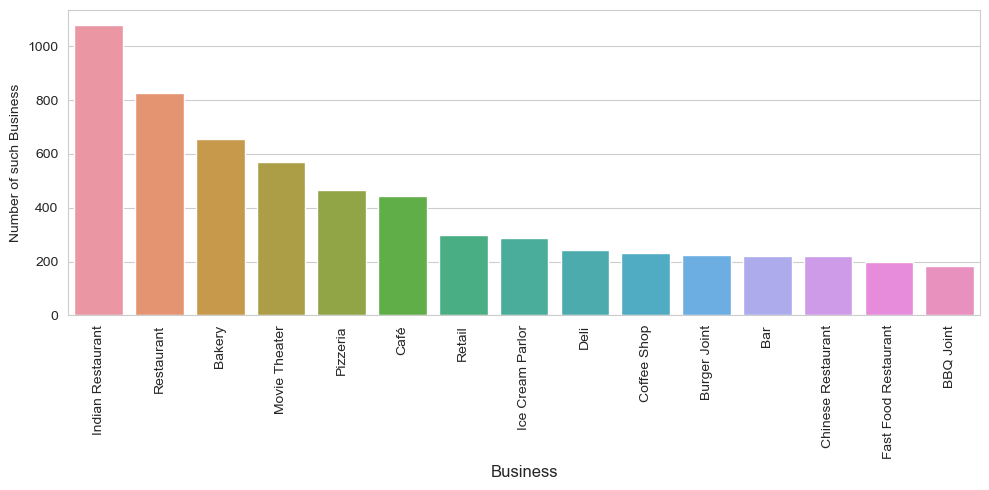

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x=hyderabad_nearby_df["Venue Category"].value_counts().head(15).index,y=hyderabad_nearby_df["Venue Category"].value_counts().head(15))
plt.xlabel("Business",fontsize=12)
plt.ylabel("Number of such Business")

plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.savefig("numberOfBuisnesstop15.png")

In [63]:
hyderabad_nearby_df["Venue Category"].value_counts()

Indian Restaurant                     1081
Restaurant                             825
Bakery                                 657
Movie Theater                          571
Pizzeria                               467
                                      ... 
Business and Professional Services       1
Outlet Mall                              1
Doctor's Office                          1
Swimming Pool                            1
Dhaba                                    1
Name: Venue Category, Length: 184, dtype: int64

In [65]:
hyderabad_nearby_df["Venue Category"].value_counts().head(15)

Indian Restaurant       1081
Restaurant               825
Bakery                   657
Movie Theater            571
Pizzeria                 467
Café                     442
Retail                   299
Ice Cream Parlor         287
Deli                     243
Coffee Shop              233
Burger Joint             223
Bar                      220
Chinese Restaurant       219
Fast Food Restaurant     197
BBQ Joint                185
Name: Venue Category, dtype: int64

In [66]:
hyderabad_nearby_df[hyderabad_nearby_df["Area"]=="Shamshabad"]["Venue Category"].value_counts()

Restaurant                         5
Bakery                             2
Mosque                             2
Shopping Mall                      2
Movie Theater                      2
Office Building                    2
Burger Joint                       2
Diner                              2
South Indian Restaurant            2
Ice Cream Parlor                   2
History Museum                     2
Arts and Entertainment             2
Indie Movie Theater                1
Juice Bar                          1
Pizzeria                           1
Café                               1
Arcade                             1
Zoo                                1
Animal Shelter                     1
High School                        1
Deli                               1
Food Court                         1
Food Truck                         1
Museum                             1
Community and Government           1
Vegan and Vegetarian Restaurant    1
Mediterranean Restaurant           1
C

In [67]:
hyderabad_nearby_df[hyderabad_nearby_df["Area"]=="Ameerpet"]["Venue Category"].value_counts()

Indian Restaurant                  6
Bakery                             4
Restaurant                         4
Bar                                3
Chinese Restaurant                 2
Movie Theater                      2
Deli                               2
Coffee Shop                        2
Fast Food Restaurant               2
Ice Cream Parlor                   2
Retail                             2
Dessert Shop                       1
Donut Shop                         1
Night Club                         1
Hookah Bar                         1
Park                               1
Breakfast Spot                     1
BBQ Joint                          1
Hotel Bar                          1
Vegan and Vegetarian Restaurant    1
Shopping Mall                      1
Diner                              1
Asian Restaurant                   1
Performing Arts Venue              1
Cafe, Coffee, and Tea House        1
Department Store                   1
Bookstore                          1
A

In [68]:
hyderabad_nearby_df["Venue Category"].nunique()

184

In [71]:
hyderabad_nearby_df.groupby("Area").count().head()

Area Latitude  Area Longitude  Venue  Venue Latitude  \
Area                                                                    
A. S. Rao Nagar             49              49     49              49   
A.C. Guards                 50              50     50              50   
Abids                       50              50     50              50   
Addagutta                   50              50     50              50   
Adikmet                     50              50     50              50   

                 Venue Longitude  Venue Category  
Area                                              
A. S. Rao Nagar               49              49  
A.C. Guards                   50              50  
Abids                         50              50  
Addagutta                     50              50  
Adikmet                       50              50

In [73]:
hyderabad_nearby_df.groupby("Area").count().tail()

Area Latitude  Area Longitude  Venue  Venue Latitude  \
Area                                                                  
Vikrampuri                50              50     50              50   
Vinayak Nagar             50              50     50              50   
Warsiguda                 50              50     50              50   
Yapral                    50              50     50              50   
Yousufguda                50              50     50              50   

               Venue Longitude  Venue Category  
Area                                            
Vikrampuri                  50              50  
Vinayak Nagar               50              50  
Warsiguda                   50              50  
Yapral                      50              50  
Yousufguda                  50              50

## Process of clustering

### ONE HOT CODING

In [74]:
one_hot_df = pd.get_dummies(hyderabad_nearby_df["Venue Category"])
one_hot_df["Area"] = hyderabad_nearby_df["Area"]
one_hot_df.head()

Afghan Restaurant  Amusement Park  Andhra Restaurant  Animal Shelter  \
0                  0               0                  0               0   
1                  0               0                  0               0   
2                  0               0                  0               0   
3                  0               0                  0               0   
4                  0               0                  0               0   

   Arcade  Art Gallery  Arts and Crafts Store  Arts and Entertainment  \
0       0            0                      0                       0   
1       0            0                      0                       0   
2       0            0                      0                       0   
3       0            0                      0                       0   
4       0            0                      0                       0   

   Asian Restaurant  Assisted Living Service  ...  Thai Restaurant  \
0                 0                        0  ...                0   
1                 0                        0  ...                0   
2                 0                        0  ...                0   
3                 0                        0  ...                0   
4                 0                        0  ...                0   

   Tobacco Store  Toy Store  Trade School  Vegan and Vegetarian Restaurant  \
0              0          0             0                                0   
1              0          0             0                                0   
2              0          0             0                                0   
3              0          0             0                                0   
4              0          0             0                                0   

   Veterinarian  Whisky Bar  Wine Bar  Zoo      Area  
0             0           0         0    0  Ameerpet  
1             0           0         0    0  Ameerpet  
2             0           0         0    0  Ameerpet  
3             0           0         0    0  Ameerpet  
4             0           0         0    0  Ameerpet  

[5 rows x 185 columns]

In [80]:
filtered_columns = [one_hot_df.columns[-1]]+list(one_hot_df.columns[:-1])
one_hot_df = one_hot_df[filtered_columns]
hyderabad_grouped_df =  one_hot_df.groupby("Area").mean().reset_index()
hyderabad_grouped_df.head()

Area  Zoo  Afghan Restaurant  Amusement Park  Andhra Restaurant  \
0  A. S. Rao Nagar  0.0                0.0             0.0                0.0   
1      A.C. Guards  0.0                0.0             0.0                0.0   
2            Abids  0.0                0.0             0.0                0.0   
3        Addagutta  0.0                0.0             0.0                0.0   
4          Adikmet  0.0                0.0             0.0                0.0   

   Animal Shelter  Arcade  Art Gallery  Arts and Crafts Store  \
0             0.0    0.00          0.0                    0.0   
1             0.0    0.02          0.0                    0.0   
2             0.0    0.02          0.0                    0.0   
3             0.0    0.00          0.0                    0.0   
4             0.0    0.00          0.0                    0.0   

   Arts and Entertainment  ...  Tennis Court  Textiles Store  Thai Restaurant  \
0                     0.0  ...           0.0             0.0              0.0   
1                     0.0  ...           0.0             0.0              0.0   
2                     0.0  ...           0.0             0.0              0.0   
3                     0.0  ...           0.0             0.0              0.0   
4                     0.0  ...           0.0             0.0              0.0   

   Tobacco Store  Toy Store  Trade School  Vegan and Vegetarian Restaurant  \
0           0.00        0.0           0.0                             0.00   
1           0.00        0.0           0.0                             0.00   
2           0.02        0.0           0.0                             0.00   
3           0.00        0.0           0.0                             0.02   
4           0.02        0.0           0.0                             0.00   

   Veterinarian  Whisky Bar  Wine Bar  
0           0.0         0.0       0.0  
1           0.0         0.0       0.0  
2           0.0         0.0       0.0  
3           0.0         0.0       0.0  
4           0.0         0.0       0.0  

[5 rows x 185 columns]

In [76]:
def top_15_venue (row,num_of_top_venues=15):
    temp = row.iloc[1:]
    temp_sorted = temp.sort_values(ascending=False)
    
    return temp_sorted.index.values[0:num_of_top_venues]

In [82]:
top_15 =15
position = ["st","nd","rd"]
column=["Area"]
for i in np.arange(top_15):
    if i<=2:
        column.append(f"{i+1}{position[i]} most common venue")
    else:
        column.append(f"{i+1}th most common venue")
top_15_venue_df = pd.DataFrame(columns=column)
top_15_venue_df["Area"]=hyderabad_grouped_df["Area"]        



for i in np.arange(hyderabad_grouped_df.shape[0]):
    top_15_venue_df.iloc[i,1:]=top_15_venue(hyderabad_grouped_df.iloc[i,:])

In [83]:
top_15_venue_df.head()

Area 1st most common venue 2nd most common venue  \
0  A. S. Rao Nagar                  Café              Pizzeria   
1      A.C. Guards     Indian Restaurant                Bakery   
2            Abids     Indian Restaurant                Bakery   
3        Addagutta            Restaurant                Bakery   
4          Adikmet     Indian Restaurant            Restaurant   

     3rd most common venue 4th most common venue 5th most common venue  \
0        Indian Restaurant          Burger Joint    Chinese Restaurant   
1                     Café         Movie Theater                 Hotel   
2  South Indian Restaurant         Movie Theater            Restaurant   
3        Indian Restaurant      Asian Restaurant         Movie Theater   
4                   Bakery    Chinese Restaurant         Movie Theater   

  6th most common venue    7th most common venue 8th most common venue  \
0                Bakery     Fast Food Restaurant              Hospital   
1            Restaurant  South Indian Restaurant             Juice Bar   
2                  Café                    Diner      Ice Cream Parlor   
3           Coffee Shop                     Café                   Pub   
4             Juice Bar         Ice Cream Parlor                  Deli   

  9th most common venue 10th most common venue 11th most common venue  \
0      Ice Cream Parlor    Indie Movie Theater                   Lake   
1    Chinese Restaurant                  Diner                 Bistro   
2                Retail     Chinese Restaurant           Burger Joint   
3             BBQ Joint           Burger Joint      French Restaurant   
4                  Café           Burger Joint                 Lounge   

  12th most common venue   13th most common venue  \
0         Clothing Store       Mobile Phone Store   
1         Science Museum            Shopping Mall   
2              Juice Bar                    Hotel   
3             Hookah Bar             Dessert Shop   
4         Breakfast Spot  South Indian Restaurant   

        14th most common venue       15th most common venue  
0                       Retail          Miscellaneous Store  
1        Performing Arts Venue  Cafe, Coffee, and Tea House  
2            French Restaurant  Cafe, Coffee, and Tea House  
3                    Juice Bar        Public Transportation  
4  Cafe, Coffee, and Tea House                  Gaming Cafe

In [84]:
top_15_venue_df.shape

(207, 16)

In [85]:
top_15_venue_df.to_csv("Hyderabad_top15_for_each_area.csv")

## Clustering

C:\Users\Gauri\AppData\Local\Temp\ipykernel_22684\726181105.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hyderabad_training=hyderabad_grouped_df.drop("Area",1)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

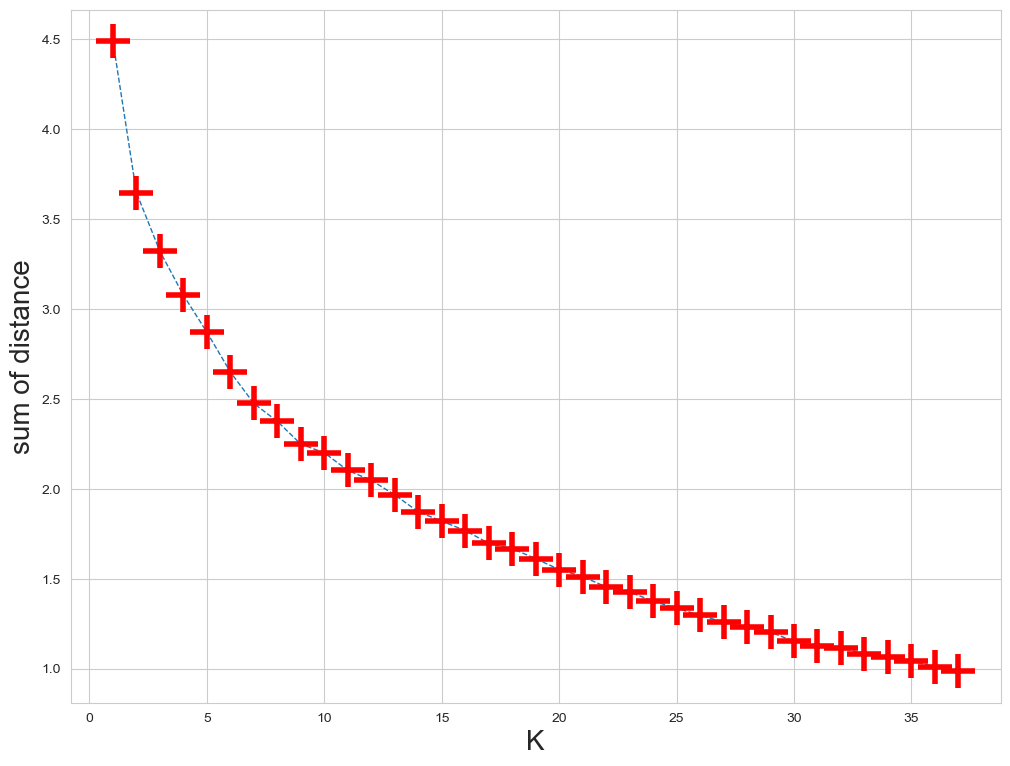

In [86]:
from sklearn.cluster import KMeans
hyderabad_training=hyderabad_grouped_df.drop("Area",1)

inertia=[]
K=range(1,38)
for k in K:
    km =KMeans(n_clusters=k,random_state=0).fit(hyderabad_training)
    inertia.append(km.inertia_)
plt.figure(figsize=(12,9))
plt.plot(K,inertia,marker="+",mec="red",ls="--",lw=1,markersize=25,markeredgewidth=4)
plt.xlabel("K",fontsize=20)
plt.ylabel("sum of distance",fontsize=20)
plt.savefig("elbow.png")

C:\Users\Gauri\AppData\Local\Temp\ipykernel_22684\1150139197.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hyd_train = hyderabad_grouped_df.drop("Area",1)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 2 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method For Optimal k')

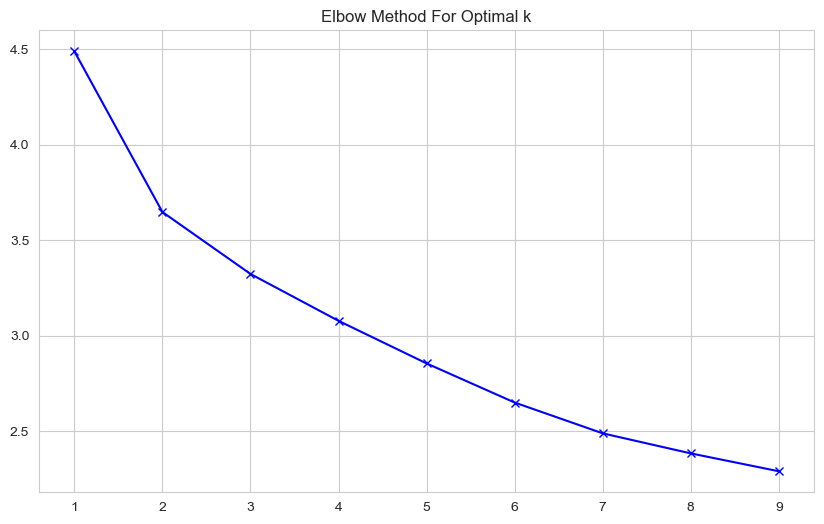

In [89]:
hyd_train = hyderabad_grouped_df.drop("Area",1)
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(hyd_train)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')

C:\Users\Gauri\AppData\Local\Temp\ipykernel_22684\3416555321.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hyd_train = hyderabad_grouped_df.drop("Area",1)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 2 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


11 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


12 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


13 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


14 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


15 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


16 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


18 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


19 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method For Optimal k')

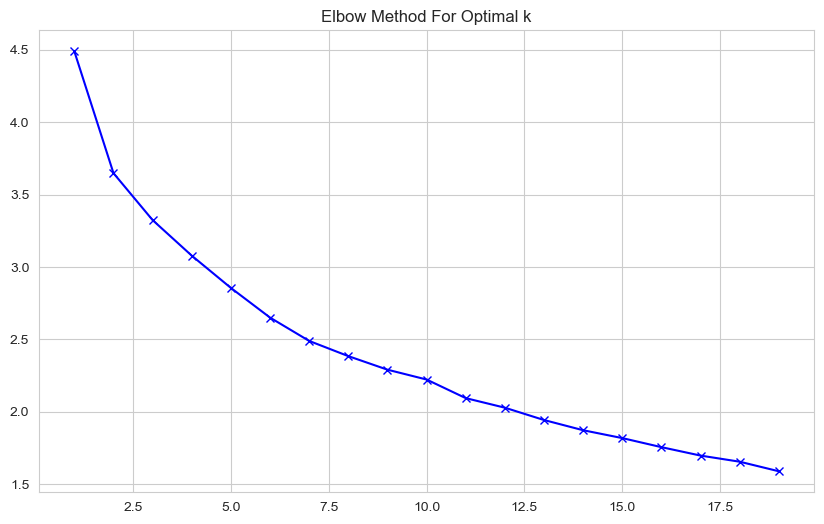

In [88]:
hyd_train = hyderabad_grouped_df.drop("Area",1)
sum_of_squared_distances = []
K = range(1,20)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(hyd_train)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')

In [127]:
k=8 #we will take 8 as its better choice 
kmeans = KMeans(n_clusters=k,random_state=0).fit(hyderabad_training)
print(kmeans.labels_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 3 3 2 3 3 2 4 3 1 0 4 4 1 3 3 4 1 1 1 3 3 6 0 2 0 6 5 3 3 1 0 5 1 3 5 2
 6 1 1 3 1 3 2 4 6 1 6 3 6 5 0 5 5 5 6 5 5 4 7 3 3 5 6 4 2 6 3 3 2 1 6 2 3
 5 4 6 5 2 3 1 6 2 2 2 6 2 2 0 5 4 1 3 4 2 6 3 5 1 4 3 5 6 3 4 2 1 6 5 1 4
 1 1 3 5 2 0 4 3 1 6 5 2 1 5 6 5 1 3 2 6 3 6 3 2 3 2 1 5 4 1 4 4 4 5 2 2 2
 7 5 1 4 7 5 2 0 5 4 6 2 3 5 0 4 5 3 3 3 2 3 0 4 3 4 0 0 5 6 2 2 4 5 1 2 2
 3 2 2 2 0 0 4 2 3 5 4 2 4 6 6 7 3 6 2 2 3 5]


In [128]:
top_15_venue_df.insert(0,"Cluster Labels",kmeans.labels_)
hyderabad_mergerd_df = hyderabad_df

hyderabad_mergerd_df=hyderabad_mergerd_df.join(top_15_venue_df.set_index("Area"),on="Area")

In [129]:
hyderabad_mergerd_df.head(10)

Area   Latitude  Longitude  Cluster Labels 1st most common venue  \
0       Ameerpet  17.438300  78.446800               0     Indian Restaurant   
1       Begumpet  17.443720  78.470740               0     Indian Restaurant   
2       SR Nagar  17.441660  78.441320               0     Indian Restaurant   
3  Prakash Nagar  17.438507  78.474877               2            Restaurant   
4     Punjagutta  17.426160  78.452100               0     Indian Restaurant   
5      Balkampet  17.444060  78.451660               0     Indian Restaurant   
6    Sanathnagar  17.456240  78.442970               0     Indian Restaurant   
7   Bharat Nagar  17.391680  78.382980               5     Indian Restaurant   
8      Erragadda  17.464208  78.430385               5     Indian Restaurant   
9      Borabanda  17.452700  78.412560               5     Indian Restaurant   

  2nd most common venue 3rd most common venue 4th most common venue  \
0                Bakery            Restaurant                   Bar   
1            Restaurant    Chinese Restaurant         Movie Theater   
2                   Bar            Restaurant                Bakery   
3     Indian Restaurant         Movie Theater    Chinese Restaurant   
4                Bakery         Movie Theater            Restaurant   
5                Bakery            Restaurant         Movie Theater   
6            Restaurant                   Bar                Bakery   
7            Restaurant                   Bar             BBQ Joint   
8                   Bar      Ice Cream Parlor            Restaurant   
9                   Bar            Restaurant      Ice Cream Parlor   

  5th most common venue        6th most common venue 7th most common venue  \
0                Retail         Fast Food Restaurant    Chinese Restaurant   
1                   Bar         Fast Food Restaurant      Asian Restaurant   
2    Chinese Restaurant                         Deli                Retail   
3      Asian Restaurant                          Bar  Fast Food Restaurant   
4             Bookstore           Chinese Restaurant                Retail   
5                Retail           Chinese Restaurant                  Deli   
6      Ice Cream Parlor                       Retail    Chinese Restaurant   
7                  Café  Historic and Protected Site      Ice Cream Parlor   
8                Bakery                    BBQ Joint                Retail   
9                  Café                       Bakery                  Deli   

         8th most common venue 9th most common venue  \
0                         Deli         Movie Theater   
1                       Retail                   Pub   
2                Movie Theater      Ice Cream Parlor   
3  Cafe, Coffee, and Tea House                  Café   
4                          Bar           Coffee Shop   
5                          Bar           Coffee Shop   
6                         Deli  Fast Food Restaurant   
7       Arts and Entertainment                Bakery   
8                         Deli                 Diner   
9                    BBQ Joint        Breakfast Spot   

        10th most common venue       11th most common venue  \
0                  Coffee Shop             Ice Cream Parlor   
1                        Diner        Performing Arts Venue   
2         Fast Food Restaurant                        Diner   
3                       Retail                Shopping Mall   
4  Cafe, Coffee, and Tea House             Asian Restaurant   
5             Ice Cream Parlor             Asian Restaurant   
6                    Hotel Bar  Cafe, Coffee, and Tea House   
7                 Dessert Shop                  Coffee Shop   
8                      Brewery                Bowling Alley   
9                   Sports Bar                Bowling Alley   

  12th most common venue       13th most common venue  \
0  Performing Arts Venue                    Hotel Bar   
1           Burger Joint        Public Transportation   
2       

## Mapping cluster

In [130]:
map_clusters = folium.Map(location=[hyd_lat, hyd_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area, cluster in zip(hyderabad_mergerd_df['Latitude'], hyderabad_mergerd_df['Longitude'], hyderabad_mergerd_df['Area'], hyderabad_mergerd_df['Cluster Labels']):
    label = folium.Popup(f"{str(area)} Cluster {str(cluster)}", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [131]:
#this will make a dictionary and segment the dataset based on  cluster
cluster={}
for i in range(8):
    cluster["Cluster_"+str(i+1)]=hyderabad_mergerd_df.loc[hyderabad_mergerd_df["Cluster Labels"]==i][["Area"]+list(hyderabad_mergerd_df.columns[4:])]

In [132]:
cluster["Cluster_1"] #extraccting cluster from dictionary

Area 1st most common venue 2nd most common venue  \
0           Ameerpet     Indian Restaurant                Bakery   
1           Begumpet     Indian Restaurant            Restaurant   
2           SR Nagar     Indian Restaurant                   Bar   
4         Punjagutta     Indian Restaurant                Bakery   
5          Balkampet     Indian Restaurant                Bakery   
6        Sanathnagar     Indian Restaurant            Restaurant   
11        Khairtabad     Indian Restaurant         Movie Theater   
12        Somajiguda     Indian Restaurant         Movie Theater   
13   Raj Bhavan Road     Indian Restaurant         Movie Theater   
17        Masab Tank     Indian Restaurant            Restaurant   
89   Srinagar colony     Indian Restaurant            Restaurant   
112        Balanagar     Indian Restaurant            Restaurant   
113      Fateh Nagar     Indian Restaurant            Restaurant   
185     Sanghi Nagar     Indian Restaurant                   Bar   

    3rd most common venue 4th most common venue 5th most common venue  \
0              Restaurant                   Bar                Retail   
1      Chinese Restaurant         Movie Theater                   Bar   
2              Restaurant                Bakery    Chinese Restaurant   
4           Movie Theater            Restaurant             Bookstore   
5              Restaurant         Movie Theater                Retail   
6                     Bar                Bakery      Ice Cream Parlor   
11             Restaurant           Coffee Shop  Fast Food Restaurant   
12             Restaurant                   Pub      Asian Restaurant   
13             Restaurant                Bakery      Asian Restaurant   
17                 Bakery         Movie Theater                  Café   
89                    Bar                Bakery    Chinese Restaurant   
112                Bakery                Retail    Chinese Restaurant   
113                Bakery                   Bar         Movie Theater   
185            Restaurant                Bakery    Chinese Restaurant   

           6th most common venue 7th most common venue 8th most common venue  \
0           Fast Food Restaurant    Chinese Restaurant                  Deli   
1           Fast Food Restaurant      Asian Restaurant                Retail   
2                           Deli                Retail         Movie Theater   
4             Chinese Restaurant                Retail                   Bar   
5             Chinese Restaurant                  Deli                   Bar   
6                         Retail    Chinese Restaurant                  Deli   
11   Cafe, Coffee, and Tea House                  Café                  Deli   
12                     Bookstore                Bakery           Coffee Shop   
13                     Bookstore           Coffee Shop                  Deli   
17              Asian Restaurant           Coffee Shop             Bookstore   
89                 Movie Theater           Coffee Shop  Fast Food Restaurant   
112         Fast Food Restaurant              Pizzeria      Ice Cream Parlor   
113                       Retail    Chinese Restaurant                  Deli   
185                         Deli                Retail         Movie Theater   

    9th most common venue       10th most common venue  \
0           Movie Theater                  Coffee Shop   
1                     Pub                        Diner   
2        Ice Cream Parlor         Fast Food Restaurant   
4             Coffee Shop  Cafe, Coffee, and Tea House   
5             Coffee Shop             Ice Cream Parlor   
6    Fast Food Restaurant                    Hotel Bar   
11                    Bar                       Retail   
12                 Retail                         Deli   
13                    Pub  Cafe, Coffee, and Tea House   
17                  Hotel                          Bar   
89       Ice Cream Parlor                         Café   
11

In [133]:
cluster["Cluster_2"] 

Area 1st most common venue 2nd most common venue  \
22       Ashok Nagar              Pizzeria     Indian Restaurant   
91      Chanda Nagar              Pizzeria                Bakery   
94        Madinaguda              Pizzeria            Restaurant   
95           Miyapur              Pizzeria         Movie Theater   
98        Bachupally              Pizzeria                Bakery   
100         Nizampet                Bakery              Pizzeria   
103        Mallampet              Pizzeria     Indian Restaurant   
105    BHEL Township              Pizzeria                Retail   
107         Ameenpur  Fast Food Restaurant     Indian Restaurant   
108       Beeramguda                Bakery  Fast Food Restaurant   
109    Kistareddypet     Indian Restaurant   Government Building   
110     IDA Bollaram              Pizzeria     Indian Restaurant   
128   Macha Bollaram              Pizzeria     Indian Restaurant   
130        Shamirpet                  Café     Indian Restaurant   
135   Kakatiya Nagar              Pizzeria       Office Building   
137        Moula-Ali                  Café              Pizzeria   
144  A. S. Rao Nagar                  Café              Pizzeria   
147       Kushaiguda                  Café     Indian Restaurant   
148      Cherlapally              Pizzeria     Indian Restaurant   
151       Dammaiguda              Pizzeria                  Café   
158         Boduppal              Pizzeria         Movie Theater   
161         Mallapur              Pizzeria                Retail   
163     Peerzadiguda     Indian Restaurant              Pizzeria   
164     Chengicherla              Pizzeria         Movie Theater   
166        Narapally     Indian Restaurant              Pizzeria   
167        Medipally              Pizzeria                Bakery   
178        Badangpet         Movie Theater                Temple   

    3rd most common venue 4th most common venue  5th most common venue  \
22                 Bakery                  Café          Movie Theater   
91      Indian Restaurant            Restaurant             Night Club   
94      Indian Restaurant                Bakery                   Café   
95                 Retail                  Café      Indian Restaurant   
98      Indian Restaurant         Movie Theater                   Deli   
100          Burger Joint         Movie Theater      Indian Restaurant   
103                Bakery         Movie Theater        Cosmetics Store   
105  Fast Food Restaurant     Indian Restaurant                 Bakery   
107                Bakery   Government Building       Department Store   
108                Retail     Indian Restaurant       Department Store   
109      Department Store         Movie Theater                 Bakery   
110                Bakery         Movie Theater  Sports and Recreation   
128                Bakery         Movie Theater            Coffee Shop   
130         Movie Theater                  Park                 Bakery   
135                Bakery         Movie Theater   Other Great Outdoors   
137     Indian Restaurant    Chinese Restaurant           Burger Joint   
144     Indian Restaurant          Burger Joint     Chinese Restaurant   
147              Pizzeria                Bakery    Housing Development   
148              Hospital                Bakery                   Café   
151     Indian Restaurant   Miscellaneous Store                 Bakery   
158                Retail     Indian Restaurant                 Bakery   
161                Bakery         Movie Theater                   Café   
163                  Café         Movie Theater                   Deli   
164                Retail                  Café      Indian Restaurant   
166           Coffee Shop                Retail        Office Building   
167         Movie Theater     Indian Restaurant        Office Building   
178         Garden Center                  Park               Pizzeria   

        6th most common venue     7th 

In [134]:
cluster["Cluster_3"] 

Area 1st most common venue 2nd most common venue  \
3              Prakash Nagar            Restaurant     Indian Restaurant   
24                 Hyderguda                Bakery            Restaurant   
29              Shanker Mutt     Indian Restaurant            Restaurant   
48              Secunderabad     Indian Restaurant         Movie Theater   
49               Chilkalguda            Restaurant                Bakery   
50                Kavadiguda            Restaurant     Indian Restaurant   
51    MG Road (James Street)            Restaurant     Indian Restaurant   
53             Minister Road            Restaurant     Indian Restaurant   
54                Mylargadda     Indian Restaurant            Restaurant   
55               Namalagundu            Restaurant     Indian Restaurant   
56            Padmarao Nagar            Restaurant     Indian Restaurant   
57                 Pan bazar            Restaurant     Indian Restaurant   
58                Parsigutta     Indian Restaurant            Restaurant   
60                 Rani Gunj     Indian Restaurant            Restaurant   
61                   RP Road            Restaurant     Indian Restaurant   
62             Sindhi Colony            Restaurant     Indian Restaurant   
63             Sitaphalmandi            Restaurant         Movie Theater   
64                   Tarnaka         Movie Theater            Restaurant   
65                 Warsiguda     Indian Restaurant            Restaurant   
66                 Addagutta            Restaurant                Bakery   
67               Tukaramgate            Restaurant                Bakery   
68   Secunderabad Cantonment     Indian Restaurant         Movie Theater   
69                Bowenpally            Restaurant     Indian Restaurant   
70                  Karkhana            Restaurant     Indian Restaurant   
71               Marredpally            Restaurant     Indian Restaurant   
72              Sikh Village            Restaurant     Indian Restaurant   
79              Nanakramguda            Restaurant     Indian Restaurant   
84                  Kondapur            Restaurant           Coffee Shop   
92             Allwyn Colony                Bakery     Indian Restaurant   
97             Allwyn Colony                Bakery     Indian Restaurant   
99                      KPHB            Restaurant                Bakery   
116               Hasmathpet            Restaurant                Bakery   
119           Jagadgirigutta                Bakery     Indian Restaurant   
124               Kandlakoya                Retail     Indian Restaurant   
136            Vinayak Nagar            Restaurant              Pizzeria   
143                    Kapra            Restaurant                Bakery   
149                  Keesara                  Café                Temple   
179                  Balapur            Restaurant     Indian Restaurant   
205               Shamshabad            Restaurant          Burger Joint   

       3rd most common venue        4th most common venue  \
3              Movie Theater           Chinese Restaurant   
24         Indian Restaurant                         Café   
29             Movie Theater                       Bakery   
48                Restaurant                  Coffee Shop   
49             Movie Theater            Indian Restaurant   
50             Movie Theater           Chinese Restaurant   
51             Movie Theater  Cafe, Coffee, and Tea House   
53             Movie Theater           Chinese Restaurant   
54             Movie Theater                       Bakery   
55             Movie Theater                       Bakery   
56                    Bakery                Movie Theater   
57             Movie Theater  Cafe, Coffee, and Tea House   
58        Chinese Restaurant                Movie Theater   
60             Movie Theater                       Bakery   
61                    Bakery                    BBQ Joint   
62     

In [135]:
cluster["Cluster_4"] 

Area 1st most common venue  \
14                       Lakdikapool     Indian Restaurant   
15                          Saifabad     Indian Restaurant   
16                       A.C. Guards     Indian Restaurant   
19                       Musheerabad     Indian Restaurant   
20                      Chikkadpally     Indian Restaurant   
21                      Himayatnagar     Indian Restaurant   
23                         Domalguda     Indian Restaurant   
25                          Ramnagar     Indian Restaurant   
27                           Adikmet     Indian Restaurant   
28                        Nallakunta            Restaurant   
30                       RTC X Roads     Indian Restaurant   
32                  Bagh Lingampally     Indian Restaurant   
33                        Vidyanagar     Indian Restaurant   
34                          Amberpet         Movie Theater   
35                        Tilaknagar     Indian Restaurant   
36                           Golnaka     Indian Restaurant   
37                        Barkatpura     Indian Restaurant   
38                       Shivam Road            Restaurant   
39                     Jamia Osmania     Indian Restaurant   
40                         Kachiguda     Indian Restaurant   
41                        Badichowdi     Indian Restaurant   
42                          Nampally     Indian Restaurant   
43                             Abids     Indian Restaurant   
44                          Aghapura     Indian Restaurant   
45                              Koti     Indian Restaurant   
46                       Bank Street     Indian Restaurant   
47                       Boggulkunta         Movie Theater   
80                           Kokapet     Indian Restaurant   
111  Medical Devices Park, Hyderabad     Indian Restaurant   
142                           Yapral     Indian Restaurant   
150                          Nagaram     Indian Restaurant   
153                         Rampally     Indian Restaurant   
154                         Cheriyal     Indian Restaurant   
157                      Ramanthapur     Indian Restaurant   
183                      Lingojiguda     Indian Restaurant   
187                      Hayathnagar     Indian Restaurant   
191                     Gudimalkapur     Indian Restaurant   
192                       Asif Nagar     Indian Restaurant   
195                       Mallepally     Indian Restaurant   
197                        Red Hills     Indian Restaurant   
199                          Attapur     Indian Restaurant   

    2nd most common venue    3rd most common venue    4th most common venue  \
14                 Bakery            Movie Theater                     Café   
15                 Bakery            Movie Theater                     Café   
16                 Bakery                     Café            Movie Theater   
19             Restaurant            Movie Theater       Chinese Restaurant   
20          Movie Theater               Restaurant                   Bakery   
21          Movie Theater               Restaurant                   Bakery   
23          Movie Theater               Restaurant                   Bakery   
25             Restaurant            Movie Theater       Chinese Restaurant   
27             Restaurant                   Bakery       Chinese Restaurant   
28      Indian Restaurant            Movie Theater                   Bakery   
30             Restaurant            Movie Theater         Ice Cream Parlor   
32             Restaurant  South Indian Restaurant                   Bakery   
33             Restaurant            Movie Theater                Juice Bar   
34      Indian Restaurant               Restaurant                    Diner   
35          Movie Theater               Restaurant                   Bakery   
36             Restaurant            Movie Theater                   Bakery   
37             Restaurant            Movie Theater                   Bakery   
38   

In [136]:
cluster["Cluster_5"] 

Area 1st most common venue 2nd most common venue  \
18     Chintal Basti              Pizzeria            Restaurant   
26          Azamabad            Restaurant          Dessert Shop   
73      Trimulgherry              Pizzeria                  Café   
90   Serilingampally              Pizzeria                Bakery   
93         Hafeezpet              Pizzeria            Restaurant   
115   Old Bowenpally            Restaurant          Burger Joint   
117     Quthbullapur            Restaurant     Indian Restaurant   
118       Jeedimetla            Restaurant              Pizzeria   
120          Suraram            Restaurant              Pizzeria   
121  Pet Basheerabad            Restaurant              Pizzeria   
122         Kompally              Pizzeria            Restaurant   
123          Medchal            Restaurant              Pizzeria   
125            Alwal            Restaurant              Pizzeria   
126        Lothkunta            Restaurant                  Café   
127        Old Alwal            Restaurant              Pizzeria   
131       Malkajgiri            Restaurant                Bakery   
132        Anandbagh              Pizzeria     Indian Restaurant   
133         Ammuguda                  Café              Pizzeria   
134    Gautham Nagar            Restaurant          Burger Joint   
138         Neredmet            Restaurant          Burger Joint   
139     Old Neredmet                  Café     Indian Restaurant   
140        Safilguda          Burger Joint              Pizzeria   
141       Sainikpuri            Restaurant          Burger Joint   
172      L. B. Nagar              Pizzeria  Fast Food Restaurant   
198    Rajendranagar         Grocery Store            Restaurant   
202        Kismatpur              Pizzeria          Burger Joint   
207        Umdanagar            Restaurant          Burger Joint   

    3rd most common venue  4th most common venue 5th most common venue  \
18      Indian Restaurant                 Bakery                  Café   
26               Pizzeria   Fast Food Restaurant                Bakery   
73           Burger Joint      Indian Restaurant                Bakery   
90             Restaurant            Coffee Shop               Stadium   
93                 Bakery          Movie Theater     Indian Restaurant   
115              Pizzeria                   Deli                Bakery   
117              Pizzeria           Burger Joint                  Deli   
118          Burger Joint              BBQ Joint                  Café   
120   Housing Development                 Bakery  Fast Food Restaurant   
121      Asian Restaurant           Burger Joint             BBQ Joint   
122  Fast Food Restaurant          Movie Theater                Church   
123          Burger Joint              BBQ Joint  Fast Food Restaurant   
125          Burger Joint                 Bakery         Movie Theater   
126                Bakery           Burger Joint              Pizzeria   
127          Burger Joint                 Bakery         Movie Theater   
131              Pizzeria   Fast Food Restaurant                  Café   
132                  Café           Burger Joint            Restaurant   
133     Indian Restaurant           Burger Joint                Bakery   
134              Pizzeria                 Bakery  Fast Food Restaurant   
138              Pizzeria                 Bakery                  Café   
139              Pizzeria           Burger Joint  Fast Food Restaurant   
140                Bakery             Restaurant  Fast Food Restaurant   
141              Pizzeria                 Bakery                  Café   
172     Indian Restaurant            Coffee Shop            Restaurant   
198          Burger Joint          Shopping Mall      Department Store   
202                  Café  Sports and Recreation                  Deli   
207       Office Building      Indian Restaurant                  Café   

           6th most common venue      

In [137]:
cluster["Cluster_6"] 

Area 1st most common venue  \
7                          Bharat Nagar     Indian Restaurant   
8                             Erragadda     Indian Restaurant   
9                             Borabanda     Indian Restaurant   
10                           Moti Nagar     Indian Restaurant   
31                         Gandhi Nagar     Indian Restaurant   
59                                Patny     Indian Restaurant   
75                           Gachibowli            Restaurant   
76                              Raidurg     Indian Restaurant   
77                            Khajaguda            Restaurant   
78                            Manikonda     Indian Restaurant   
81                   Shaikpet Hyderabad     Indian Restaurant   
82                           HITEC City     Indian Restaurant   
83                             Madhapur            Restaurant   
85                        Jubilee Hills     Indian Restaurant   
86                        Banjara Hills            Restaurant   
87                           Film Nagar     Indian Restaurant   
88                           Yousufguda     Indian Restaurant   
96                           Kukatpally            Restaurant   
101                      Pragathi Nagar     Indian Restaurant   
102                            Moosapet     Indian Restaurant   
114                           Ferozguda     Indian Restaurant   
152                        Jawaharnagar     Indian Restaurant   
186                        Santoshnagar     Indian Restaurant   
189                         Mehdipatnam     Indian Restaurant   
190                         Toli chowki     Indian Restaurant   
193                         Langar Houz     Indian Restaurant   
196             Padmanabha Nagar Colony     Indian Restaurant   
201                            Gandipet     Indian Restaurant   
203                            Narsingi            Restaurant   
204                          Puppalguda            Restaurant   
206  Rajiv Gandhi International Airport     Indian Restaurant   

    2nd most common venue 3rd most common venue 4th most common venue  \
7              Restaurant                   Bar             BBQ Joint   
8                     Bar      Ice Cream Parlor            Restaurant   
9                     Bar            Restaurant      Ice Cream Parlor   
10       Ice Cream Parlor                   Bar                Bakery   
31                 Bakery            Restaurant      Ice Cream Parlor   
59             Restaurant                  Café                   Bar   
75      Indian Restaurant                Bakery      Asian Restaurant   
76             Restaurant                Bakery                  Café   
77      Indian Restaurant                   Bar           Coffee Shop   
78             Restaurant                   Bar          Dessert Shop   
81                    Bar            Restaurant                Bakery   
82             Restaurant                  Café                   Bar   
83      Indian Restaurant                  Café                   Bar   
85                    Bar            Restaurant                Bakery   
86                    Bar                Bakery     Indian Restaurant   
87                    Bar            Restaurant                  Café   
88                    Bar            Restaurant                Bakery   
96      Indian Restaurant                Bakery             BBQ Joint   
101                Bakery            Restaurant      Ice Cream Parlor   
102                Bakery            Restaurant      Ice Cream Parlor   
114                Bakery      Ice Cream Parlor                   Bar   
152                   Bar            Restaurant                Bakery   
186                  Café            Restaurant                Bakery   
189                  Café            Restaurant                Bakery   
190                   Bar            Restaurant                  Café   
193                  Café            Restaurant         

In [138]:
cluster["Cluster_7"] 

Area 1st most common venue 2nd most common venue  \
52          Madannapet            Restaurant              Pizzeria   
74          Vikrampuri         Movie Theater     Indian Restaurant   
106           RC Puram         Movie Theater     Indian Restaurant   
145     ECIL 'X' Roads         Movie Theater     Indian Restaurant   
146       Kamala Nagar              Pizzeria     Indian Restaurant   
155              Uppal         Movie Theater              Pizzeria   
156          Habsiguda         Movie Theater            Restaurant   
159             Nagole         Movie Theater              Pizzeria   
160           Nacharam         Movie Theater              Pizzeria   
168       Dilsukhnagar              Pizzeria     Indian Restaurant   
169           Kothapet     Indian Restaurant              Pizzeria   
170       Gaddiannaram              Pizzeria            Restaurant   
171       Moosarambagh              Pizzeria     Indian Restaurant   
173       Bairamalguda              Pizzeria         Movie Theater   
174      Chintalakunta         Movie Theater     Indian Restaurant   
175    Vanasthalipuram                  Park         Movie Theater   
176       Hastinapuram         Movie Theater      Ice Cream Parlor   
177        Saroornagar     Indian Restaurant         Movie Theater   
180          Champapet            Restaurant              Pizzeria   
181         Jillelguda         Movie Theater              Pizzeria   
182         Karmanghat              Pizzeria         Movie Theater   
184            Meerpet              Pizzeria            Restaurant   
188     Ibrahim patnam         Movie Theater     Indian Restaurant   
194  Laxminagar Colony     Indian Restaurant              Pizzeria   
200         Bandlaguda         Movie Theater     Indian Restaurant   

    3rd most common venue 4th most common venue    5th most common venue  \
52      Indian Restaurant         Movie Theater  South Indian Restaurant   
74             Restaurant                Bakery                     Deli   
106              Pizzeria                  Café               Restaurant   
145              Pizzeria                  Park              Coffee Shop   
146         Movie Theater            Restaurant                   Retail   
155     Indian Restaurant            Restaurant                     Deli   
156              Pizzeria     Indian Restaurant                   Bakery   
159     Indian Restaurant                  Deli                     Café   
160     Indian Restaurant            Restaurant                     Café   
168         Movie Theater            Restaurant                   Bakery   
169         Movie Theater            Restaurant                     Deli   
170     Indian Restaurant         Movie Theater                   Bakery   
171         Movie Theater            Restaurant                   Bakery   
173     Indian Restaurant                Retail                     Park   
174            Restaurant              Pizzeria                   Bakery   
175     Indian Restaurant      Ice Cream Parlor        Automotive Retail   
176     Indian Restaurant              Pizzeria            Shopping Mall   
177              Pizzeria            Restaurant                     Café   
180         Movie Theater     Indian Restaurant         Ice Cream Parlor   
181     Indian Restaurant                Temple                     Park   
182            Restaurant     Indian Restaurant              Coffee Shop   
184         Movie Theater      Ice Cream Parlor              Coffee Shop   
188              Pizzeria      Ice Cream Parlor            Shopping Mall   
194         Movie Theater            Restaurant                     Deli   
200              Pizzeria                Temple         Ice Cream Parlor   

           6th most common venue        7th most common venue  \
52                         Diner                         Café   
74                      Pizzeria                         Café   
106                      

In [139]:
cluster["Cluster_8"] 

Area 1st most common venue 2nd most common venue  \
104    Patancheru                Retail     Indian Restaurant   
129  Venkatapuram                Retail           Coffee Shop   
162     Ghatkesar                Retail            Food Court   
165      Pocharam                Retail           Coffee Shop   

    3rd most common venue 4th most common venue 5th most common venue  \
104         Movie Theater           Snack Place   Government Building   
129          Hindu Temple            Food Court     Healthcare Clinic   
162           Coffee Shop  Other Great Outdoors       Office Building   
165            Food Court     Healthcare Clinic     Indian Restaurant   

     6th most common venue  7th most common venue  8th most common venue  \
104             Restaurant       Spiritual Center  Sports and Recreation   
129        Office Building  Sports and Recreation              Juice Bar   
162  Sports and Recreation              Juice Bar      Indian Restaurant   
165        Office Building  Sports and Recreation              Juice Bar   

    9th most common venue 10th most common venue    11th most common venue  \
104           Men's Store                   Café               Post Office   
129            Restaurant      Indian Restaurant  Community and Government   
162         Shopping Mall                   Café             Sandwich Spot   
165  Other Great Outdoors         Hardware Store            Medical Center   

    12th most common venue     13th most common venue 14th most common venue  \
104                  Diner          Polish Restaurant              Education   
129   Other Great Outdoors         Chinese Restaurant              Bookstore   
162             Restaurant  Car Parts and Accessories              Bookstore   
165    Dining and Drinking   Community and Government          Movie Theater   

    15th most common venue  
104      Convenience Store  
129              Education  
162     Chinese Restaurant  
165           Hindu Temple

In [140]:
col=['1st most common venue','2nd most common venue','3rd most common venue','4th most common venue','5th most common venue','6th most common venue','7th most common venue','8th most common venue','9th most common venue','10th most common venue']
list_ven ={}
# so basically this function will 
# extract all the list venues of a cluster in a single dict
def best_buisness_in_locatlity (dictionary):
    col=['1st most common venue','2nd most common venue','3rd most common venue','4th most common venue','5th most common venue','6th most common venue','7th most common venue','8th most common venue','9th most common venue','10th most common venue']  
    for key in dictionary:
        lis=[]
        for columnname in col:
            
            vl = dictionary[key][columnname].tolist()
            for li in vl:
                lis.append(li)
                
                
        list_ven[key]= lis   
    return list_ven  

In [141]:
best_buisness_in_locatlity(dictionary=cluster)

{'Cluster_1': ['Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Indian Restaurant',
  'Bakery',
  'Restaurant',
  'Bar',
  'Bakery',
  'Bakery',
  'Restaurant',
  'Movie Theater',
  'Movie Theater',
  'Movie Theater',
  'Restaurant',
  'Restaurant',
  'Restaurant',
  'Restaurant',
  'Bar',
  'Restaurant',
  'Chinese Restaurant',
  'Restaurant',
  'Movie Theater',
  'Restaurant',
  'Bar',
  'Restaurant',
  'Restaurant',
  'Restaurant',
  'Bakery',
  'Bar',
  'Bakery',
  'Bakery',
  'Restaurant',
  'Bar',
  'Movie Theater',
  'Bakery',
  'Restaurant',
  'Movie Theater',
  'Bakery',
  'Coffee Shop',
  'Pub',
  'Bakery',
  'Movie Theater',
  'Bakery',
  'Retail',
  'Bar',
  'Bakery',
  'Retail',
  'Bar',
  'Chinese Restaurant',
  'Bookstore',


In [142]:
df_ven_cluster=[]
top_10_ven_in_cluster={}
for i in range(8):
    df_ven_cluster.append(pd.DataFrame(list_ven[f"Cluster_{i+1}"],columns=["cluster_venues"]))
    top_10_ven_in_cluster[f"Cluster_{i+1}_venues"]=df_ven_cluster[i]["cluster_venues"].value_counts().head(15)

## Exploratory Data Analysis

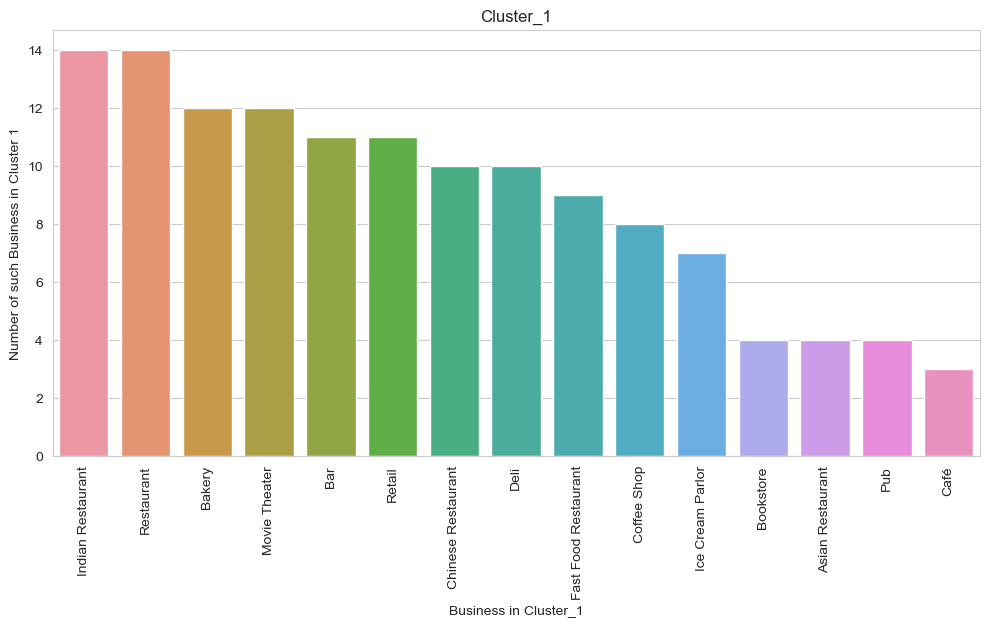

In [143]:
X=top_10_ven_in_cluster["Cluster_1_venues"].index
Y=top_10_ven_in_cluster["Cluster_1_venues"]
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_ven_in_cluster["Cluster_1_venues"].index,y=top_10_ven_in_cluster["Cluster_1_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_1")
plt.ylabel("Number of such Business in Cluster 1")
plt.title("Cluster_1")
plt.savefig("Cluster_1.png")

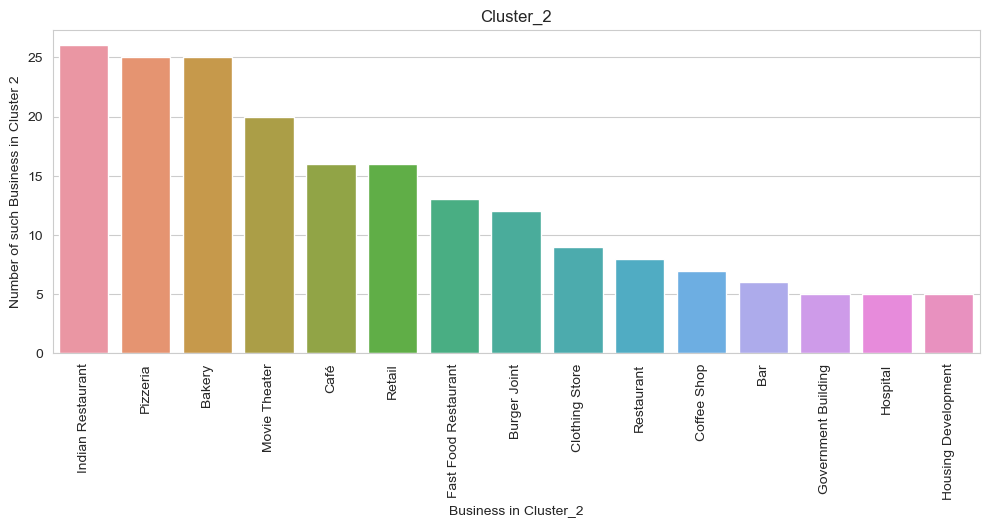

In [144]:
X=top_10_ven_in_cluster["Cluster_2_venues"].index
Y=top_10_ven_in_cluster["Cluster_2_venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_ven_in_cluster["Cluster_2_venues"].index,y=top_10_ven_in_cluster["Cluster_2_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_2")
plt.ylabel("Number of such Business in Cluster 2")
plt.title("Cluster_2")
plt.savefig("Cluster_2.png")

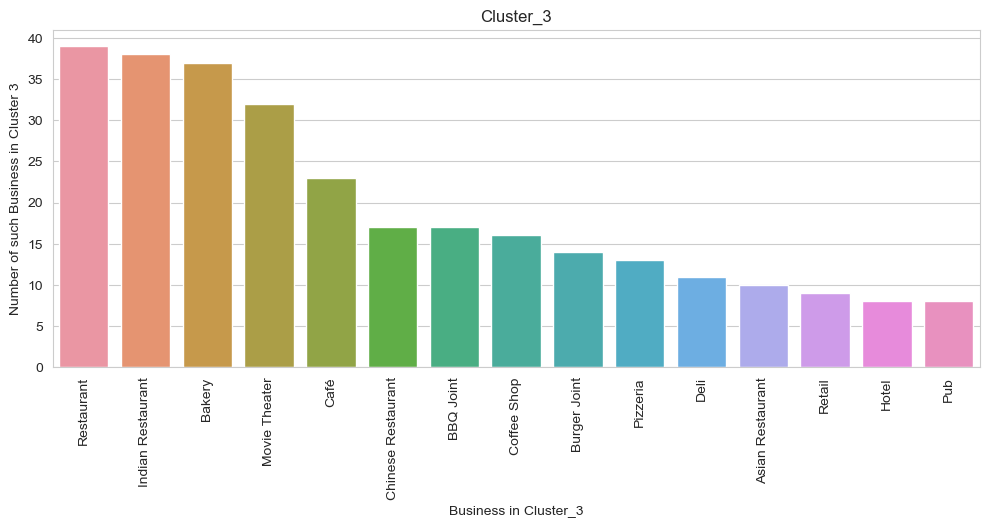

In [145]:
X=top_10_ven_in_cluster["Cluster_3_venues"].index
Y=top_10_ven_in_cluster["Cluster_3_venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_ven_in_cluster["Cluster_3_venues"].index,y=top_10_ven_in_cluster["Cluster_3_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_3")
plt.ylabel("Number of such Business in Cluster 3")
plt.title("Cluster_3")
plt.savefig("Cluster_3.png")

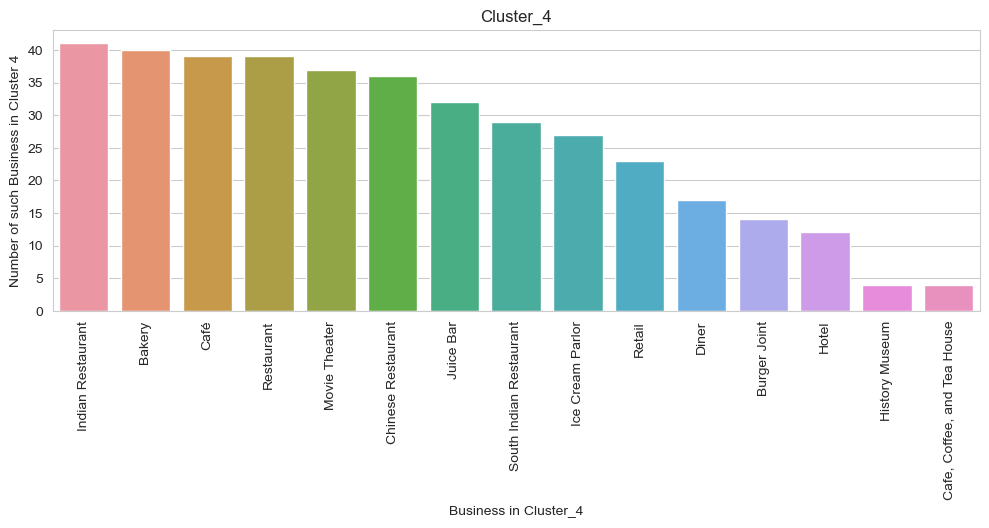

In [146]:
X=top_10_ven_in_cluster["Cluster_4_venues"].index
Y=top_10_ven_in_cluster["Cluster_4_venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_ven_in_cluster["Cluster_4_venues"].index,y=top_10_ven_in_cluster["Cluster_4_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_4")
plt.ylabel("Number of such Business in Cluster 4")
plt.title("Cluster_4")
plt.savefig("Cluster_4.png")

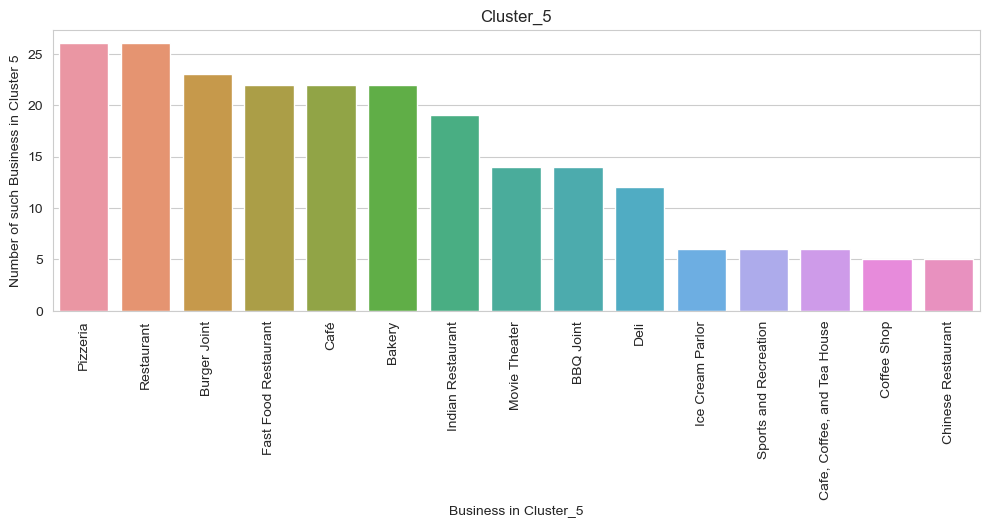

In [147]:
X=top_10_ven_in_cluster["Cluster_5_venues"].index
Y=top_10_ven_in_cluster["Cluster_5_venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_ven_in_cluster["Cluster_5_venues"].index,y=top_10_ven_in_cluster["Cluster_5_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_5")
plt.ylabel("Number of such Business in Cluster 5")
plt.title("Cluster_5")
plt.savefig("Cluster_5.png")

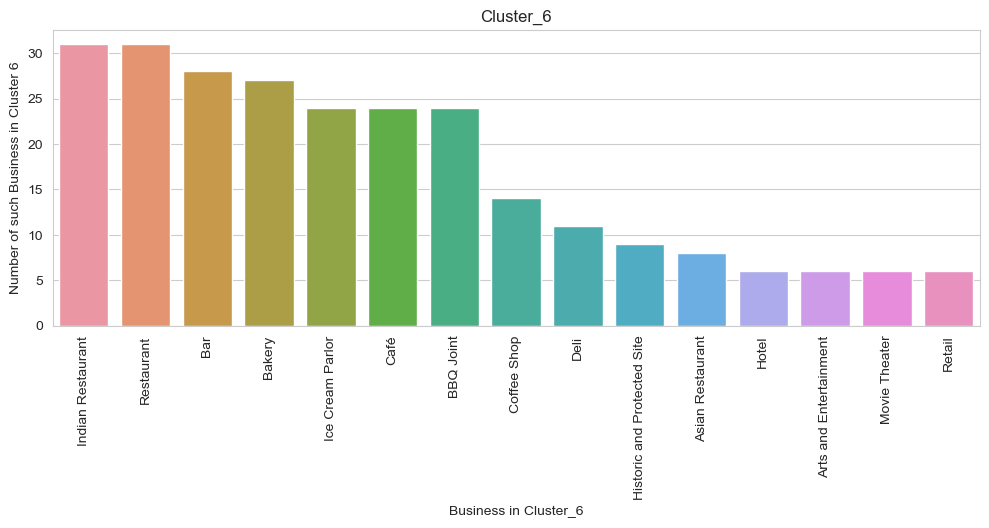

In [148]:
X=top_10_ven_in_cluster["Cluster_6_venues"].index
Y=top_10_ven_in_cluster["Cluster_6_venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_ven_in_cluster["Cluster_6_venues"].index,y=top_10_ven_in_cluster["Cluster_6_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_6")
plt.ylabel("Number of such Business in Cluster 6")
plt.title("Cluster_6")
plt.savefig("Cluster_6.png")

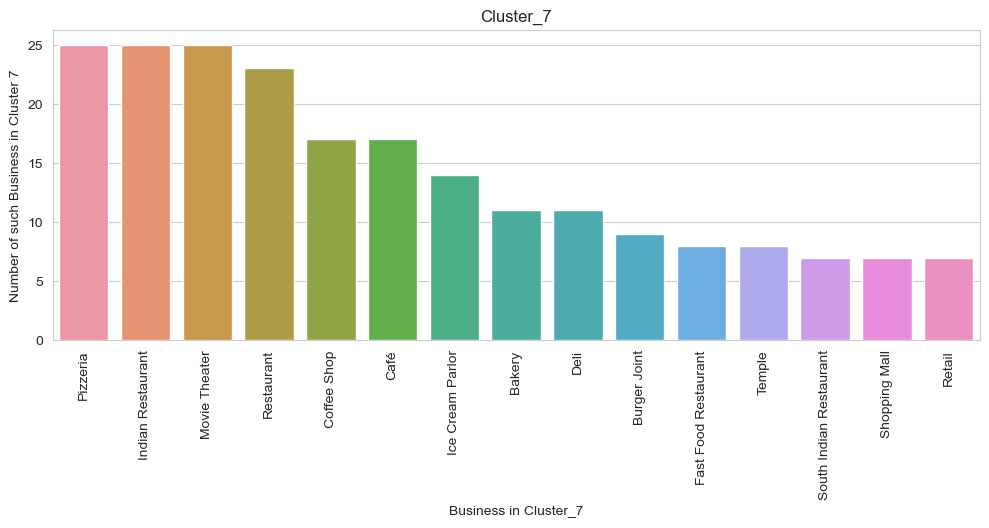

In [149]:
X=top_10_ven_in_cluster["Cluster_7_venues"].index
Y=top_10_ven_in_cluster["Cluster_7_venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_ven_in_cluster["Cluster_7_venues"].index,y=top_10_ven_in_cluster["Cluster_7_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_7")
plt.ylabel("Number of such Business in Cluster 7")
plt.title("Cluster_7")
plt.savefig("Cluster_7.png")

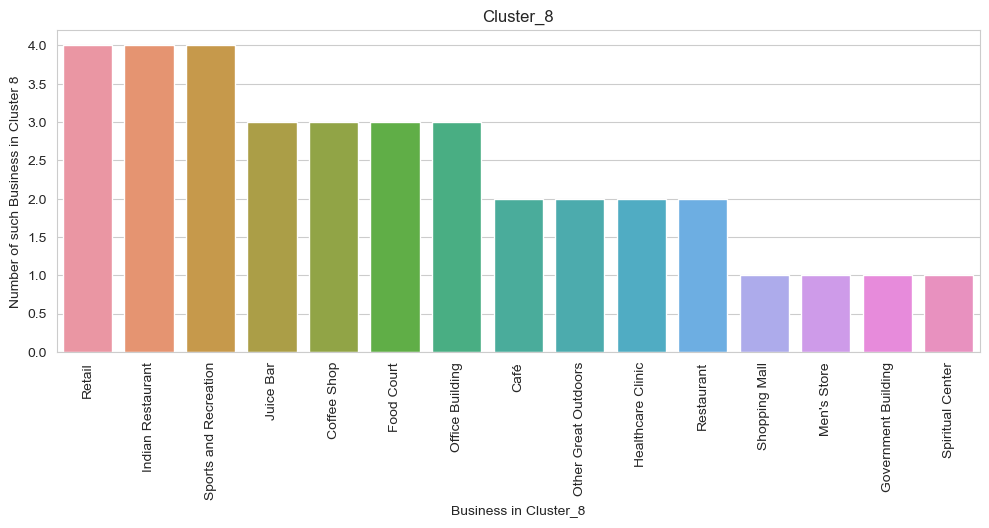

In [150]:
X=top_10_ven_in_cluster["Cluster_8_venues"].index
Y=top_10_ven_in_cluster["Cluster_8_venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_ven_in_cluster["Cluster_8_venues"].index,y=top_10_ven_in_cluster["Cluster_8_venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Business in Cluster_8")
plt.ylabel("Number of such Business in Cluster 8")
plt.title("Cluster_8")
plt.savefig("Cluster_8.png")

### we are looking to open a new buisness in alwal what would be the right choice

In [153]:
#First we will Find in which cluster is Alwal situated
hyderabad_mergerd_df[hyderabad_mergerd_df["Area"]=="Alwal"]["Cluster Labels"].values[0]

4

In [155]:
hyderabad_mergerd_df[hyderabad_mergerd_df["Area"]=="Alwal"]

Area   Latitude  Longitude  Cluster Labels 1st most common venue  \
125  Alwal  17.506064  78.491205               4            Restaurant   

    2nd most common venue 3rd most common venue 4th most common venue  \
125              Pizzeria          Burger Joint                Bakery   

    5th most common venue  6th most common venue 7th most common venue  \
125         Movie Theater  Sports and Recreation                  Café   

    8th most common venue 9th most common venue 10th most common venue  \
125             BBQ Joint                  Deli   Fast Food Restaurant   

    11th most common venue 12th most common venue 13th most common venue  \
125     Italian Restaurant                  Diner                   Park   

    14th most common venue    15th most common venue  
125          Bowling Alley  Furniture and Home Store

In [156]:
# cluster 4 -------> 4+1{since from 0 to 1 labels }--cluster 5

In [157]:
cluster["Cluster_5"]

Area 1st most common venue 2nd most common venue  \
18     Chintal Basti              Pizzeria            Restaurant   
26          Azamabad            Restaurant          Dessert Shop   
73      Trimulgherry              Pizzeria                  Café   
90   Serilingampally              Pizzeria                Bakery   
93         Hafeezpet              Pizzeria            Restaurant   
115   Old Bowenpally            Restaurant          Burger Joint   
117     Quthbullapur            Restaurant     Indian Restaurant   
118       Jeedimetla            Restaurant              Pizzeria   
120          Suraram            Restaurant              Pizzeria   
121  Pet Basheerabad            Restaurant              Pizzeria   
122         Kompally              Pizzeria            Restaurant   
123          Medchal            Restaurant              Pizzeria   
125            Alwal            Restaurant              Pizzeria   
126        Lothkunta            Restaurant                  Café   
127        Old Alwal            Restaurant              Pizzeria   
131       Malkajgiri            Restaurant                Bakery   
132        Anandbagh              Pizzeria     Indian Restaurant   
133         Ammuguda                  Café              Pizzeria   
134    Gautham Nagar            Restaurant          Burger Joint   
138         Neredmet            Restaurant          Burger Joint   
139     Old Neredmet                  Café     Indian Restaurant   
140        Safilguda          Burger Joint              Pizzeria   
141       Sainikpuri            Restaurant          Burger Joint   
172      L. B. Nagar              Pizzeria  Fast Food Restaurant   
198    Rajendranagar         Grocery Store            Restaurant   
202        Kismatpur              Pizzeria          Burger Joint   
207        Umdanagar            Restaurant          Burger Joint   

    3rd most common venue  4th most common venue 5th most common venue  \
18      Indian Restaurant                 Bakery                  Café   
26               Pizzeria   Fast Food Restaurant                Bakery   
73           Burger Joint      Indian Restaurant                Bakery   
90             Restaurant            Coffee Shop               Stadium   
93                 Bakery          Movie Theater     Indian Restaurant   
115              Pizzeria                   Deli                Bakery   
117              Pizzeria           Burger Joint                  Deli   
118          Burger Joint              BBQ Joint                  Café   
120   Housing Development                 Bakery  Fast Food Restaurant   
121      Asian Restaurant           Burger Joint             BBQ Joint   
122  Fast Food Restaurant          Movie Theater                Church   
123          Burger Joint              BBQ Joint  Fast Food Restaurant   
125          Burger Joint                 Bakery         Movie Theater   
126                Bakery           Burger Joint              Pizzeria   
127          Burger Joint                 Bakery         Movie Theater   
131              Pizzeria   Fast Food Restaurant                  Café   
132                  Café           Burger Joint            Restaurant   
133     Indian Restaurant           Burger Joint                Bakery   
134              Pizzeria                 Bakery  Fast Food Restaurant   
138              Pizzeria                 Bakery                  Café   
139              Pizzeria           Burger Joint  Fast Food Restaurant   
140                Bakery             Restaurant  Fast Food Restaurant   
141              Pizzeria                 Bakery                  Café   
172     Indian Restaurant            Coffee Shop            Restaurant   
198          Burger Joint          Shopping Mall      Department Store   
202                  Café  Sports and Recreation                  Deli   
207       Office Building      Indian Restaurant                  Café   

           6th most common venue      

In [158]:
top_10_ven_in_cluster["Cluster_5_venues"]

Pizzeria                       26
Restaurant                     26
Burger Joint                   23
Fast Food Restaurant           22
Café                           22
Bakery                         22
Indian Restaurant              19
Movie Theater                  14
BBQ Joint                      14
Deli                           12
Ice Cream Parlor                6
Sports and Recreation           6
Cafe, Coffee, and Tea House     6
Coffee Shop                     5
Chinese Restaurant              5
Name: cluster_venues, dtype: int64

## which Business we can bet our money upon and where

In [165]:
hyderabad_nearby_df["Venue Category"].value_counts().head(15)

Indian Restaurant       1081
Restaurant               825
Bakery                   657
Movie Theater            571
Pizzeria                 467
Café                     442
Retail                   299
Ice Cream Parlor         287
Deli                     243
Coffee Shop              233
Burger Joint             223
Bar                      220
Chinese Restaurant       219
Fast Food Restaurant     197
BBQ Joint                185
Name: Venue Category, dtype: int64

## Making a wordcloud

In [159]:
tostr =list(hyderabad_nearby_df["Venue Category"]) #list of all string

In [160]:
li=[]
for i in tostr:
    li.append(i.replace(" ","_")) #avoiding spacings

In [161]:
from wordcloud import WordCloud ,STOPWORDS,ImageColorGenerator# importing for wordcloud

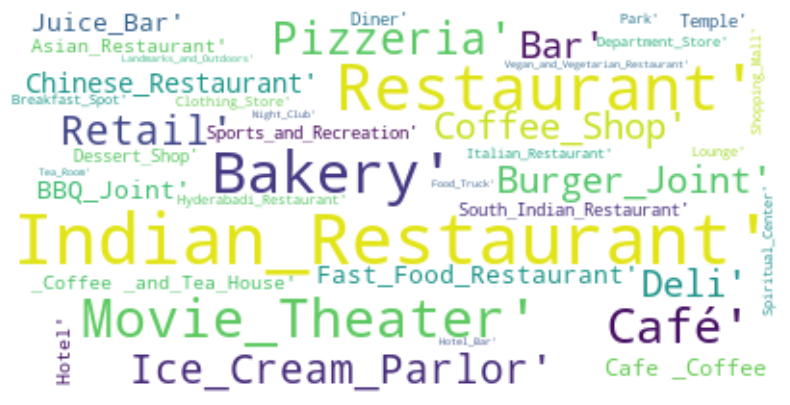

In [164]:
wordcloud = WordCloud(max_font_size=40,max_words=40
                      ,background_color="white").generate(str(li))
plt.figure(figsize=(12,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()